## The Thera Bank

### Objectives

- To predict which customers are most likely to renounce their credit cards and to help improve services so as to prevent the issue from prevailing in the future

**(Level of Significance to be Used for Statistical & Hypothesis Testing: 0.05)**

**Customer Details:**
- CLIENTNUM: Client number for the customer holding the account (Unique)
- Attrition_Flag: Indicates if the customer account is closed (Attrited Customer) or active (Existing Customer)
- Customer_Age: Age in Years
- Gender: Gender of the Account Holder
- Dependent_count: Number of Dependents
- Education_Level:  Education of Account holder (Ordinal): Graduate, High School, Unknown, Uneducated, College (Still a Student), Post-Graduate, Doctorate
- Marital_Status: Marital Status of the Account Holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card Utilized by Customer
- Months_on_book: Length of Relationship with the Bank
- Total_Relationship_Count: Total (Bank) Products Held by the Customer 
- Months_Inactive_12_mon: Count of Months Account Inactive in the last Year (12 Months)
- Contacts_Count_12_mon: Count of Customer Contacts in the last Year (12 Months)
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance Carrying Over Month-to-Month (Revolving)
- Avg_Open_To_Buy: Balance Left on Credit Card Still Available for Use (Average of Prior 12 Months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 Months)
- Total_Trans_Ct: Total Transaction Count (Last 12 Months)
- Total_Ct_Chng_Q4_Q1: Ratio of 4th Quarter Total Transactions to 1st Quarter Total Transactions
- Total_Amt_Chng_Q4_Q1: Ratio of 4th Quarter Total Amount to 1st Quarter Total Amount
- Avg_Utilization_Ratio: Represents Amount of Available Credit Used/Spent by Customer

### Importing Libraries & Loading Data

In [1]:
# Import the usual libraries for Math, Statistics, Dataframe, and Graphical functions, setting Warnings to Ignore

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import stats # Import for statistical/hypothesis testing

import statsmodels.api as sm # Import statistical summary for Regression analysis

# Import Some of the ML models to be used at a later stage

from sklearn.linear_model import LogisticRegression # library for creating logistic Regression Model and Summaries

from sklearn.tree import DecisionTreeClassifier # Library for building decision trees
from sklearn.model_selection import train_test_split # Library for training (x) and testing (y) the data

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # Library for Hyperparameter tuning Decision Tree model/s

from sklearn.model_selection import StratifiedKFold, cross_val_score # Also import K Fold and Cross Validation Functions

from sklearn.metrics import confusion_matrix, classification_report # Library to be used for Confusion Matrix (TP, FP, TN, FN)

# Library to test Logistic Regression scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, roc_curve, precision_recall_curve  

from sklearn import metrics # Library for CM Model Testing, etc.
from sklearn import tree # Library to be used for creating and pruning Decision Trees

# Libraries for Ensemble Techniques - Bagging, Random Forest, & Boosting - Classification
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier

# Library for Data Scaling & One Hot Encoding (similar to Pd.Get_Dummies)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# Library to Impute Missing Values using K-Nearest Neighbors
from sklearn.impute import KNNImputer

# Libraries to Oversample & Undersample Data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Library for Missing Value Imputation
from sklearn.impute import SimpleImputer

# Libraries for Building Production Model Pipeline & Transforming Numeric/Categorical Columns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [2]:
# Import all data from Excel CSV

data = pd.read_csv('BankChurners.csv')
ccdata = data.copy() # Create a new copy for editing, keeping data as backup

### Data Overview

In [3]:
ccdata.head() # View the top 5 rows of data

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [4]:
ccdata.tail() # View the bottom 5 rows of data

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124                 0.819            10291              60   
10125                 0.535             8395              62   
10126                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189  

[5 rows x 21 columns]

In [5]:
ccdata.shape # Inspect the shape (rows/columns) of the dataset

(10127, 21)

There are **10,127 rows and 21 columns** of data in the initial dataset.

In [6]:
ccdata.info() # Inspect the datatypes and missing values, if any, in the sample dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- CLIENTNUM appears to be adding 0 value to the analysis and appears to have 100% unique Index values
    - It should be examined and likely dropped

## Data Pre-Processing

### Dropping Unneccessary Variables

In [7]:
# Examine the total count of uniques for column CLIENTNUM

ccdata['CLIENTNUM'].nunique()

10127

As expected, **every value is unique** within the variable column and it can therefore be **dropped from the dataset**.

In [8]:
ccdata.drop('CLIENTNUM', axis=1, inplace=True)

- There are also **missing values in a couple columns** - a summary examination should be performed
- These missing values will only be addressed upon splitting the dataset into Train/Validation/Test, so are to **prevent Data Leakage**

### Creating New Variable: Avg. Amount per Transaction

It would be helpful to be able to determine the importance of a customer's Total Spending Amount and Count of Transactions.  The easiest way to quickly rank these attributes is to **create a new variable that divides Total Amount by Total Transactions**.

In [9]:
# # Create new variable 'Avg Amount per Trans', dividing Total Trans Amt by Total Trans Ct

# Avg_Amount_per_Trans = ccdata['Total_Trans_Amt']/ccdata['Total_Trans_Ct']

# ccdata['Avg_Amount_per_Trans'] = pd.DataFrame(Avg_Amount_per_Trans)

In [10]:
# Examine Statistical Summary, including newly created variable in DataFrame

ccdata.describe().T

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

### Checking for Nulls/Missing Values & Updating Data Types

In [11]:
# Sum up all missing values, by column, in descending order

ccdata.isnull().sum().sort_values(ascending=False)

Education_Level             1519
Marital_Status               749
Avg_Utilization_Ratio          0
Total_Ct_Chng_Q4_Q1            0
Customer_Age                   0
Gender                         0
Dependent_count                0
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Attrition_Flag                 0
dtype: int64

#### Observations

- The following variables are of the Object datatype and will be converted to Categorical:
    - Education_Level
    - Marital_Status
    - Income_Category
    - Card_Category
    - Gender
- All other variables are numerica (Integer/Float)
- There are **missing values (to be imputed after Train/Test Split)** in columns:
    - Education_Level
    - Marital_Status    

### Adjusting Data Types

In [12]:
# Create list of all columns containing 'object' data types

cols = ccdata.select_dtypes(['object'])
cols.columns

# Use for loop to cycle through each of the above columns within the actual travelset, changing each to 'category'

for i in cols.columns:
    ccdata[i] = ccdata[i].astype('category')

In [13]:
# ReExamine the datatypes to make sure all objects are now categorical

ccdata.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

As expected, all column datatypes are now either Numeric (Float/Integer) or Categorical.

In [14]:
# Check for any duplicate values

ccdata.duplicated().sum()

0

There are **no duplicate values** within the dataset.

In [15]:
ccdata.describe().T # Examine the statistical summary (Transposed) of all numeric variables in the dataset

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

#### Observations

The following variables have very similar Mean/Medians and are indicative of **Normal Distribution**:
- Customer Age
- Dependent Count
- Months on Book
- Total Relationship Count
- Months Inactive (12 Months)
- Contacts Colunts (12 Months)
- Total Amount Change: Q4 vs. Q1
- Total_Trans_Ct
- Total Count Change: Q4 vs. Q1

The following variables have Means substantially higher than their Medians, indicating **Right Skewed Distribution**:
- Credit Limit
- Average Open to Buy
- Total Transaction Amount
- Average Utilization Ratio

**Total Revolving Balance** actually has a higher Median than Mean, indicating **Left Skewed Distribution**

There appear to be potential outliers in some of the financial columns that should be futher examined, namely:
- Max Credit Limit - **\\$34.5k**
- Average Open to Buy - **\\$34.5k**
    - An identical Credit Limit/Open Credit to Buy **indicates that the customers aren't carrying any balances each month**
- Total Transaction Amount - **\\$18.5k**

In [16]:
# Examine the full dataset for customers with a max Credit limit and Avg. Open Credit to Buy of $34.5k

ccdata[ccdata['Credit_Limit']==34516.000]

Attrition_Flag  Customer_Age Gender  Dependent_count  \
6      Existing Customer            51      M                4   
45     Existing Customer            49      M                4   
61     Attrited Customer            48      M                2   
65     Existing Customer            51      M                4   
70     Existing Customer            51      M                4   
...                  ...           ...    ...              ...   
10088  Existing Customer            45      M                2   
10095  Existing Customer            46      M                3   
10098  Attrited Customer            55      M                3   
10110  Existing Customer            56      M                1   
10112  Attrited Customer            33      M                2   

      Education_Level Marital_Status Income_Category Card_Category  \
6                 NaN        Married         $120K +          Gold   
45         Uneducated         Single    $80K - $120K          Blue   
61           Graduate        Married     $60K - $80K        Silver   
65         Uneducated         Single    $80K - $120K        Silver   
70           Graduate         Single         $120K +          Blue   
...               ...            ...             ...           ...   
10088        Graduate         Single     $60K - $80K        Silver   
10095             NaN        Married    $80K - $120K          Blue   
10098        Graduate         Single         $120K +        Silver   
10110        Graduate         Single    $80K - $120K        Silver   
10112         College        Married         $120K +          Gold   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
6                  46                         6                       1   
45                 30                         3                       2   
61                 35                         2                       4   
65                 38                         4                       1   
70                 42                         3                       2   
...               ...                       ...                     ...   
10088              33                         4                       2   
10095              33                         4                       1   
10098              36                         4                       3   
10110              49                         5                       2   
10112              20                         2                       1   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
6                          3       34516.0                 2264   
45                         3       34516.0                    0   
61                         4       34516.0                    0   
65                         4       34516.0                 1515   
70                         3       34516.0                 1763   
...                      ...           ...                  ...   
10088                      2       34516.0                 1529   
10095                      3       34516.0                 1099   
10098                      4       34516.0                    0   
10110                      2       34516.0                 1091   
10112                      4       34516.0                    0   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6              32252.0                 1.975             1330              31   
45             34516.0                 1.621             1444              28   
61             34516.0                 0.763              691              15   
65             33001.0                 0.592             1293              32   
70             32753.0                 1.266             1550              41   
...                ...                   ...              ...             ...   
10088          32987.0                 0.609            13940             105   
10095          33417.0

In [17]:
# Examine the full dataset for customers with a max Total Transaction Amount of $18.5k

ccdata[ccdata['Total_Trans_Amt']==18484.000]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
9964  Existing Customer            47      M                4             NaN   

     Marital_Status Income_Category Card_Category  Months_on_book  \
9964        Married     $60K - $80K          Blue              36   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
9964                         4                       5                      2   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
9964       10585.0                 1749           8836.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
9964                 0.655            18484             108   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
9964                0.588                  0.165

- The customers with the highest Credit Limits appear to be valid and accurate, with strong incomes, relationship and spending history, and very **responsible spending habits (low Utilization ratios**), which may not always be beneficial to the company
- The customer showing the highest Transaction Amount also appears to be valid and perhaps only indicative of some heavier spending in Q4 (holiday season), yet still with a Total Revolving Balance each month far smaller than the alloted Credit Limit (healthy Utlization Ratio)
    - This customer may **spend more on their card/s throughout the year** but consistently attempts to **pay as much back and maintain low revolving balances and credit utilization**

In [18]:
ccdata.nunique().sort_values(ascending=True) # Examine all unique counts for each column of data, sorted in ascending order

Attrition_Flag                 2
Gender                         2
Marital_Status                 3
Card_Category                  4
Income_Category                6
Total_Relationship_Count       6
Dependent_count                6
Education_Level                6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Months_on_book                44
Customer_Age                  45
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
Total_Amt_Chng_Q4_Q1        1158
Total_Revolving_Bal         1974
Total_Trans_Amt             5033
Credit_Limit                6205
Avg_Open_To_Buy             6813
dtype: int64

There are numerous columns with 7 or fewer unique values, namely:
- Attrition_Flag - 2
- Gender - 2
- Marital_Status - 3
- Card Category - 4
- Income Category - 6
- Total Relationships - 6
- Months Inactive (1yr) - 7
- Contacts Count (1yr) - 7

In [19]:
# Create two for loops to 1.) identify all columns with small unique counts of <=10 and 2.) print a summary of each unique count

UniqueCols = []
for Cols in ccdata:
    if ccdata[Cols].nunique() < 10:
        UniqueCols.append(Cols)

for Cols in UniqueCols:
    print(Cols)
    print(ccdata[Cols].value_counts())
    print('.'*50)

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
..................................................
Gender
F    5358
M    4769
Name: Gender, dtype: int64
..................................................
Dependent_count
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
..................................................
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
..................................................
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
..................................................
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
..

- Excluding variable **abc** in the Income Category, which will need to be futher examined, all other columsn appear to be error free.

In [20]:
ccdata[ccdata['Income_Category']=='abc'].head(20) # Examine the top 20 rows of data where Income Category = 'abc'

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
19   Existing Customer            45      F                2        Graduate   
28   Existing Customer            44      F                3      Uneducated   
39   Attrited Customer            66      F                0       Doctorate   
44   Existing Customer            38      F                4        Graduate   
58   Existing Customer            44      F                5        Graduate   
83   Existing Customer            59      F                1        Graduate   
94   Existing Customer            45      F                3             NaN   
100  Existing Customer            49      F                3         College   
101  Existing Customer            41      F                3             NaN   
138  Existing Customer            63      F                1         College   
148  Existing Customer            47      F                4        Graduate   
151  Existing Customer            68      M                1        Graduate   
158  Existing Customer            44      F                2      Uneducated   
161  Existing Customer            59      F                1         College   
170  Existing Customer            45      F                4      Uneducated   
185  Existing Customer            49      F                3      Uneducated   
189  Existing Customer            41      F                2   Post-Graduate   
246  Existing Customer            46      F                3       Doctorate   
267  Existing Customer            43      F                4        Graduate   
283  Attrited Customer            54      F                2     High School   

    Marital_Status Income_Category Card_Category  Months_on_book  \
19         Married             abc          Blue              37   
28          Single             abc          Blue              34   
39         Married             abc          Blue              56   
44          Single             abc          Blue              28   
58         Married             abc          Blue              35   
83         Married             abc          Blue              52   
94         Married             abc          Blue              28   
100         Single             abc          Blue              43   
101        Married             abc        Silver              34   
138        Married             abc          Blue              36   
148        Married             abc          Blue              36   
151        Married             abc          Blue              56   
158        Married             abc        Silver              35   
161         Single             abc          Blue              36   
170       Divorced             abc          Blue              36   
185         Single             abc          Blue              38   
189        Married             abc          Blue              31   
246         Single             abc          Blue              36   
267       Divorced             abc          Blue              23   
283        Married             abc          Blue              44   

     Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
19                          6                       1                      2   
28                          5                       2                      2   
39                          5                       4                      3   
44                          2                       3                      3   
58                          4                       1                      2   
83                          2                       3                      3   
94                          5                       1                      2   
100                         4                       4                      0   
101                         5                       3                      3   
138                         6                       2                      3   
148               

There are numerous, possibly accurate, rows of data where the Income_Category has been input with a **random placeholder 'abc'**.  Regardless of the decision to remove or replace these values with the Median/Mode, etc. **they should first be converted to Null/NaN values**.

### Replacing Categorical Value

In [21]:
# Replace all income values with 'abc' placeholder with Unknown

ccdata['Income_Category'].replace('abc', 'Unknown', inplace=True)

In [22]:
# Reexamine the Dataset - View Statistical Summary (transposed), focusing on Categorical data

ccdata.describe(include="all").T

count unique                top  freq      mean  \
Attrition_Flag            10127      2  Existing Customer  8500       NaN   
Customer_Age              10127    NaN                NaN   NaN    46.326   
Gender                    10127      2                  F  5358       NaN   
Dependent_count           10127    NaN                NaN   NaN    2.3462   
Education_Level            8608      6           Graduate  3128       NaN   
Marital_Status             9378      3            Married  4687       NaN   
Income_Category           10127      6     Less than $40K  3561       NaN   
Card_Category             10127      4               Blue  9436       NaN   
Months_on_book            10127    NaN                NaN   NaN   35.9284   
Total_Relationship_Count  10127    NaN                NaN   NaN   3.81258   
Months_Inactive_12_mon    10127    NaN                NaN   NaN   2.34117   
Contacts_Count_12_mon     10127    NaN                NaN   NaN   2.45532   
Credit_Limit              10127    NaN                NaN   NaN   8631.95   
Total_Revolving_Bal       10127    NaN                NaN   NaN   1162.81   
Avg_Open_To_Buy           10127    NaN                NaN   NaN   7469.14   
Total_Amt_Chng_Q4_Q1      10127    NaN                NaN   NaN  0.759941   
Total_Trans_Amt           10127    NaN                NaN   NaN   4404.09   
Total_Trans_Ct            10127    NaN                NaN   NaN   64.8587   
Total_Ct_Chng_Q4_Q1       10127    NaN                NaN   NaN  0.712222   
Avg_Utilization_Ratio     10127    NaN                NaN   NaN  0.274894   

                               std     min     25%    50%      75%    max  
Attrition_Flag                 NaN     NaN     NaN    NaN      NaN    NaN  
Customer_Age               8.01681      26      41     46       52     73  
Gender                         NaN     NaN     NaN    NaN      NaN    NaN  
Dependent_count            1.29891       0       1      2        3      5  
Education_Level                NaN     NaN     NaN    NaN      NaN    NaN  
Marital_Status                 NaN     NaN     NaN    NaN      NaN    NaN  
Income_Category                NaN     NaN     NaN    NaN      NaN    NaN  
Card_Category                  NaN     NaN     NaN    NaN      NaN    NaN  
Months_on_book             7.98642      13      31     36       40     56  
Total_Relationship_Count   1.55441       1       3      4        5      6  
Months_Inactive_12_mon     1.01062       0       2      2        3      6  
Contacts_Count_12_mon      1.10623       0       2      2        3      6  
Credit_Limit               9088.78  1438.3    2555   4549  11067.5  34516  
Total_Revolving_Bal        814.987       0     359   1276     1784   2517  
Avg_Open_To_Buy            9090.69       3  1324.5   3474     9859  34516  
Total_Amt_Chng_Q4_Q1      0.219207       0   0.631  0.736    0.859  3.397  
Total_Trans_Amt            3397.13     510  2155.5   3899     4741  18484  
Total_Trans_Ct             23.4726      10      45     67       81    139  
Total_Ct_Chng_Q4_Q1       0.238086       0   0.582  0.702    0.818  3.714  
Avg_Utilization_Ratio     0.275691       0   0.023  0.176    0.503  0.999

#### Observations

- The majority of customers are Existing, with **around 16% of remaining customers currently Attrited**
- The dataset is roughly split 50/50 across the Genders, with slightly more Females sampled
- The most common values showing for **Customer Age and Dependent Count** are **NaN values**
    - These need to be addressed later on when splitting the data (imputing values as replacement)
- There is missing data for columns:
    - Education Level: **36%** of customers have received a Graduate degree (out of 6 possible options)
    - Marital Status: **50%** of customers are married (out of 3 possible)
    - Income Category: **40%** of customers earn less than \\$40k (out of 5 possible options)
        - This column now reflects null values due to the **replacement of 'abc' values with NaNs**
- The most common Credit Card Category is Blue, comprising of **93%** of the sample dataset

## Exploratory Data Analysis

### Univariate Analysis - Categorical

In [23]:
# Create a simple plot to show the unique values within a given variable and the respective % split

def PlotPercentage (Plot, Feature):
    Total=len(Feature) # Total of the variable/column, for calculating % split against
    
    
    for p in ax.patches:
        Percentage = '{:.1f}%'.format(100 * p.get_height()/Total) # Divide the height of each unique value against Feature Total
        x = p.get_x() + p.get_width() / 2 - .05 # Get x location on column/plot for placing % details
        y = p.get_y() + p.get_height() + 12.5 # Get y location on column/plot for placing % details
        ax.annotate(Percentage, (x,y), size=15)

#### Attrition Flag

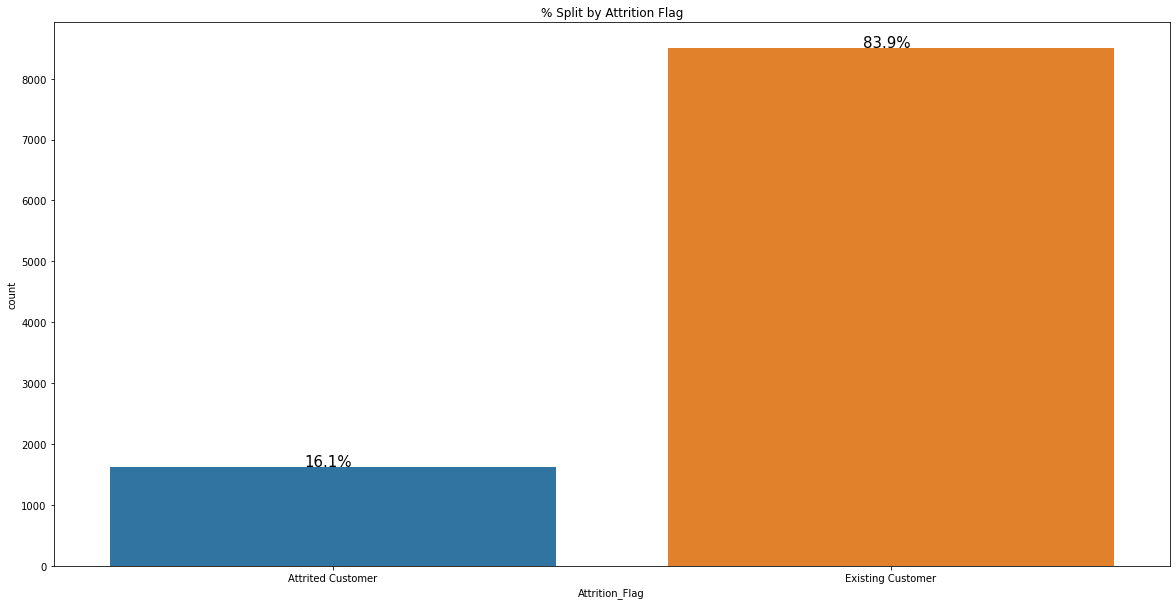

In [24]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated


ax = sns.countplot(ccdata['Attrition_Flag']); # Name Charts ax so that the percentages are shown for each bar vs. Feature Total

PlotPercentage(ax,ccdata['Attrition_Flag']) # Call above function using countplot named above and Dataset column/feature
plt.title('% Split by Attrition Flag');

- The dataset is **Unevenly Balanced** for the target variable - **Attrition Flag - 84% Existing to 16% Attrited**
    - The weighting should be considered when developing Decision Trees, etc.

#### Gender

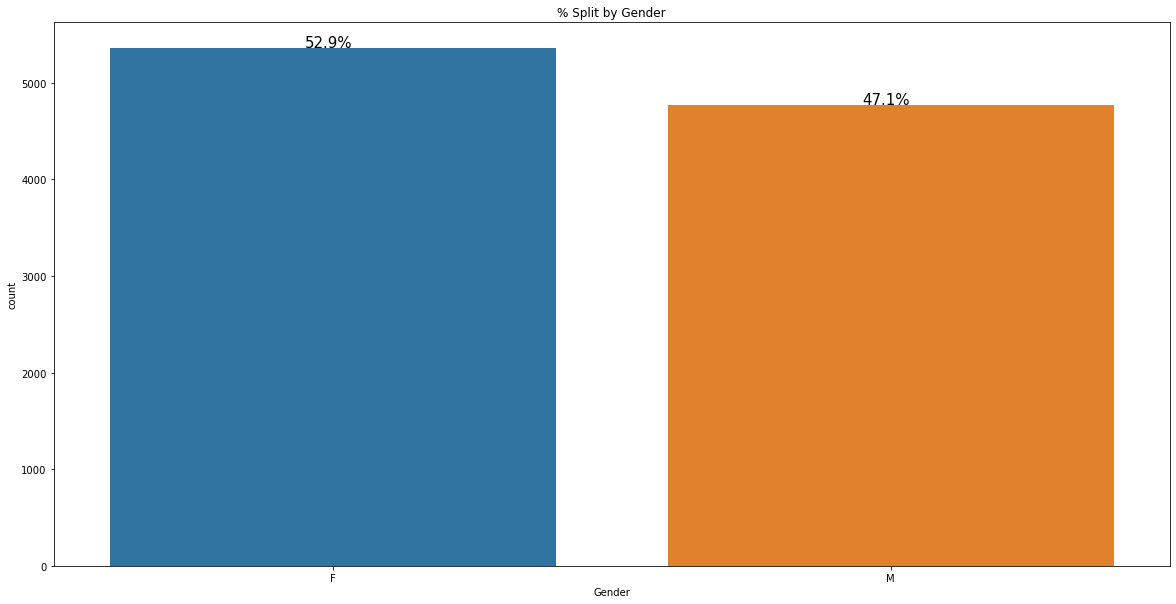

In [25]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated


ax = sns.countplot(ccdata['Gender']); # Name Charts ax so that the percentages are shown for each bar vs. Feature Total

PlotPercentage(ax,ccdata['Gender']) # Call above function using countplot named above and Dataset column/feature
plt.title('% Split by Gender');

- There is a **slightly higher split of Females** to Males (53%/47%)

#### Education Level

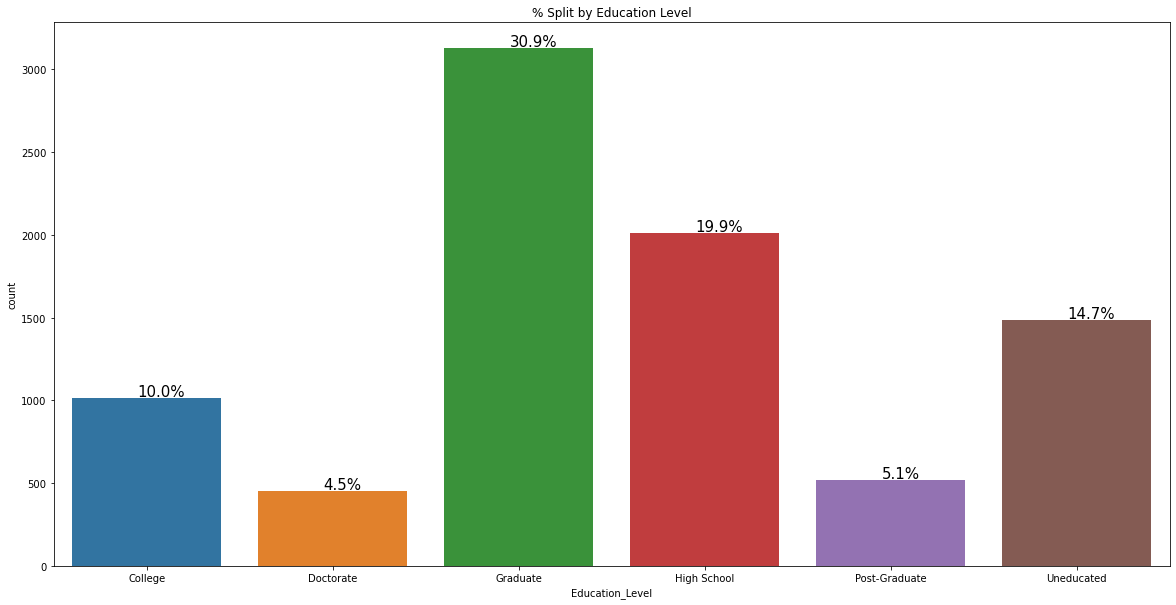

In [26]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated


ax = sns.countplot(ccdata['Education_Level']); # Name Charts ax so that the percentages are shown for each bar vs. Feature Total

PlotPercentage(ax,ccdata['Education_Level']) # Call above function using countplot named above and Dataset column/feature
plt.title('% Split by Education Level');

- Over **50% of the dataset** consists of: Customers with a **Graduate** level education (31%),and **High School** diplomas (20%)
    - There are almost **15% of Customers with No Education level shown** - or perhaps technically no Education Listed/Unknown
    - These should be further examined and most likely **moved to the High School column** as the likelihood of no Education at all is very lower

In [27]:
# Examine Customers with Education Levels shown as Uneducated 

ccdata[ccdata['Education_Level']=='Uneducated']

Attrition_Flag  Customer_Age Gender  Dependent_count  \
4      Existing Customer            40      M                3   
8      Existing Customer            37      M                3   
10     Existing Customer            42      M                5   
28     Existing Customer            44      F                3   
31     Existing Customer            53      M                2   
...                  ...           ...    ...              ...   
10083  Existing Customer            42      F                4   
10085  Existing Customer            49      M                3   
10102  Existing Customer            33      F                1   
10115  Existing Customer            38      M                1   
10119  Attrited Customer            55      F                3   

      Education_Level Marital_Status Income_Category Card_Category  \
4          Uneducated        Married     $60K - $80K          Blue   
8          Uneducated         Single     $60K - $80K          Blue   
10         Uneducated            NaN         $120K +          Blue   
28         Uneducated         Single         Unknown          Blue   
31         Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10083      Uneducated        Married         Unknown          Blue   
10085      Uneducated        Married         $120K +          Gold   
10102      Uneducated         Single  Less than $40K          Blue   
10115      Uneducated         Single     $40K - $60K          Blue   
10119      Uneducated         Single         Unknown          Blue   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
4                  21                         5                       1   
8                  36                         5                       2   
10                 31                         5                       3   
28                 34                         5                       2   
31                 48                         2                       5   
...               ...                       ...                     ...   
10083              23                         4                       1   
10085              38                         4                       3   
10102              36                         5                       3   
10115              36                         2                       3   
10119              47                         4                       3   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
4                          0        4716.0                    0   
8                          0       22352.0                 2517   
10                         2        6748.0                 1467   
28                         2       10100.0                    0   
31                         1        2451.0                 1690   
...                      ...           ...                  ...   
10083                      2        8348.0                    0   
10085                      4       14938.0                    0   
10102                      3        8398.0                 1875   
10115                      2        5639.0                 1558   
10119                      3       14657.0                 2517   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
4               4716.0                 2.175              816              28   
8              19835.0                 3.355             1350              24   
10              5281.0                 0.831             1201              42   
28             10100.0                 0.525             1052              18   
31               761.0                 1.323             1596              26   
...                ...                   ...              ...             ...   
10083           8348.0                 0.695            15905             111   
10085          14938.0

It appears that these customers are valid and that the **Education Level was likely omitted - it can be changed to reflect 'High School'**

In [28]:
# Rename all values showing Education as 'Uneducated' to 'High School'

ccdata['Education_Level'].replace(to_replace='Uneducated', value='High School', inplace=True)

In [29]:
# Examine the unique values for Educattion Level field after replacement made

ccdata['Education_Level'].value_counts()

High School      3500
Graduate         3128
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

#### Marital Status

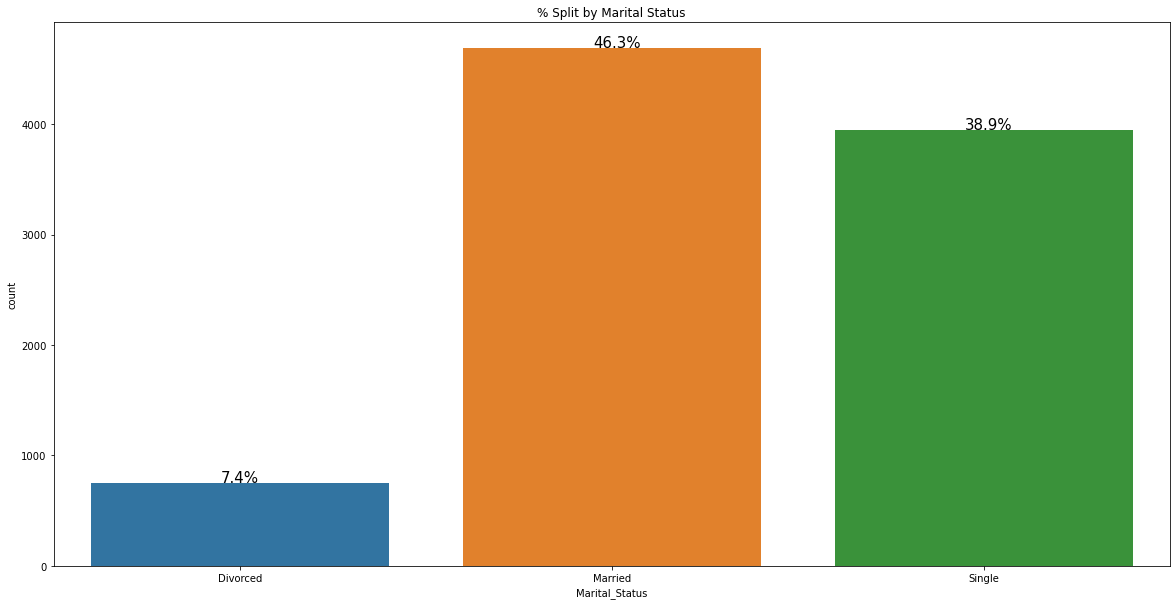

In [30]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated


ax = sns.countplot(ccdata['Marital_Status']); # Name Charts ax so that the percentages are shown for each bar vs. Feature Total

PlotPercentage(ax,ccdata['Marital_Status']) # Call above function using countplot named above and Dataset column/feature
plt.title('% Split by Marital Status');

- Slightly more customers are **Married than Single (46% vs. 39%)** with a small handful (7%) that are divorced

#### Income Category

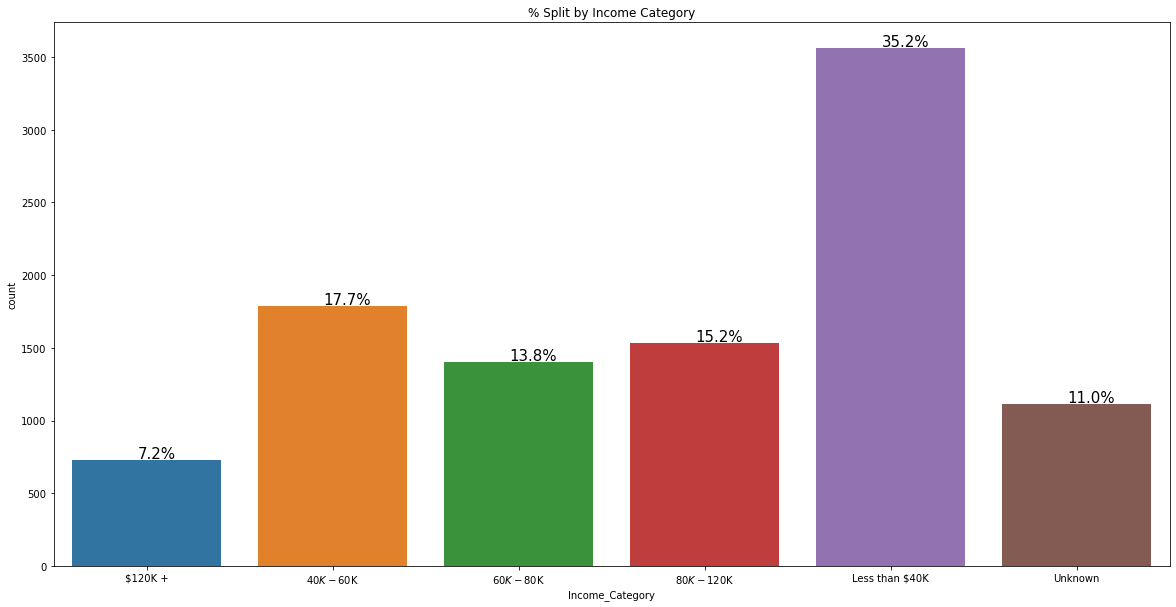

In [31]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated


ax = sns.countplot(ccdata['Income_Category']); # Name Charts ax so that the percentages are shown for each bar vs. Feature Total

PlotPercentage(ax,ccdata['Income_Category']) # Call above function using countplot named above and Dataset column/feature
plt.title('% Split by Income Category');

- The majority, over 35%, of customers earn **Incomes less than \\$40k**
    - There is a relatively even split of customers earning between \\$40k and \\$120k, in groups incrementing by \\$20k
    - The 11% of **Unknown** Income Levels is the **renamed variable 'abc'** that was changed above

#### Card Category

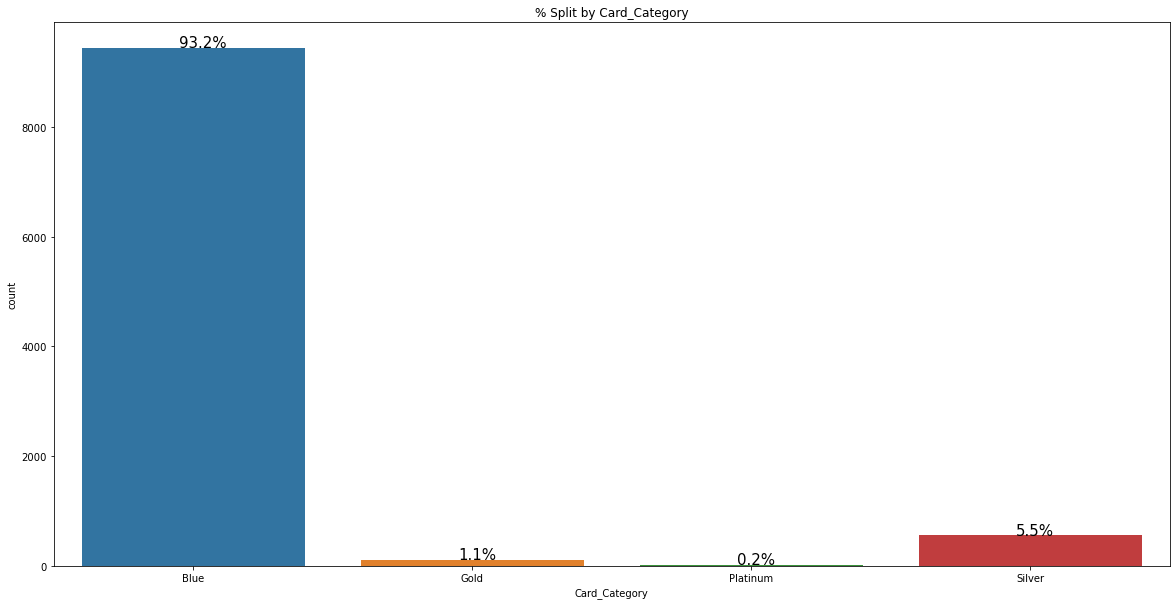

In [32]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated


ax = sns.countplot(ccdata['Card_Category']); # Name Charts ax so that the percentages are shown for each bar vs. Feature Total

PlotPercentage(ax,ccdata['Card_Category']) # Call above function using countplot named above and Dataset column/feature
plt.title('% Split by Card_Category');

- Over **93% of Customers own the Blue Card**, followed by just under 6% using the Silver Card
    - The Gold have very little ownership at 1%, with the Platinum have near non-exitent owernship

### Univariate Analysis - Numerical

In [2]:
# Create one function to create a combination Histogram and Boxplot based on column names provided

def Histogram_Boxplot(Data, Feature, Figsize=(15, 10), Kde=False, Bins=None): 
    # Hide Kernal Density Line and don't group Data into set amount of Bins for Histogram
    """
    Boxplot and Histogram Combined into 1 View

    Data: DataFrame
    Feature: Specific Column in DataFrame
    Figsize: Plot Size - Set to (15,10)
    Kde: Show/Don't Show Density Curve (Default = False)
    Bins: Number of Bins for Histogram (Default = None)
    """

# Create subplot function to show Histogram & Boxplot, on 2 rows and with a shared x axis, for numerical variables selected
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
    nrows=2, # 2 rows on the Subplot Grid - 1 Graph on each 
    sharex=True, # Share the x axis for both graphs
    gridspec_kw={"height_ratios": (0.20, 0.75)}, # Height split between both, stacked, graphs
    figsize=Figsize,

# creating the 2 subplots        
        
    )  
    sns.boxplot(
        data=ccdata, x=Feature, ax=ax_box2, showmeans=True, color="purple"
    )  # Boxplot will have a blue star indicating the Mean column value
    sns.histplot(
        data=ccdata, x=Feature, kde=Kde, ax=ax_hist2, bins=Bins, palette="seismic"
    ) if Bins else sns.histplot( # No Bins so create Histogram
        data=ccdata, x=Feature, kde=Kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        Data[Feature].mean(), color="green", linestyle="--" # Add red line to Histogram to indicate Mean column value
    )  
    ax_hist2.axvline(
        Data[Feature].median(), color="red", linestyle="-" # Add red line to Histogram to indicate Median column value
    )

#### Customer Age

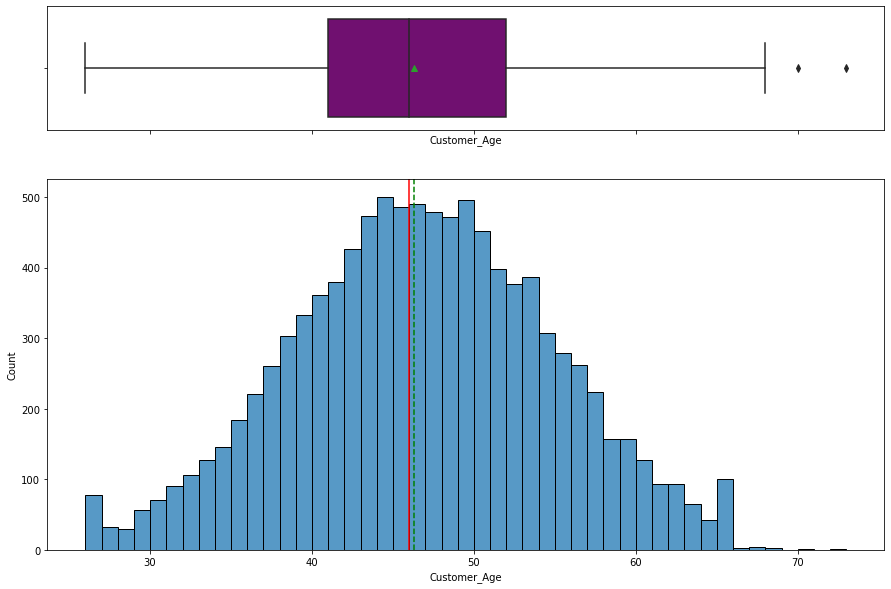

In [34]:
Histogram_Boxplot(ccdata, 'Customer_Age')

- Customer Age is **Normally Distributed (Mean equal to Median)**, with a few outliers to the far right
    - The majority of customers range between **Ages of 41 and 52**
    - There are a couple outliers past the age of 70
        - These can be further review and **likely kept and capped to the max** - unless indicative of false data

In [35]:
# Examine the 10 largest values in the Customer Age column

ccdata.Customer_Age.nlargest(10)

251    73
254    70
151    68
198    68
177    67
320    67
410    67
432    67
39     66
52     66
Name: Customer_Age, dtype: int64

In [36]:
# Examine the full dataset behind the few outliers identified

ccdata[ccdata['Customer_Age']>=70]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
251  Existing Customer            73      M                0     High School   
254  Existing Customer            70      M                0     High School   

    Marital_Status Income_Category Card_Category  Months_on_book  \
251        Married     $40K - $60K          Blue              36   
254        Married  Less than $40K          Blue              56   

     Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
251                         5                       3                      2   
254                         3                       2                      3   

     Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
251        4469.0                 1125           3344.0                 1.363   
254        3252.0                 1495           1757.0                 0.581   

     Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
251             1765              34                1.615   
254             1227              15                0.875   

     Avg_Utilization_Ratio  
251                  0.252  
254                  0.460

These 2 customers appear to be correctly represented and are anomalies due to **still working at their age**, however appear accurate from a data standpoint.  They can be **capped to the next highest values** so as to remove their outlier status.

In [37]:
# Cap/Clip the Customer Age variable to the next highest value of 68

ccdata['Customer_Age'].clip(upper=68, inplace=True)

#### Dependent Count

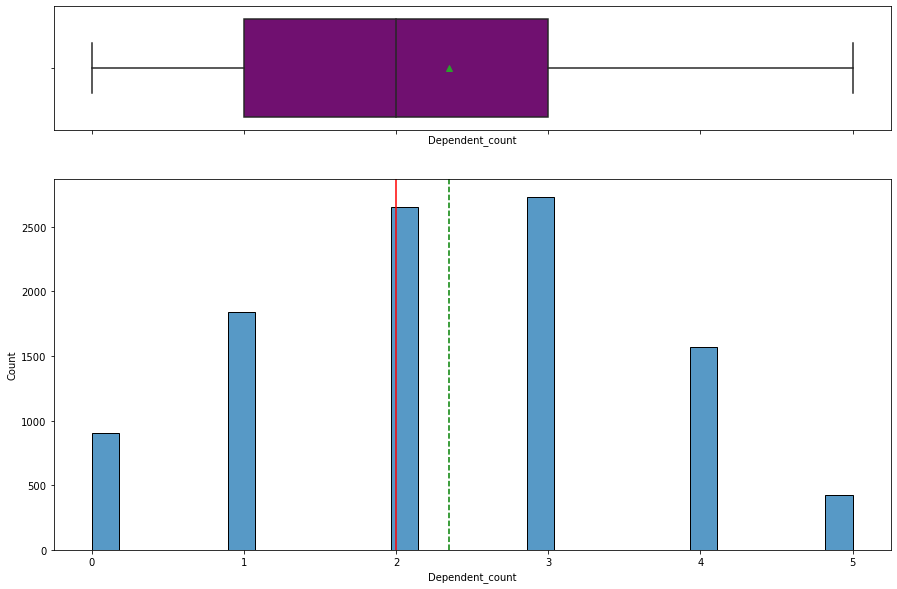

In [38]:
Histogram_Boxplot(ccdata, 'Dependent_count')

- Dependent Count is **Right Skewed (Mean greater than Median)**
    - The majority of customers have either **2 or 3 Dependents**

#### Months on Book

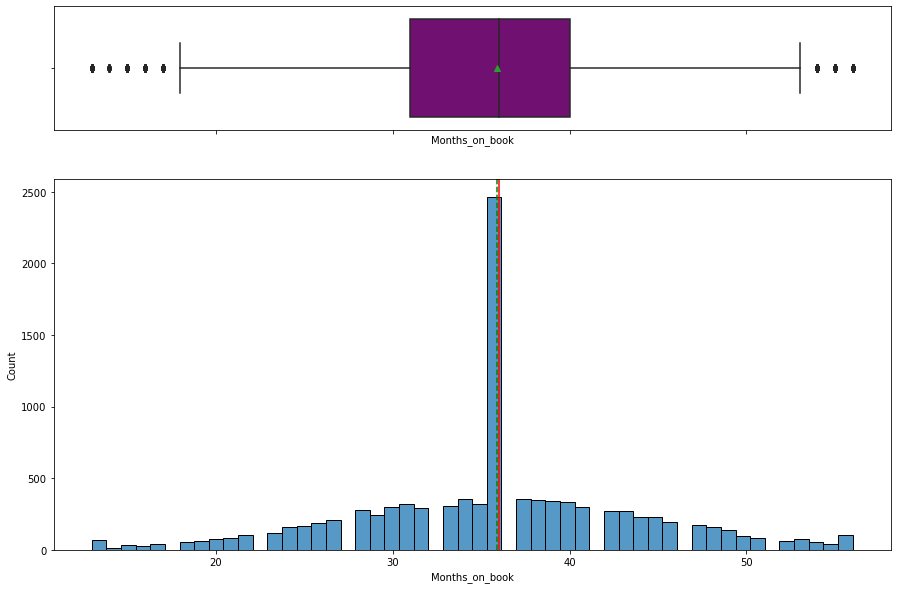

In [39]:
Histogram_Boxplot(ccdata, 'Months_on_book')            

- Months on Book is **Normally Distributed (Mean equal to Median)**, with a few outliers on both sides of the data
    - The majority of customers show **exactly 36 Months on Book**
        - This should be explored further and **possibly converted to smaller, Categorical, groupings**
- Since this variable will likely be grouped and converted to Categorical, the outliers on both tails can be left alone    

In [40]:
# Examine Unique Count all Months of Book to confirm/explain anomaly at 36 Months

ccdata['Months_on_book'].value_counts()

36    2463
37     358
34     353
38     347
39     341
40     333
31     318
35     317
33     305
30     300
41     297
32     289
28     275
43     273
42     271
29     241
44     230
45     227
27     206
46     197
26     186
47     171
25     165
48     162
24     160
49     141
23     116
22     105
56     103
50      96
21      83
51      80
53      78
20      74
13      70
19      63
52      62
18      58
54      53
55      42
17      39
15      34
16      29
14      16
Name: Months_on_book, dtype: int64

In [41]:
# Examine the dataset for Customers with exactly 36 Months on Book

ccdata[ccdata['Months_on_book']==36]

Attrition_Flag  Customer_Age Gender  Dependent_count  \
2      Existing Customer            51      M                3   
5      Existing Customer            44      M                2   
8      Existing Customer            37      M                3   
9      Existing Customer            48      M                2   
12     Existing Customer            56      M                1   
...                  ...           ...    ...              ...   
10115  Existing Customer            38      M                1   
10116  Existing Customer            46      M                5   
10118  Attrited Customer            50      M                1   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   

      Education_Level Marital_Status Income_Category Card_Category  \
2            Graduate        Married    $80K - $120K          Blue   
5            Graduate        Married     $40K - $60K          Blue   
8         High School         Single     $60K - $80K          Blue   
9            Graduate         Single    $80K - $120K          Blue   
12            College         Single    $80K - $120K          Blue   
...               ...            ...             ...           ...   
10115     High School         Single     $40K - $60K          Blue   
10116         College         Single    $80K - $120K          Blue   
10118             NaN            NaN    $80K - $120K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
2                  36                         4                       1   
5                  36                         3                       1   
8                  36                         5                       2   
9                  36                         6                       3   
12                 36                         3                       6   
...               ...                       ...                     ...   
10115              36                         2                       3   
10116              36                         1                       2   
10118              36                         6                       3   
10124              36                         5                       3   
10125              36                         4                       3   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
2                          0        3418.0                    0   
5                          2        4010.0                 1247   
8                          0       22352.0                 2517   
9                          3       11656.0                 1677   
12                         0       11751.0                    0   
...                      ...           ...                  ...   
10115                      2        5639.0                 1558   
10116                      3       13187.0                 2241   
10118                      4        9959.0                  952   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
2               3418.0                 2.594             1887              20   
5               2763.0                 1.376             1088              24   
8              19835.0                 3.355             1350              24   
9               9979.0                 1.524             1441              32   
12             11751.0                 3.397             1539              17   
...                ...                   ...              ...             ...   
10115           4081.0                 0.614            16628             109   
10116          10946.0

- It is very apparent that the **majority of customers, across various Age groups, have 36 Months on Book or 3 Years relationship with the bank**
    - Of those customers with 3 Years average relationship with the bank, the **majority have Existing Credit Card accounts**
    - All customers examined appear to be legitimate data entries and likely indicates a large Promotional offer or intake of customers joing the bank's Credit Card program
        - It is worth examining the Card Category percentage split to see if a particular card was promoted

In [42]:
# Examine the % splits by Card Category for those customers with exactly 36 Months on Book

ccdata['Card_Category'][ccdata['Months_on_book']==36].value_counts()/ccdata['Card_Category'].value_counts()

Blue        0.243006
Silver      0.239640
Gold        0.301724
Platinum    0.100000
Name: Card_Category, dtype: float64

The relatively **even split between the top 3 cards**, especially the Blue card which commprises of most of the data, indicates that there wasn't a specific card promoted to these customers exactly 3 years ago but **rather a general promotion/offer**.

It will be easier to **onvert this variable into separate groupings**, perhaps in 1 year increments through 4+ years.

In [43]:
print('Customer Months on Book by Year:')
print('')

print('1 Year or Less: ',ccdata['Months_on_book'][ccdata['Months_on_book']<=12].count())
print('')

print('1 to 2 Years: ',ccdata['Months_on_book'][(ccdata['Months_on_book']>=13) & (ccdata['Months_on_book']<=24)].count())
print('')

print('2 to 3 Years: ',ccdata['Months_on_book'][(ccdata['Months_on_book']>=25) & (ccdata['Months_on_book']<=36)].count())
print('')

print('3 to 4 Years: ',ccdata['Months_on_book'][(ccdata['Months_on_book']>=37) & (ccdata['Months_on_book']<=48)].count())
print('')

print('4 Years or More: ',ccdata['Months_on_book'][ccdata['Months_on_book']>=49].count())
print('')

print('Total: ',ccdata['Months_on_book'].count())
print('')

print('% of Customers at Exactly 36 Months:', round(ccdata['Months_on_book'][ccdata['Months_on_book']==36].count()
      /len(ccdata['Months_on_book'])*100,1))

Customer Months on Book by Year:

1 Year or Less:  0

1 to 2 Years:  847

2 to 3 Years:  5418

3 to 4 Years:  3207

4 Years or More:  655

Total:  10127

% of Customers at Exactly 36 Months: 24.3


- The Data spits above provide a cleaner view of Relationship Duration distributions and **better accounts for the almost 25% of customers at the exact 36 Months mark**
- There are no customers showing less than 1 Year on the Books - something is wrong if **no new customers have taken a Credit Card in a year**
- The data should be **converted to categorical and aligned per the splits above**

In [44]:
# Create a for loop to modify each value in Months on Book column based on the amount of months in the 'if' criteria set

for i in ccdata['Months_on_book']:
    if i <= 12:
        ccdata['Months_on_book'].replace(to_replace = i, value = '1 Year or Less', inplace=True)
        
    elif i <= 24:
        ccdata['Months_on_book'].replace(to_replace = i, value = '1 to 2 Years', inplace=True)
    
    elif i <= 36:
        ccdata['Months_on_book'].replace(to_replace = i, value = '2 to 3 Years', inplace=True)
    
    elif i <= 48:
        ccdata['Months_on_book'].replace(to_replace = i,value = '3 to 4 Years', inplace=True)
    
    elif i >= 49:
        ccdata['Months_on_book'].replace(to_replace = i,value = '4 Years or More', inplace=True)
        
# Convert variable from Object to Category for future One-Hot-Encoding

ccdata['Months_on_book'] = ccdata['Months_on_book'].astype('category')     

In [45]:
# Rerun summary to ensure all datatypes are either Numeric or Categorical

ccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  category
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

#### Total Relationship Count

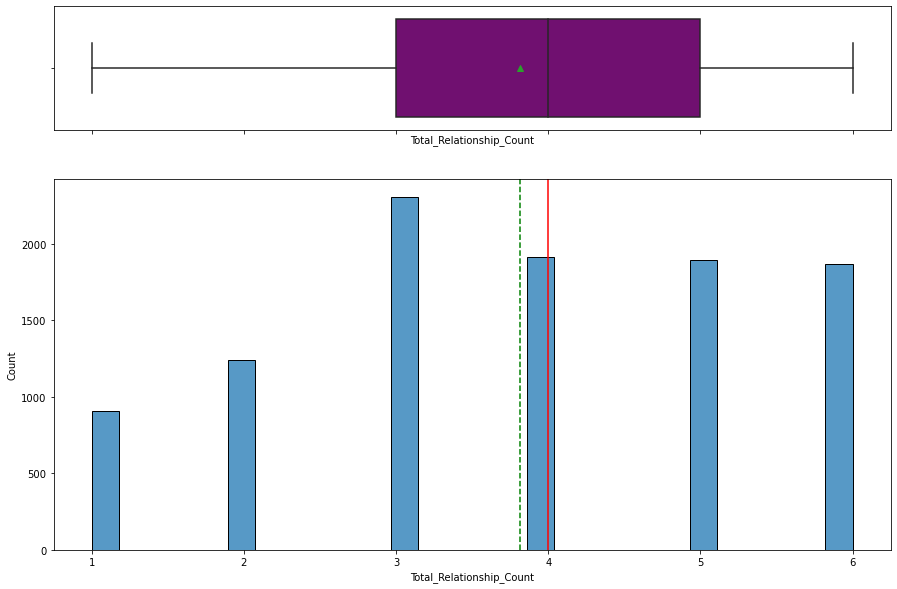

In [46]:
Histogram_Boxplot(ccdata, 'Total_Relationship_Count')

- Total Relationship Count (Products) is **Left Skewed (Median greater than Mean)**
    - The majority of customers have **3 Relationships (Products) with the Bank**

#### Months Inactive (1 Year)

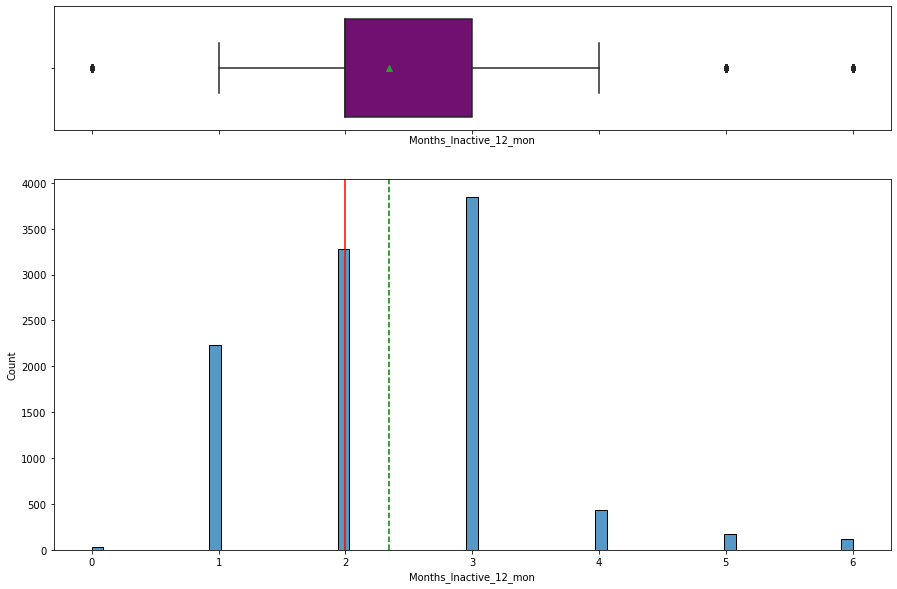

In [47]:
Histogram_Boxplot(ccdata, 'Months_Inactive_12_mon')

- Months Inactive in 1 Year is **Right Skewed (Mean greater than Median)**
    - The majority of customers have **at least 3 Months of Credit Card Inactivity**
    - There are outliers on both ends of the data - at 0 (No inactivity which shows valid active status) and 5 or 6 months of Inactivity
        - These make sense intuitively and don't appear to be needing adjustment/removal

#### Contacts Count (1 Year)

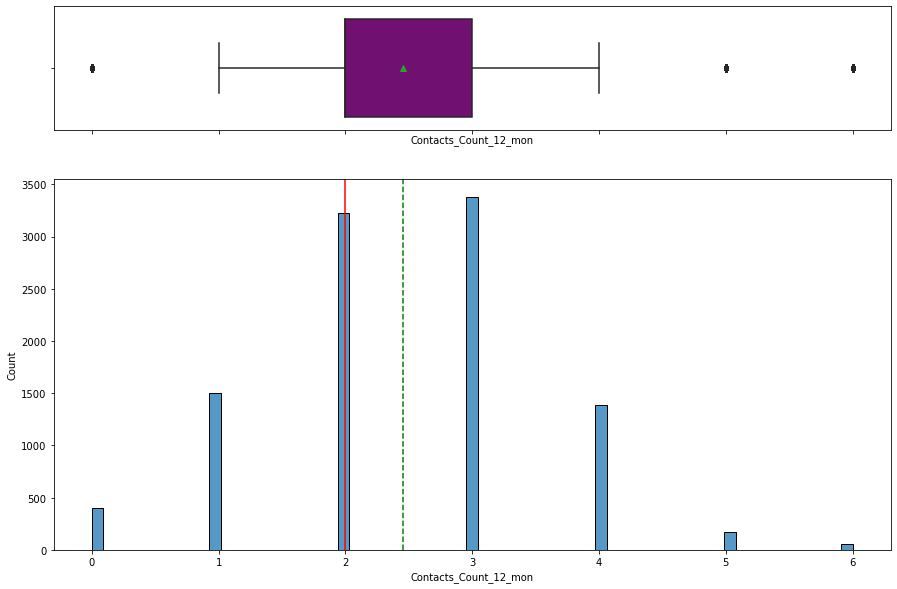

In [48]:
Histogram_Boxplot(ccdata, 'Contacts_Count_12_mon')

- Contacts Count in 1 Year is **Normally Distributed (Mean equal to Median)**
    - The majority of customers have **between 2 and 3 contacts in a year**
    - There are outliers on both ends of the data - at 0 Contacts (not all customers need to be contacted) and 5 or 6 months Contacts
        - These make sense intuitively and don't appear to be needing adjustment/removal
- Contacts Count in 1 Year shows a **very similar pattern (not neccessary correlated) to Months Inactive per Year**

#### Total Revolving Balance

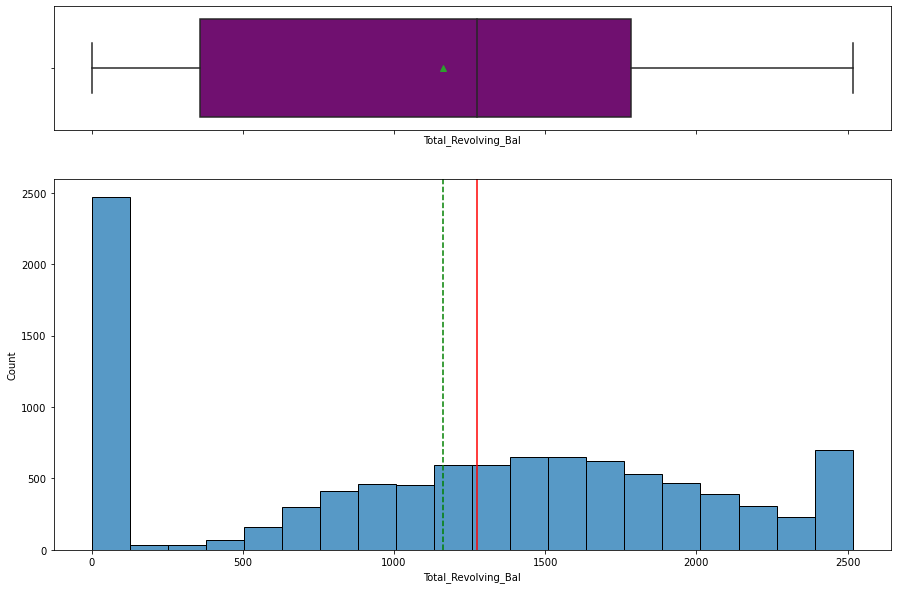

In [49]:
Histogram_Boxplot(ccdata, 'Total_Revolving_Bal')

- Total Revolving Balance is **Left Skewed (Median greater than Mean)**
    - The majority of customers have **a Total Revolving Balance of around \\$1.25k**
    - There are a large amount of customers with a \\**$0 Total Revolving Balance**, indicating full payments of their accounts each month
- There are a large amount of customers with a Maximum Revolving Balance of \\$2.5k which may be a limit placed by the bank on select customers joiningn during a specific promotional period

In [50]:
# Inspect the unique counts of Revolving balance totals, particularly over $2.5k

ccdata['Total_Revolving_Bal'].value_counts()

0       2470
2517     508
1965      12
1480      12
1720      11
        ... 
1401       1
2293       1
2172       1
2040       1
204        1
Name: Total_Revolving_Bal, Length: 1974, dtype: int64

In [51]:
# Inspect the level of Attrition for those customers carrying this promotional balance

ccdata['Attrition_Flag'][ccdata['Total_Revolving_Bal']==2517].value_counts()

Existing Customer    350
Attrited Customer    158
Name: Attrition_Flag, dtype: int64

- It is puzzling as to why over 500 customers sampled would have the exact same revolving balance of \\$2517
    - This must indicate a **specific promotional (0% interest offer)** for this exact figure, of which over 500 customers signed up and are carrying a balance currently
    - Of those customers carrying the promotional balance of \\$2.5k, nearly **70% have stayed actived, with the remaining 30% likely transferring their balances elsewhere**

#### Total Transaction Amount

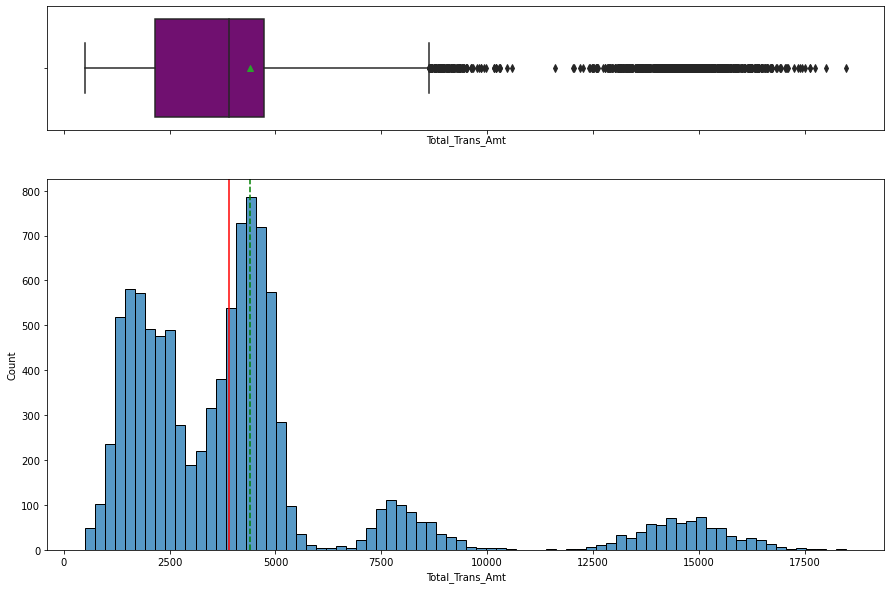

In [52]:
Histogram_Boxplot(ccdata, 'Total_Trans_Amt')

- Total Transaction Amount is **Right Skewed (Mean greater than Median)**
    - The majority of customers have **a Total Transaction Amount of just over \\$3k**
    - There are a **numerous distributions of outliers to the right of the dataset**, one that is greater than **\\$8k** and another substantially peaking after around **\\$12.5k**

The data for this variable will need to be **grouped into 3 sections**:
- Total Transaction Amounts < \\$8k
- Total Transaction Amounts >= \\$8k and < \\$12k
- Total Transaction Amounts >= \\$12k

In [53]:
print('Total Transaction Amounts by Grouping:')
print('')

print('Total Transaction Amount under $8k: ',ccdata['Total_Trans_Amt'][ccdata['Total_Trans_Amt']<=8000].count())
print('')

print('Total Transaction Amount between $8k and $12k: ',ccdata['Total_Trans_Amt'][(ccdata['Total_Trans_Amt']>8000) & (ccdata['Total_Trans_Amt']<12000)].count())
print('')

print('Total Transaction Amount over $12k: ',ccdata['Total_Trans_Amt'][ccdata['Total_Trans_Amt']>=12000].count())
print('')

print('Total: ',ccdata['Total_Trans_Amt'].count())
print('')

Total Transaction Amounts by Grouping:

Total Transaction Amount under $8k:  9039

Total Transaction Amount between $8k and $12k:  342

Total Transaction Amount over $12k:  746

Total:  10127



In [54]:
# Create a for loop to modify each value in Months on Book column based on the amount of months in the 'if' criteria set

for i in ccdata['Total_Trans_Amt']:
    if i <= 8000:
        ccdata['Total_Trans_Amt'].replace(to_replace = i, value = 'Total Transaction Amount under $8k', inplace=True)
        
    elif i < 12000:
        ccdata['Total_Trans_Amt'].replace(to_replace = i, value = 'Total Transaction Amount between $8k and $12k', inplace=True)
    
    elif i >=12000:
        ccdata['Total_Trans_Amt'].replace(to_replace = i, value = 'Total Transaction Amount over $12k:', inplace=True)

        
# Convert variable from Object to Category for future One-Hot-Encoding

ccdata['Total_Trans_Amt'] = ccdata['Total_Trans_Amt'].astype('category')  

In [55]:
# Rerun summary to ensure all datatypes are either Numeric or Categorical

ccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  category
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

#### Total Transaction Count

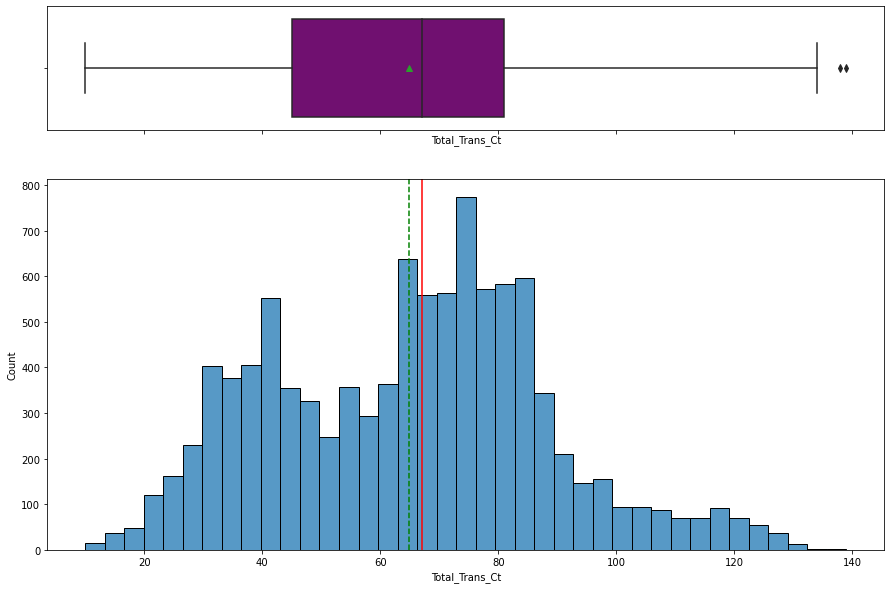

In [56]:
Histogram_Boxplot(ccdata, 'Total_Trans_Ct')

- Total Revolving Balance is **Slightly Left Skewed (Median greater than Mean)**
    - The majority of customers have Total Transactions numbering around 65 instances
- There are a handful of outliers past 130 transactions which should be examined and possibly limited/capped

In [57]:
# Examine the 10 largest values in the Total Transaction Count column

ccdata.Total_Trans_Ct.nlargest(10)

9324     139
9586     138
9213     134
9629     132
9261     131
9269     131
9339     131
9728     131
9841     131
10085    131
Name: Total_Trans_Ct, dtype: int64

There are **2 datapoints** above the majority range of 130-132 and possibly even 134 transactions a year.
Let's examine the data behind these to determine whether or not to drop/cap.

In [58]:
ccdata[ccdata['Total_Trans_Ct']>134]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
9324  Existing Customer            41      M                3             NaN   
9586  Existing Customer            56      F                1     High School   

     Marital_Status Income_Category Card_Category   Months_on_book  \
9324        Married         $120K +          Blue     2 to 3 Years   
9586        Married         Unknown          Blue  4 Years or More   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
9324                         2                       4                      3   
9586                         1                       2                      1   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
9324       34516.0                  638          33878.0   
9586       17542.0                 2517          15025.0   

      Total_Amt_Chng_Q4_Q1                      Total_Trans_Amt  \
9324                 0.724  Total Transaction Amount over $12k:   
9586                 0.800  Total Transaction Amount over $12k:   

      Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
9324             139                0.675                  0.018  
9586             138                0.792                  0.143

These two datapoints above appear valid and, although missing some data in different columns, still offer value for Customer Analysis.  They should **not be dropped**, but the Total Transactions **capped at the next highest level of 134**.

In [59]:
# Cap/Clip the Customer Age variable to the next highest value of 134

ccdata['Total_Trans_Ct'].clip(upper=134, inplace=True)

### Bivariate Analysis - Categorical

In [60]:
def Stacked_Barplot(Data, Predictor, Target):
    """
    Stacked Bar Chart with Category Counts print above

    Data: DataFrame
    Predictor: Independent Variable Selected
    Target: Target Variable: Attrition_Flag
    """
    Count = Data[Predictor].nunique() # Pull in each unique value for selected Independent variable
    Sorter = Data[Target].value_counts().index[-1] # Pull in last row of Target variable 
    Tab1 = pd.crosstab(Data[Predictor], Data[Target], margins=True).sort_values(
        by=Sorter, ascending=False # Create crosstab with columns specified above, in descending order
    )
    print(Tab1)
    print("-" * 80) # Print Line break
    
    Tab = pd.crosstab(Data[Predictor], Data[Target], normalize="index").sort_values(
        by=Sorter, ascending=False # Second tab created to pull in bottom results (summary for larger data not fully shown)
    )
    Tab.plot(kind="bar", stacked=True, figsize=(Count + 1, 5)) # Dynamic plot figure size based on unique vaues in column used
    plt.legend(
        loc="lower left",
        frameon=False, # Frame the legend and possible bottom left
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1)) # Position chart legend upper left
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
--------------------------------------------------------------------------------


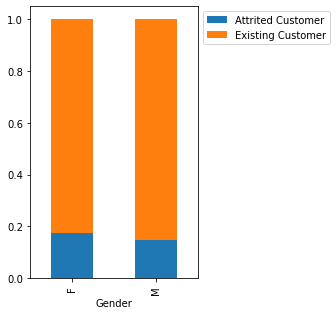

In [61]:
Stacked_Barplot(ccdata, 'Gender', 'Attrition_Flag')

- **Female customers** are slightly more likely to close out their Credit Cards

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
High School                    543               2957  3500
Graduate                       487               2641  3128
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
--------------------------------------------------------------------------------


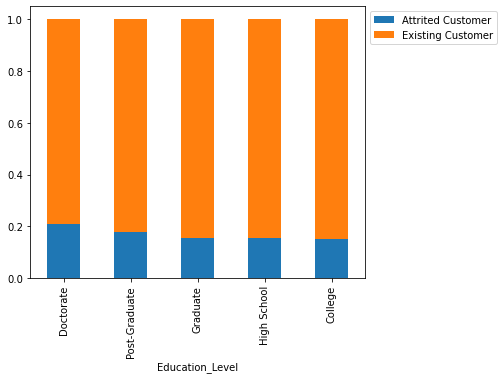

In [62]:
Stacked_Barplot(ccdata, 'Education_Level', 'Attrition_Flag')

- Customers with a **Docturate education (22%)** are the most likely to close out the Credit Card accounts, followed by customers with **Post Doctorate educations (19%)**
- All other Education levels show no difference in likelihood of closing their accounts (17%)

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
--------------------------------------------------------------------------------


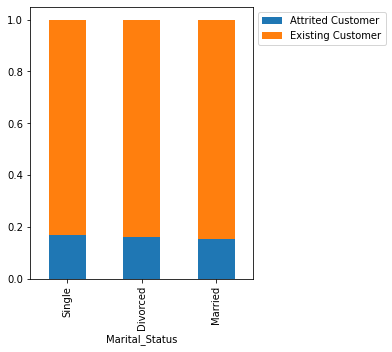

In [63]:
Stacked_Barplot(ccdata, 'Marital_Status', 'Attrition_Flag')

- There is **no major difference** in the effects of Marital Status on whether/not a customer closes out their Credit Card

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
Unknown                        187                925   1112
$120K +                        126                601    727
--------------------------------------------------------------------------------


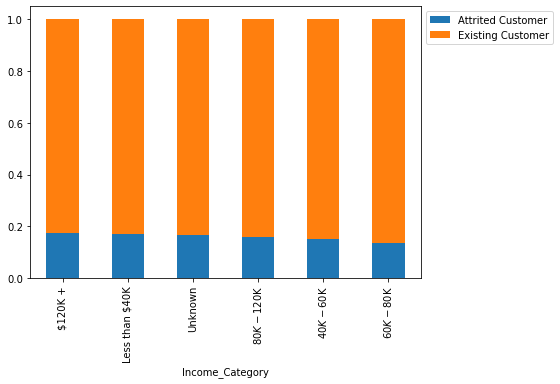

In [64]:
Stacked_Barplot(ccdata, 'Income_Category', 'Attrition_Flag')

- Customers with **Incomes between \\$60k and \\$80k** are the most likely to **remain active** with the bank with the lowest attrition rate of 16%
- All other Income Categories are relatively even, with **Customers earning over \\$120k** showing slightly higher attrition rates of around 18%

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
--------------------------------------------------------------------------------


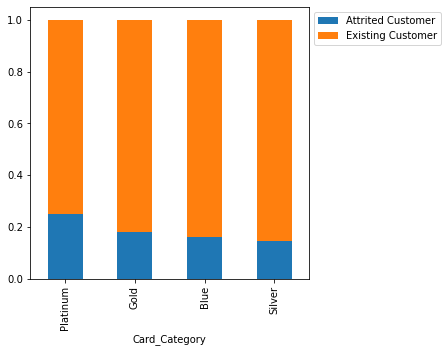

In [65]:
Stacked_Barplot(ccdata, 'Card_Category', 'Attrition_Flag')

- Although there are hardly any customers with **Platinum** Credit Cards, they have a substantially higher **Attrition rate (25%)**, which could be indicative of higher fees, etc.
- The **Blue Card, owned by over 90% of the dataset**, shows an Attrition Rate of roughly **17%** which is slightly higher than the overall ratio
    - The overall ratio of offset by lower attrition of Silver Card members, at around 15%


Attrition_Flag   Attrited Customer  Existing Customer    All
Months_on_book                                              
All                           1627               8500  10127
2 to 3 Years                   871               4547   5418
3 to 4 Years                   519               2688   3207
1 to 2 Years                   126                721    847
4 Years or More                111                544    655
--------------------------------------------------------------------------------


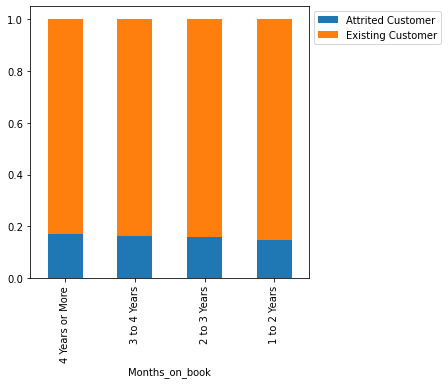

In [66]:
Stacked_Barplot(ccdata, 'Months_on_book', 'Attrition_Flag') # Note that this is was previously numeric and grouped/converted

- Although we had previously seen that a large majority of customers were all showing exactly 36 Months on Book (which is why 4 new groupings were creaed), it appears that there are **no major shifts in Attrition rates** between each timeframe grouping
    - Customers with between 1 to 2 years (**no New Customers under 1 year** with the bank) show slightly lower Attrition rates, however other factors could be at play that only manifest over longer periods of time

Attrition_Flag                                 Attrited Customer  \
Total_Trans_Amt                                                    
All                                                         1627   
Total Transaction Amount under $8k                          1474   
Total Transaction Amount between $8k and $12k                153   
Total Transaction Amount over $12k:                            0   

Attrition_Flag                                 Existing Customer    All  
Total_Trans_Amt                                                          
All                                                         8500  10127  
Total Transaction Amount under $8k                          7565   9039  
Total Transaction Amount between $8k and $12k                189    342  
Total Transaction Amount over $12k:                          746    746  
--------------------------------------------------------------------------------


<Figure size 1440x1440 with 0 Axes>

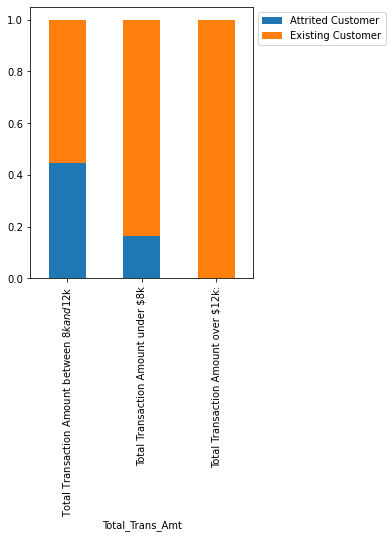

In [67]:
plt.figure(figsize=(20,20))
Stacked_Barplot(ccdata, 'Total_Trans_Amt', 'Attrition_Flag') # Note that this is was previously numeric and grouped/converted

- It is apparent that those Customers with Annual **Transaction Amounts greater than \\$12k** (a newly created group to account for prior outliers) are **extremely unlikely of closing their Credit Card accounts**
- Inversely, Customers with Annual **Transaction Amounts between \\$8k and \\$12k** (although there aren't many), have a very high chance of Attrition (around 45%)

### Bivariate Analysis - Numerical

In [68]:
# Calculate the Correlation between all numeric values

Corr = ccdata.corr()
Corr

Customer_Age  Dependent_count  \
Customer_Age                  1.000000        -0.122129   
Dependent_count              -0.122129         1.000000   
Total_Relationship_Count     -0.010968        -0.039076   
Months_Inactive_12_mon        0.054343        -0.010768   
Contacts_Count_12_mon        -0.018443        -0.040505   
Credit_Limit                  0.002520         0.068065   
Total_Revolving_Bal           0.014776        -0.002688   
Avg_Open_To_Buy               0.001194         0.068291   
Total_Amt_Chng_Q4_Q1         -0.062207        -0.035439   
Total_Trans_Ct               -0.066995         0.049925   
Total_Ct_Chng_Q4_Q1          -0.012396         0.011087   
Avg_Utilization_Ratio         0.007105        -0.037135   

                          Total_Relationship_Count  Months_Inactive_12_mon  \
Customer_Age                             -0.010968                0.054343   
Dependent_count                          -0.039076               -0.010768   
Total_Relationship_Count                  1.000000               -0.003675   
Months_Inactive_12_mon                   -0.003675                1.000000   
Contacts_Count_12_mon                     0.055203                0.029493   
Credit_Limit                             -0.071386               -0.020394   
Total_Revolving_Bal                       0.013726               -0.042210   
Avg_Open_To_Buy                          -0.072601               -0.016605   
Total_Amt_Chng_Q4_Q1                      0.050119               -0.032247   
Total_Trans_Ct                           -0.241864               -0.042821   
Total_Ct_Chng_Q4_Q1                       0.040831               -0.038989   
Avg_Utilization_Ratio                     0.067663               -0.007503   

                          Contacts_Count_12_mon  Credit_Limit  \
Customer_Age                          -0.018443      0.002520   
Dependent_count                       -0.040505      0.068065   
Total_Relationship_Count               0.055203     -0.071386   
Months_Inactive_12_mon                 0.029493     -0.020394   
Contacts_Count_12_mon                  1.000000      0.020817   
Credit_Limit                           0.020817      1.000000   
Total_Revolving_Bal                   -0.053913      0.042493   
Avg_Open_To_Buy                        0.025646      0.995981   
Total_Amt_Chng_Q4_Q1                  -0.024445      0.012813   
Total_Trans_Ct                        -0.152218      0.075859   
Total_Ct_Chng_Q4_Q1                   -0.094997     -0.002020   
Avg_Utilization_Ratio                 -0.055471     -0.482965   

                          Total_Revolving_Bal  Avg_Open_To_Buy  \
Customer_Age                         0.014776         0.001194   
Dependent_count                     -0.002688         0.068291   
Total_Relationship_Count             0.013726        -0.072601   
Months_Inactive_12_mon              -0.042210        -0.016605   
Contacts_Count_12_mon               -0.053913         0.025646   
Credit_Limit                         0.042493         0.995981   
Total_Revolving_Bal                  1.000000        -0.047167   
Avg_Open_To_Buy                     -0.047167         1.000000   
Total_Amt_Chng_Q4_Q1                 0.058174         0.007595   
Total_Trans_Ct                       0.056053         0.070818   
Total_Ct_Chng_Q4_Q1                  0.089861        -0.010076   
Avg_Utilization_Ratio                0.624022        -0.538808   

                          Total_Amt_Chng_Q4_Q1  Total_Trans_Ct  \
Customer_Age                         -0.062207       -0.066995   
Dependent_count                      -0.035439        0.049925   
Total_Relationship_Count              0.050119       -0.241864   
Months_Inactive_12_mon               -0.032247       -0.042821   
Contacts_Count_12_mon                -0.024445       -0.152218   
Credit_Limit                          0.012813        0.075859   
Total_Revolving_Bal                   0.058174        0.056053   
Avg_Open_T

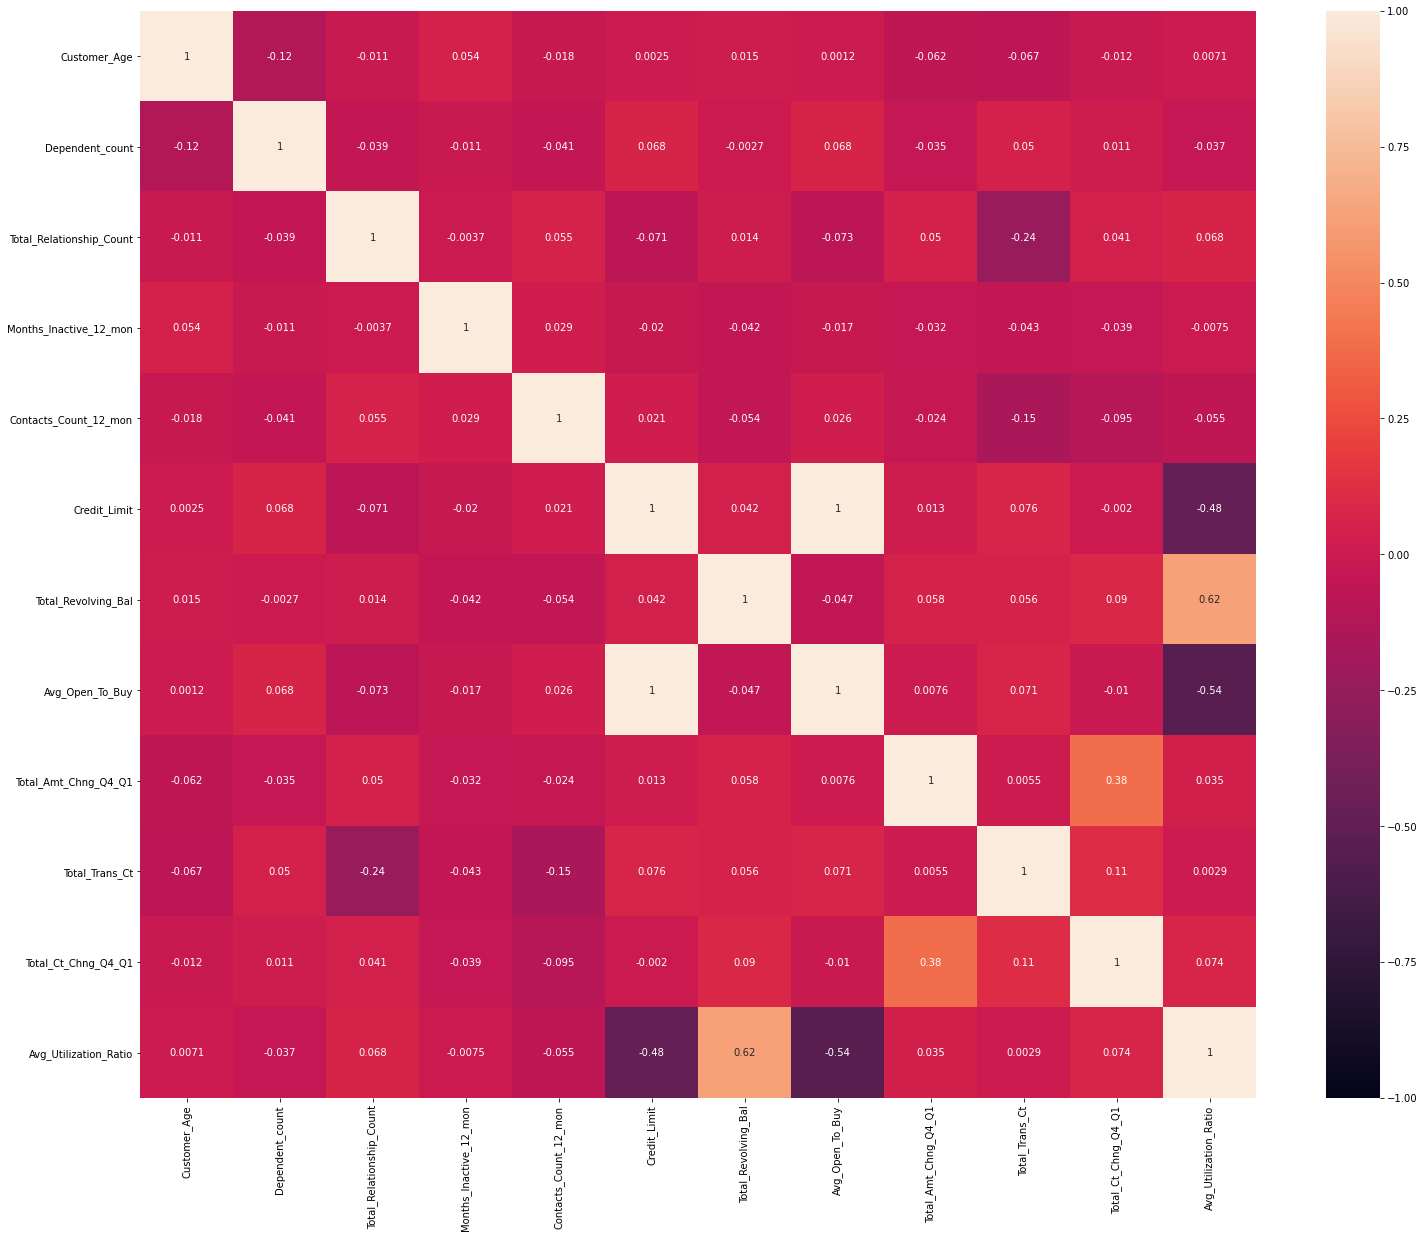

In [69]:
# Create a summary heatmap of the correalations above, including annotation of values

plt.figure(figsize=(25,20)) 
sns.heatmap(Corr, annot=True, vmin=-1, vmax=1, fmt='.2g', cmap='rocket'); # Format to 2 decimals, Min/Man range 0 t0 1

<Figure size 1800x1440 with 0 Axes>

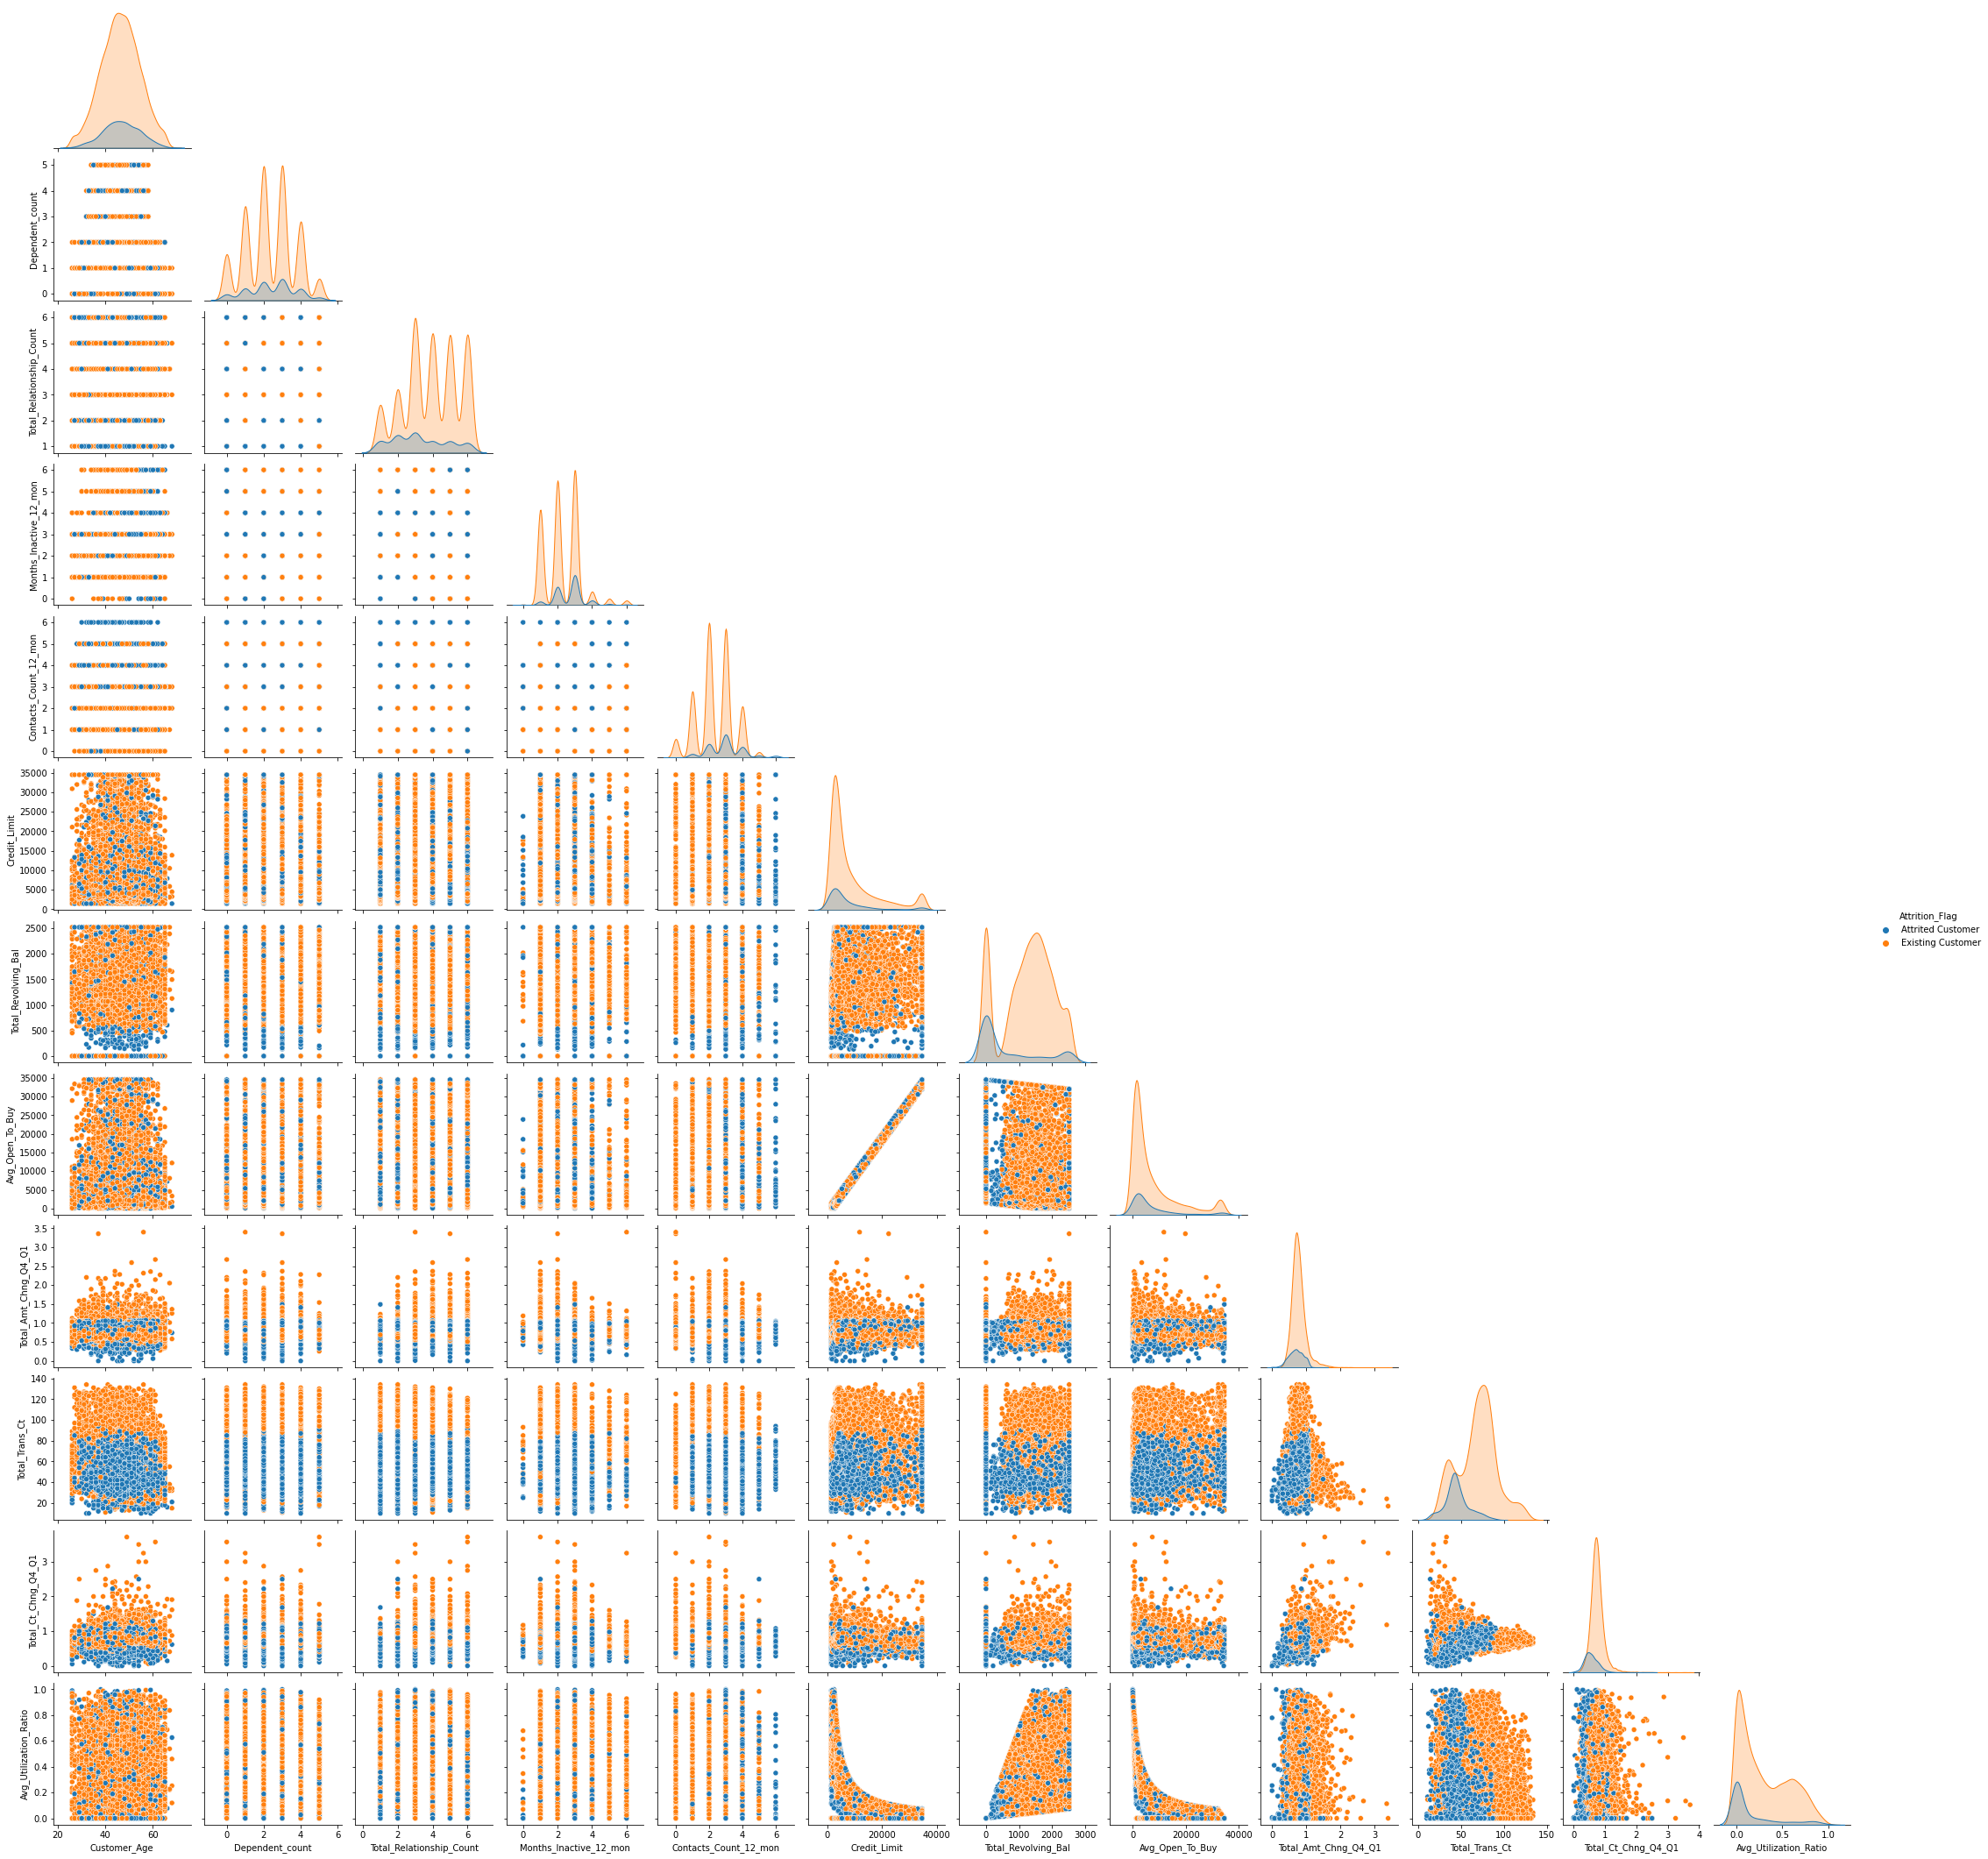

In [70]:
# View all Correlations above using a pairplot (corner split) graph, with target (Attrition_Flag as Hue)

plt.figure(figsize=(25,20))
sns.pairplot(ccdata, hue='Attrition_Flag', corner=True);

### Insights

- **Credit Limit and Average Open Balance** to Buy have a perfectly liner relationship (**Correlation=1**), which make sense intuitively since the available Credit Limit indicates the full extent of buying power of the customer
- Credit Limit and Average Open Balance to Buy (both of which are equally correlated) show a **negative correlation (not completely linear)** with Credit Utilization Ratio
    - The lower one's Credit Limit, etc., the higher the Credit Utilization Ratio could reach each month, in general
- Both the Total Amount and Counts ratios transactions between Q4 and Q1 indicate a strong chance of **Customers with Higher Q4 spending (between 1 and 3 times Q1 levels**) maintaining their Credit Cards
- Similarly, customers with Total Tranaction Counts greater than around **95 a Year** are far more likely to stay active with their Credit Card service
- There are customers with \\$0 Revolving Balance, which is accurate for those that pay off the full balance each month
- Surprisingly, both Total Relationship Count and number of Months Inactive over 1 Year shows conflicting results for both Existing and Attrited Customers
    - This is indicative of other factors being at play affecting the final customer decision to stay/leave their current Credit Card service

### Customer Attrition Flag vs Key (Numeric) Customer Insights

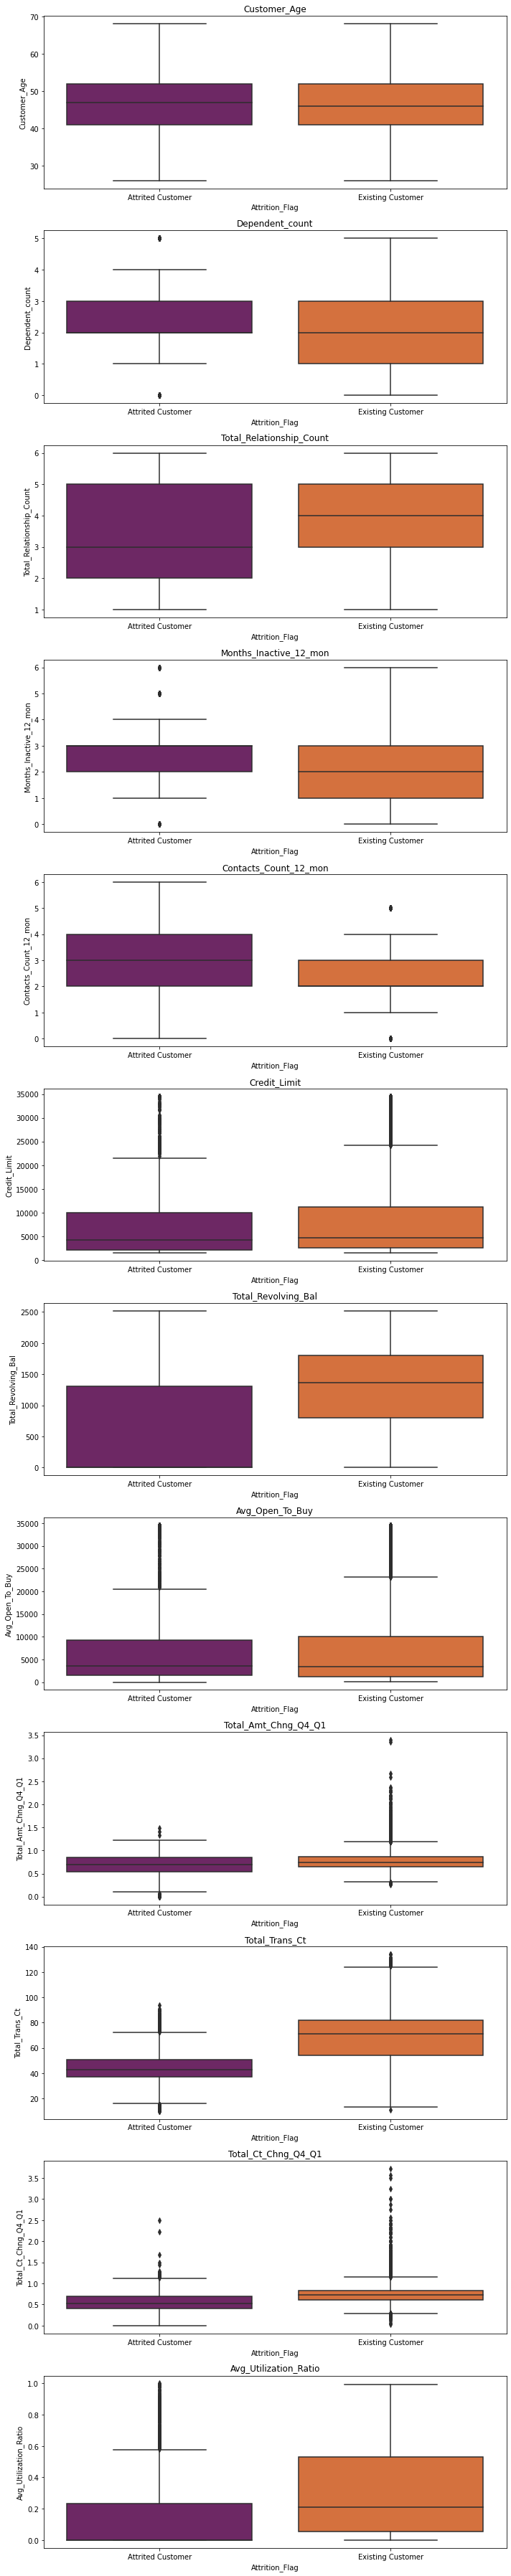

In [71]:
# Create a box plot summary chart for all Customer details and how they relate to whether they are attrited/existing

Numeric_Cols = ccdata[['Customer_Age','Dependent_count', 'Total_Relationship_Count',
                     'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                     'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct',
                     'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']].columns.tolist()

plt.figure(figsize=(10,50))
for i, variable in enumerate(Numeric_Cols): # Enumerate will create pairs of the Element and Index (Count) in Numeric_Cols list
                     plt.subplot(12,1,i+1) # Build subplots for all 14 columns shown above, showing 2 per line
                     sns.boxplot(x=ccdata['Attrition_Flag'], y=ccdata[variable], palette='inferno')
                     plt.tight_layout()
                     plt.title(variable)
plt.show()


# for i, variable in enumerate(cols):
#                      plt.subplot(3,2,i+1)
#                      sns.boxplot(data["Attrition"],data[variable],palette="PuBu")
#                      plt.tight_layout()
#                      plt.title(variable)
# plt.show()

### Observations
- **Customer Age has no impact** on likelihood of customer cancelling their Credit Card
- Customers with **2 or more dependents have a greater chance of attrition** vs. customers with 1 or fewer dependents
- Customers with **3 or fewer Relationships (Products with Bank)** have a greater chance of cancelling their Credit Card
- Those customers with higher months of **inactive usage over a 1 year period (2 or more months)** have a much higher chance of cancelling their Credit Card services with the bank
    - There are outliers on both ends of the spectrum for both groupings, below 20 months and above 50 months
- Customers with **higher contacts within a 1 year period** are more likely to close their Credit Card with the bank
- There is a very small difference in Credit Limit on customer attrition, with higher limits more likely to keep customers active
- The **higher the Revolving Credit Balance**, the more likely the customer will **maintain their Credit Card service** with the bank
- Available Open Balance to Buy (Available Balance) shows very little impact on customers keeping/closing their Credit Cards
- The ratio of Outstanding Amounts between Q4 and Q1 showed little impact on Credit Card attrition, but does include many outliers in the Existing Customer grouping
- An even stronger trend for likelihood to keep active Credit Cards exists when the **Total Transaction Count is higher (above 50)**
- The ratio of Total Transactions between Q4 and Q1 showed little impact on on Credit Card attrition, skewing slighty towards Existing Customers and including many outliers within that grouping
- The **higher the average Credit Utilization Ratio (greater than 20%)**, the more likely customers are to keep their Credit Cards
    - There are many outliers with extremely high utilization ratios that still ended up closing their Credit Card accounts

### Multivariate Analysis: Correlation to Attrition Flag Variable

In [72]:
ccdata['Total_Revolving_Bal'].nlargest(1000)

3       2517
8       2517
18      2517
32      2517
42      2517
        ... 
8119    2238
8511    2238
3844    2236
476     2235
6838    2235
Name: Total_Revolving_Bal, Length: 1000, dtype: int64

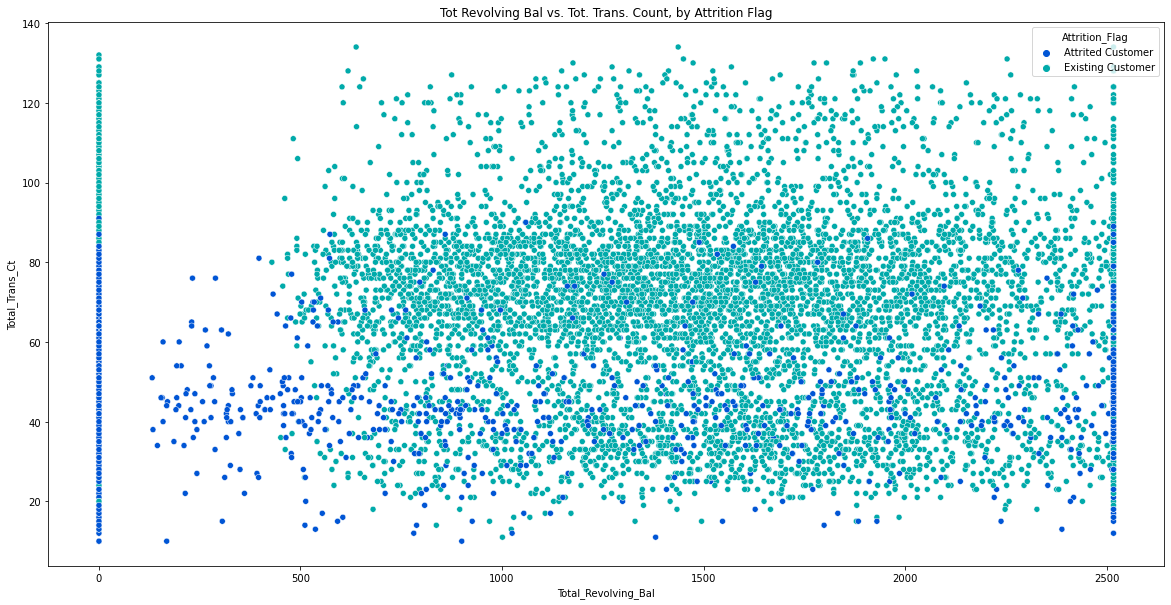

In [73]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

# Set a limit of under $40k income, to exclude outliers 
sns.scatterplot(x=ccdata['Total_Revolving_Bal'], y=ccdata['Total_Trans_Ct'], hue=ccdata['Attrition_Flag']
            , palette='winter', ci=None); # Removing Confidence Interval lines);

plt.title('Tot Revolving Bal vs. Tot. Trans. Count, by Attrition Flag');

- In general, the **higher the Total Transaction Count**, the greater the chance of customers staying active with the company
- Customers with a \\**$0 balance show full payment each month**
    - A lot of those have closed their Credit Cards
- There are also a lot of customers **carrying a promotional balance of \\$2.5k**, of which around 70% have stayed current with the bank while the remaining **30% have transferred their balances elsewhere**

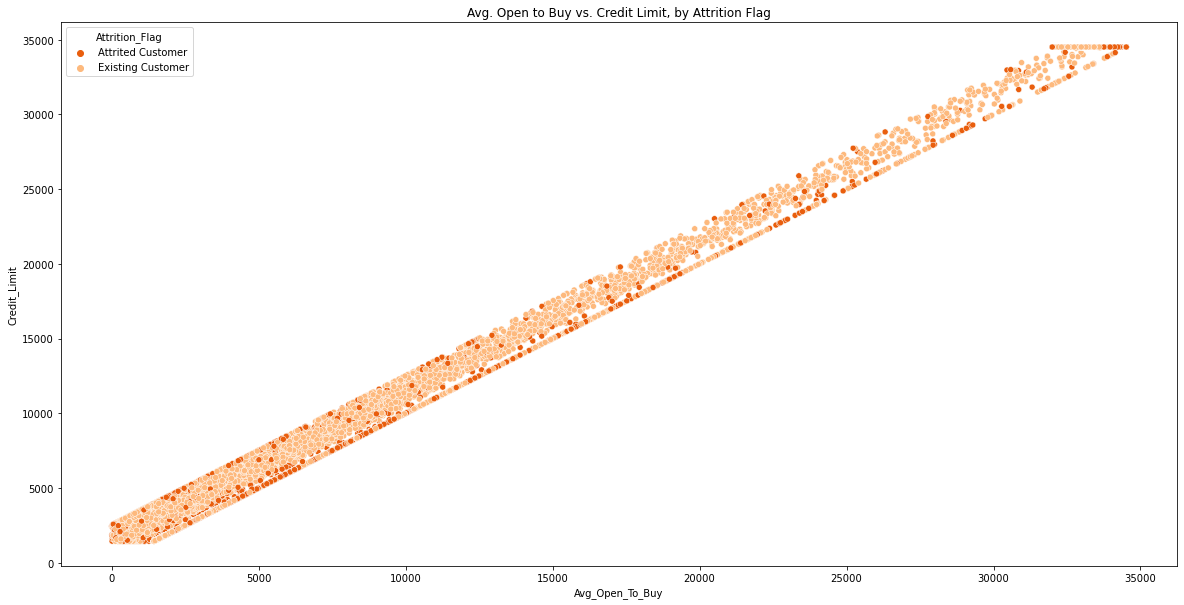

In [74]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

# Set a limit of under $40k income, to exclude outliers 
sns.scatterplot(x=ccdata['Avg_Open_To_Buy'], y=ccdata['Credit_Limit'], hue=ccdata['Attrition_Flag']
            , palette='Oranges_r', ci=None); # Removing Confidence Interval lines);

plt.title('Avg. Open to Buy vs. Credit Limit, by Attrition Flag');

- As previously noted, Credit Limit and Average Open to Buy (Credit Limit - x) are **perfectly correlated**
    - There is a **limit cap** enforced by the bank at around \\**$35k**
    - One of these will be able to be dropped from the dataset when building the model/s

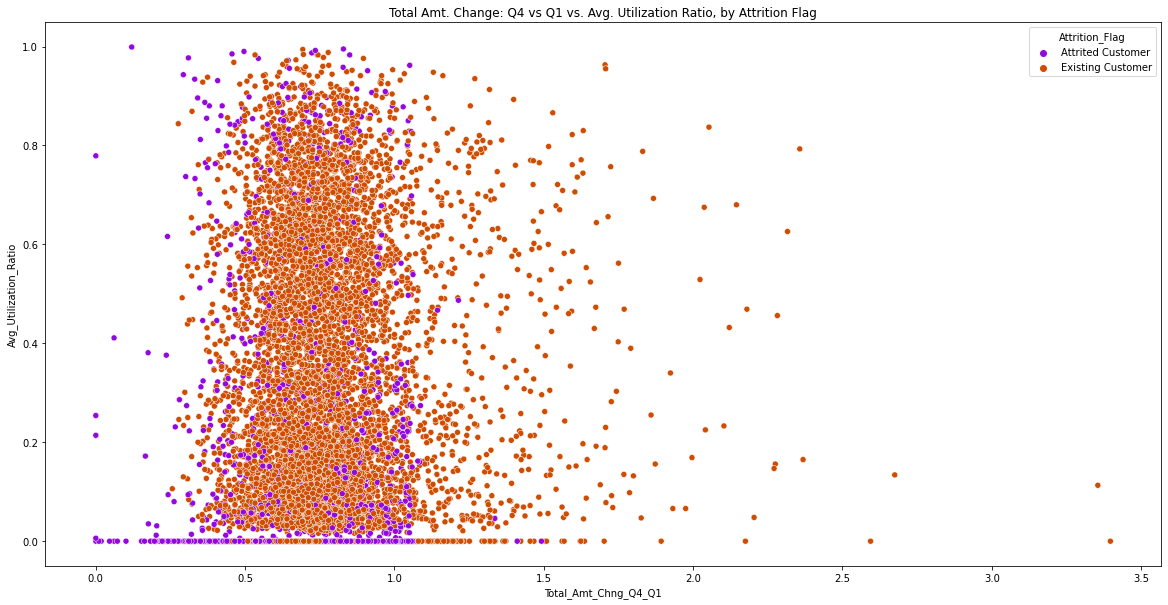

In [75]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

# Set a limit of under $40k income, to exclude outliers 
sns.scatterplot(x=ccdata['Total_Amt_Chng_Q4_Q1'], y=ccdata['Avg_Utilization_Ratio'], hue=ccdata['Attrition_Flag']
            , palette='gnuplot', ci=None); # Removing Confidence Interval lines);

plt.title('Total Amt. Change: Q4 vs Q1 vs. Avg. Utilization Ratio, by Attrition Flag');

- Any spending in Q4 that is in excess of 1x Q1 **spending is historically done by active customers**
    - **Increased Q4/Holiday promotional activity** could boost and maintain active Credit Card usage by customers
    - The Average Utilization Ratio can be seen to reach **nearly 100% of available balance during this timeframe**
        - This potentially **boosts transactional fees and revolving balance charges (interest)** while simultaneously keeping customers active and less likely to move their Credit Card business elsewhere

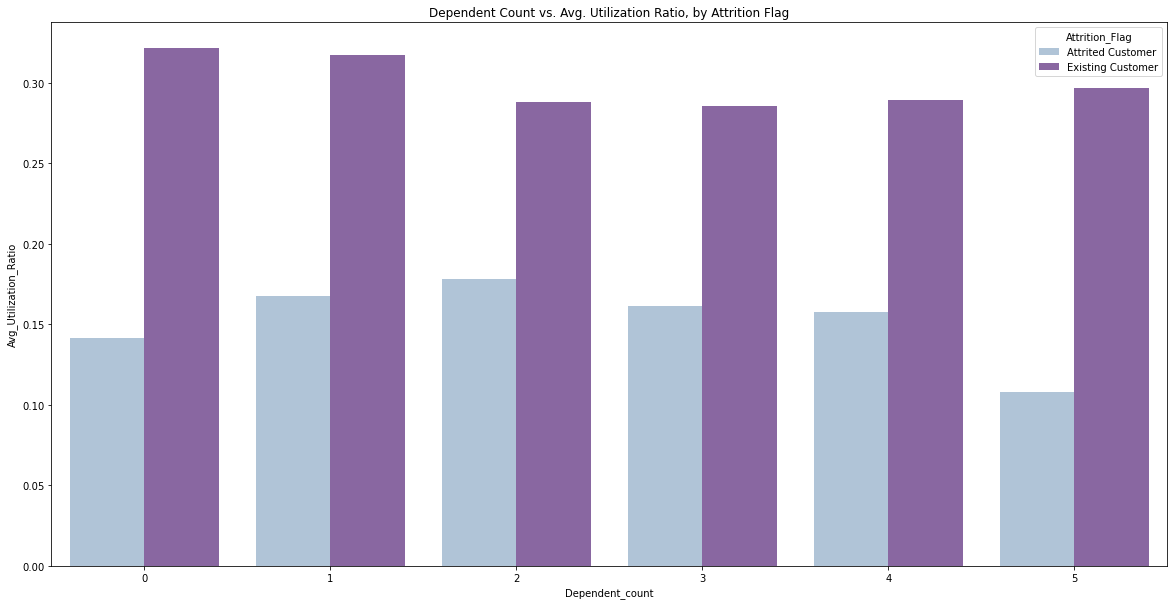

In [76]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

# Set a limit of under $40k income, to exclude outliers 
sns.barplot(x=ccdata['Dependent_count'], y=ccdata['Avg_Utilization_Ratio'], hue=ccdata['Attrition_Flag']
            , palette='BuPu', ci=None); # Removing Confidence Interval lines);

plt.title('Dependent Count vs. Avg. Utilization Ratio, by Attrition Flag');

- Dependent counts have little effect on determining customer attrition as it relates to Credit Cards
- **Average Utilization Ratios**, however, show a strong increase in likelihood of staying active as a customer, the higher they increase - particularly when **surpassing 30%**

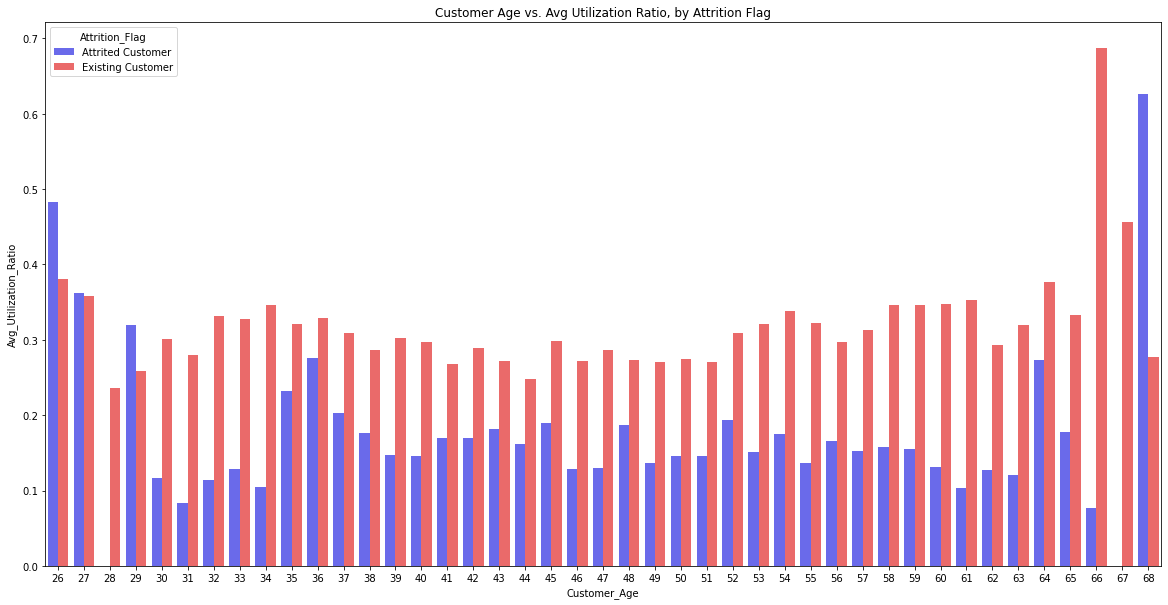

In [77]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

# Set a limit of under $40k income, to exclude outliers 
sns.barplot(x=ccdata['Customer_Age'], y=ccdata['Avg_Utilization_Ratio'], hue=ccdata['Attrition_Flag']
            , palette='seismic', ci=None); # Removing Confidence Interval lines);

plt.title('Customer Age vs. Avg Utilization Ratio, by Attrition Flag');

- Customers, of all ages, who **Utilize a higher portion of their Credit Limit are more likely to stay active** with their Credit Card service
    - There are anomalies for ages 26 and 68 who, for whatever reasons, spend a large portion of their available Credit Limits and still close out their accounts
        - This may be due to **Balance Transfer Promotions** and other incentives from other competitors or possibly the downsizing and closure of Credit facilities by **older customers transitioning to a retired lifestyle**

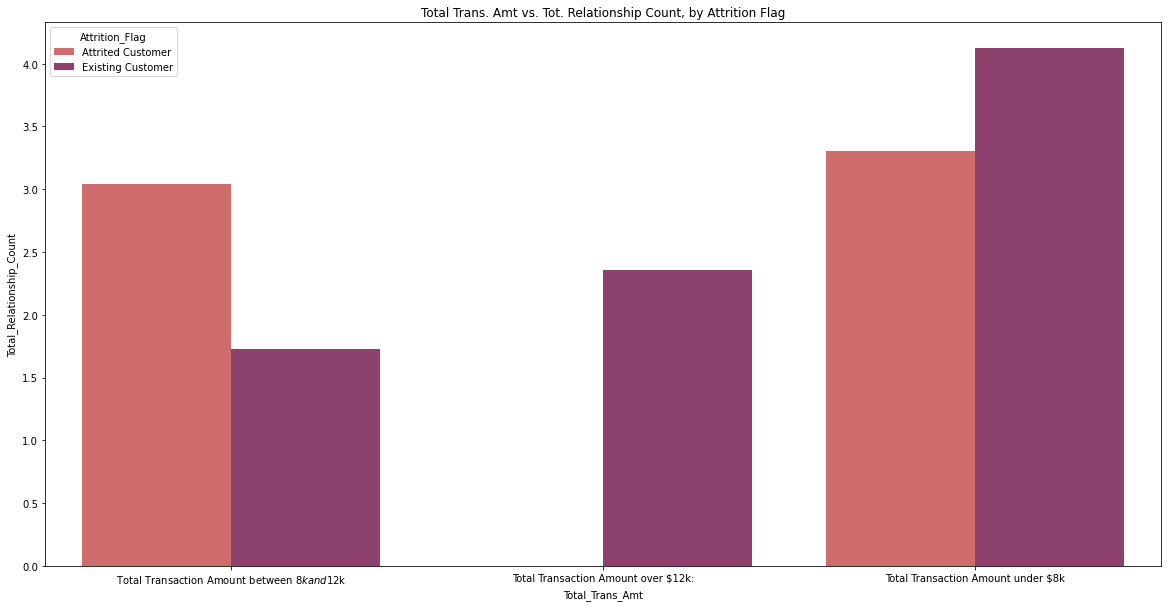

In [78]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

# Set a limit of under $40k income, to exclude outliers 
sns.barplot(x=ccdata['Total_Trans_Amt'], y=ccdata['Total_Relationship_Count'], hue=ccdata['Attrition_Flag']
            , palette='flare', ci=None); # Removing Confidence Interval lines);

plt.title('Total Trans. Amt vs. Tot. Relationship Count, by Attrition Flag');

- Customers spending **under \\$8k** have the **highest amount of Relationships/Products** with the bank, yet also show the highest levels of attrition proportionately
    - This attrition ratio is even worse for customers spending between \\**$8k and \\$12k**, which may indicate that the **additional Relationships/Products are canabalizing business from the Credit Card business**
- Conversely, those customers spending the highest amounts each year, **over \\$12k** have the lowest count of Relationships/Products with the bank **yet have no attrition**

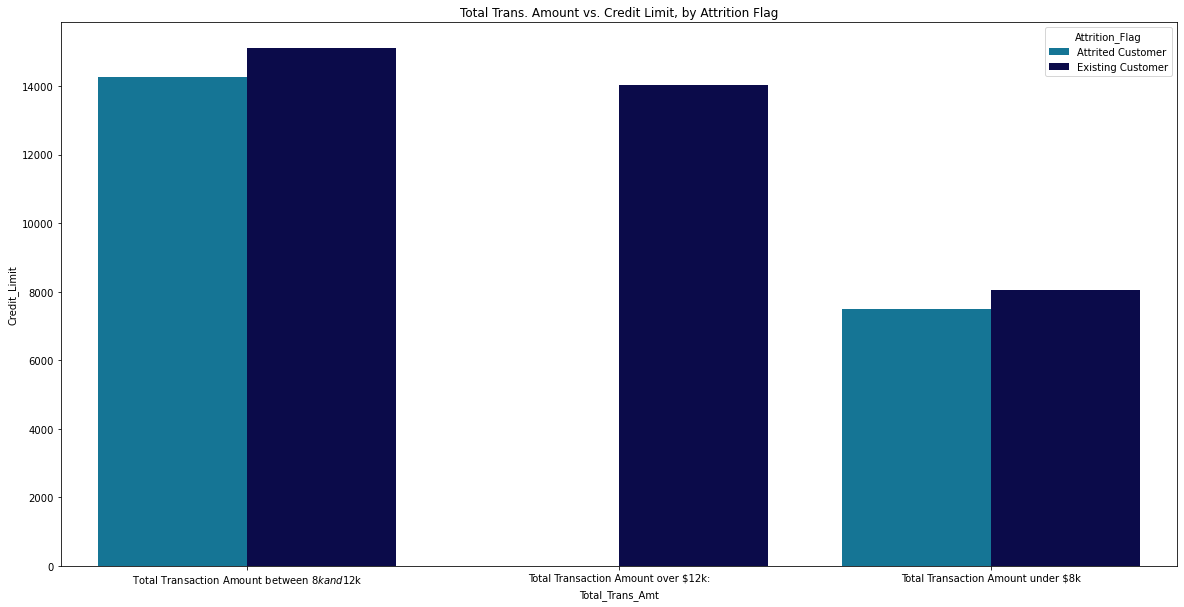

In [79]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

# Set a limit of under $40k income, to exclude outliers 
sns.barplot(x=ccdata['Total_Trans_Amt'], y=ccdata['Credit_Limit'], hue=ccdata['Attrition_Flag']
            , palette='ocean_r', ci=None); # Removing Confidence Interval lines);

plt.title('Total Trans. Amount vs. Credit Limit, by Attrition Flag');

- **Customers spending over \\$12k a year show no likelihood of attrition**
- The majority of customers sampled spend **between \\$8k and \\$12k**
    - A large portion of these customers are shown to cancel their Credit Cards and appear to be grossly underserved by the Bank in terms of customer loyalty, etc.
    - Similarly, to a lesser extent, customers spending **under \\$8k a year** have higher attrition levels and appear underserved by the bank and a large focal area for the existing customers left

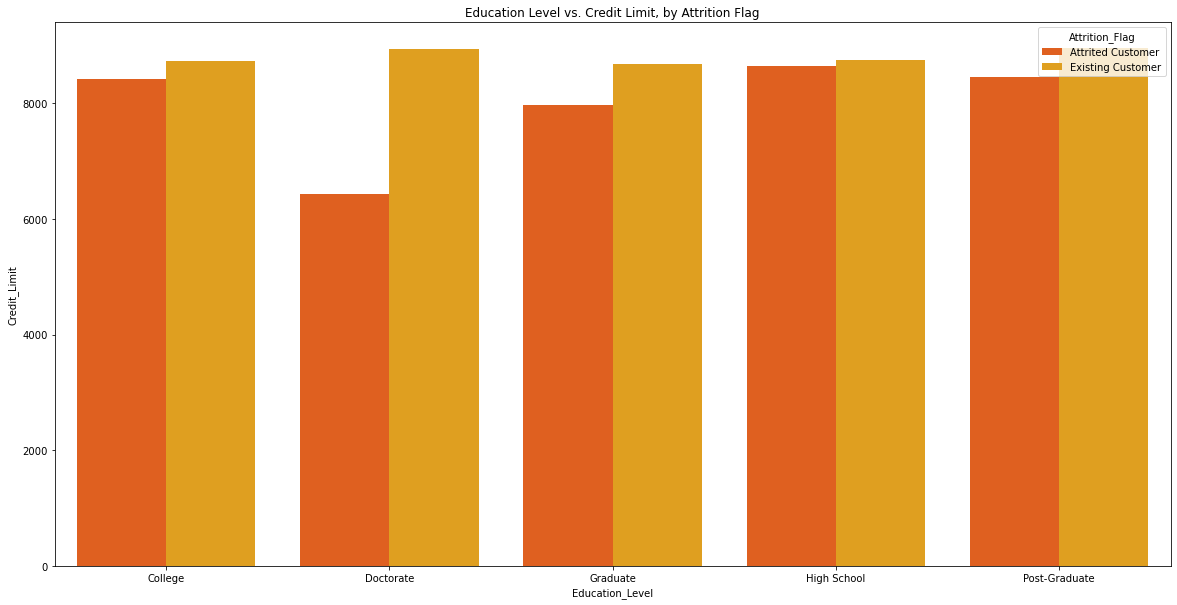

In [80]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

# Set a limit of under $40k income, to exclude outliers 
sns.barplot(x=ccdata['Education_Level'], y=ccdata['Credit_Limit'], hue=ccdata['Attrition_Flag']
            , palette='autumn', ci=None); # Removing Confidence Interval lines);

plt.title('Education Level vs. Credit Limit, by Attrition Flag');

- **Doctorate and Graduate** educated customers have a lower chance of attrition
    - Credit Limits are relatively even across all Education Levels, with high level educated customers having slightly higher limits on average

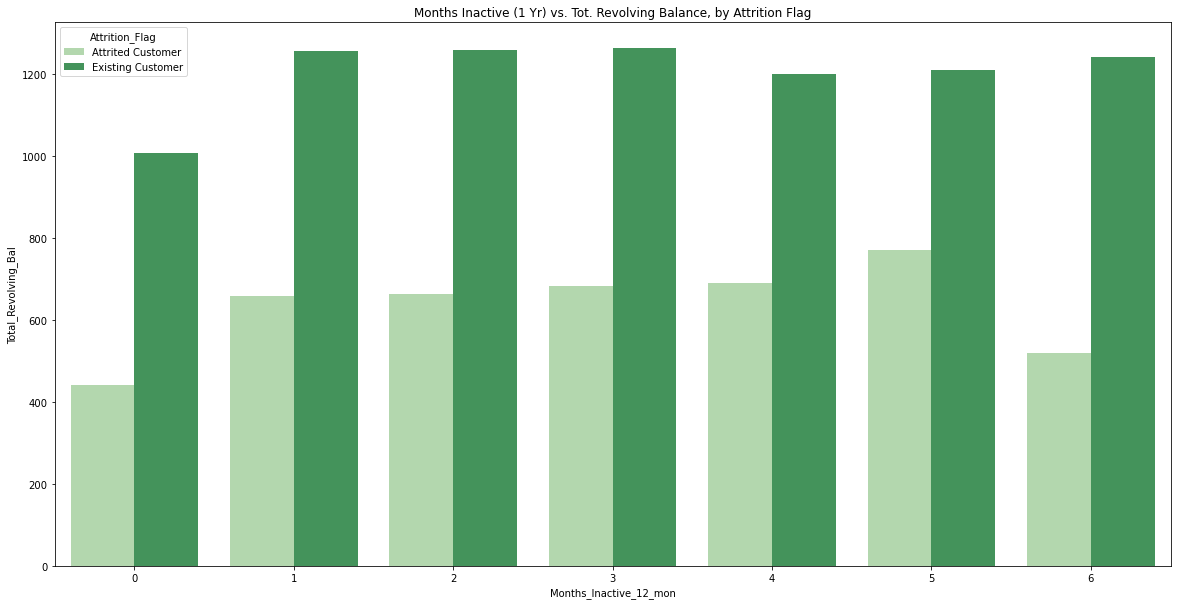

In [81]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

# Set a limit of under $40k income, to exclude outliers 
sns.barplot(x=ccdata['Months_Inactive_12_mon'], y=ccdata['Total_Revolving_Bal'], hue=ccdata['Attrition_Flag']
            , palette='Greens', ci=None); # Removing Confidence Interval lines);

plt.title('Months Inactive (1 Yr) vs. Tot. Revolving Balance, by Attrition Flag');

- Months of Inactivity **doesn't appear to be a clear Indicator** of customer decisions to cancel Credit Card services

## Building the Model/s

### Model Building - Approach

- Data Preparation - **mostly complete - rop any Highly Correlated variables**
- Partition the data into Train (Temp and Validation) and Test Sets
- Build model/s on Training Data, Test on Validation Data to **avoid Data Leakage**
- Tune the model/s for better performance (Train to Validation Sets)
- **Fit the Final, Tested) model results to the Test Data**

### Drop Credit Limit or Avg. Open to Buy (1.0 Correlation)

In [82]:
# Credit Limit appears to be more helpful intuitively for analysis and testing, let's drop Avg. Open to Buy

ccdata.drop('Avg_Open_To_Buy', axis=1, inplace=True)

### Split the Data (Train, Temp, Val, Test)

In [83]:
# Create a copy of latest DataFrame through prior step above

ccdata1 = ccdata.copy()

In [84]:
ccdata1.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [85]:
# Create K-Nearest Neighbor (5 Neighbors Default) Imputer for missing values

Imputer = KNNImputer(n_neighbors=5)

In [86]:
# List Columns/Variables with missing values for Imputer

Cols_Imputer = ['Education_Level',
                'Marital_Status']

In [87]:
# Manually pass through numeric values for each (Categorical) Column KNN imputation through Label Encoding

Education_Level = {'Uneducated': 0, 'High School': 1, 'College': 2,
                   'Graduate': 3, 'Post-Graduate': 4, 'Doctorate': 5}


ccdata1['Education_Level'] = ccdata1['Education_Level'].map(Education_Level)

Marital_Status = {'Divorced': 0, 'Single': 1, 'Married': 2} # Ordinal(Divorced, Single, Married)
ccdata1['Marital_Status'] = ccdata1['Marital_Status'].map(Marital_Status)

In [88]:
# Examine the top 10 rows of data to ensure Education Level & Marital Status were convered to numeric (ordinal)

ccdata1.head(10)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3               1   
1  Existing Customer            49      F                5               3   
2  Existing Customer            51      M                3               3   
3  Existing Customer            40      F                4               1   
4  Existing Customer            40      M                3               1   
5  Existing Customer            44      M                2               3   
6  Existing Customer            51      M                4             NaN   
7  Existing Customer            32      M                0               1   
8  Existing Customer            37      M                3               1   
9  Existing Customer            48      M                2               3   

  Marital_Status Income_Category Card_Category Months_on_book  \
0              2     $60K - $80K          Blue   3 to 4 Years   
1              1  Less than $40K          Blue   3 to 4 Years   
2              2    $80K - $120K          Blue   2 to 3 Years   
3            NaN  Less than $40K          Blue   2 to 3 Years   
4              2     $60K - $80K          Blue   1 to 2 Years   
5              2     $40K - $60K          Blue   2 to 3 Years   
6              2         $120K +          Gold   3 to 4 Years   
7            NaN     $60K - $80K        Silver   2 to 3 Years   
8              1     $60K - $80K          Blue   2 to 3 Years   
9              1    $80K - $120K          Blue   2 to 3 Years   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   
5                         3                       1                      2   
6                         6                       1                      3   
7                         2                       2                      2   
8                         5                       2                      0   
9                         6                       3                      3   

   Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777                 1.335   
1        8256.0                  864                 1.541   
2        3418.0                    0                 2.594   
3        3313.0                 2517                 1.405   
4        4716.0                    0                 2.175   
5        4010.0                 1247                 1.376   
6       34516.0                 2264                 1.975   
7       29081.0                 1396                 2.204   
8       22352.0                 2517                 3.355   
9       11656.0                 1677                 1.524   

                      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0  Total Transaction Amount under $8k              42                1.625   
1  Total Transaction Amount under $8k              33                3.714   
2  Total Transaction Amount under $8k              20                2.333   
3  Total Transaction Amount under $8k              20                2.333   
4  Total Transaction Amount under $8k              28                2.500   
5  Total Transaction Amount under $8k              24                0.846   
6  Total Transaction Amount under $8k              31                0.722   
7  Total Transaction Amount under $8k              36                0.714   
8  Total Transaction Amount under $8k              24                1.182   
9  Total Transaction Amount under $8k              32                0.882   

   Avg_Utilization_Ratio  
0  

Both updated columns with missing values **(Education Level and Marital Status) now reflect numbered (ordinal) values**.

In [89]:
# Split the data into Target (y) and Remaining columns (X)

X = ccdata1.drop('Attrition_Flag', axis=1)
# X = pd.get_dummies(X) # One hot label encode all variables in X dataset (do not drop first column)

# Convert the cateogorical options (Attrited/Existing into numeric - 1/0)
y = ccdata1['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

In [90]:
# Split the data into 3 sets: Training, Validation, and Testing

# Before splits into Training Data - use Temm Data split, with the usual Test Split, at 20% Test Size
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Following the first split above, we now split the Temporary data into Training plus Validation sets, at 25% Test Size
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

print(X_train.shape, X_val.shape, X_test.shape) # Print quick Rows/Columns summary by data segment

print('.'*80)

print("Number of Rows in Train Data =", X_train.shape[0])
print("Number of Rows in Validation Data =", X_val.shape[0])
print("Number of Rows in Test Data =", X_test.shape[0])

(6075, 18) (2026, 18) (2026, 18)
................................................................................
Number of Rows in Train Data = 6075
Number of Rows in Validation Data = 2026
Number of Rows in Test Data = 2026


In [91]:
# To avoid Data Leakage, imputer the Missing Values into each of the 3 Datasets Separately

# Fit and transform the train data
X_train[Cols_Imputer] = Imputer.fit_transform(X_train[Cols_Imputer])

# Transform the train data
X_val[Cols_Imputer] = Imputer.fit_transform(X_val[Cols_Imputer])

# Transform the test data
X_test[Cols_Imputer] = Imputer.transform(X_test[Cols_Imputer])

In [92]:
# Print Summaries of each of the 3 Datasets to confirm 0 Null/Missing values

print(X_train.isna().sum())
print("-" * 80)
print(X_val.isna().sum())
print("-" * 80)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
--------------------------------------------------------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_

There are **no missing values**, in any of the 3 Datasets.  There is **no risk of Data Leakage** due to the earlier splits of datasets ahead of any Updates or Imputations.

The **next step will be to inverse map** the encoded values, now that no missing values exist.

In [93]:
# Inspect Statistical Summary to confirm that Education Level and Marital Status are temporarily showing as Numeric

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6075 entries, 800 to 4035
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer_Age              6075 non-null   int64   
 1   Gender                    6075 non-null   category
 2   Dependent_count           6075 non-null   int64   
 3   Education_Level           6075 non-null   float64 
 4   Marital_Status            6075 non-null   float64 
 5   Income_Category           6075 non-null   category
 6   Card_Category             6075 non-null   category
 7   Months_on_book            6075 non-null   category
 8   Total_Relationship_Count  6075 non-null   int64   
 9   Months_Inactive_12_mon    6075 non-null   int64   
 10  Contacts_Count_12_mon     6075 non-null   int64   
 11  Credit_Limit              6075 non-null   float64 
 12  Total_Revolving_Bal       6075 non-null   int64   
 13  Total_Amt_Chng_Q4_Q1      6075 non-null   floa

In [94]:
def Inverse_Map_Labels(X, y):
    label_dict = {v: k for k, v in X.items()} # Return the List with all Dictionary Keys with Values, in X dataset
    
    # Convert back the inputted variables to Category datatypes - Map function will pull the full list of Label_Dict items
    X_train[y] = np.round(X_train[y]).map(label_dict).astype('category')
    X_val[y] = np.round(X_val[y]).map(label_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(label_dict).astype('category')

In [95]:
# Run back the above function for the 2 columns that were imputed earlier

Inverse_Map_Labels(Education_Level, 'Education_Level')
Inverse_Map_Labels(Marital_Status, 'Marital_Status')

In [96]:
# Print Categorical (No Objects) Summary for Training Dataset

cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3193
M    2882
Name: Gender, dtype: int64
******************************
High School      2109
Graduate         1854
College           618
Post-Graduate     312
Doctorate         254
Name: Education_Level, dtype: int64
******************************
Married     2819
Single      2369
Divorced     430
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2129
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
Unknown            654
$120K +            449
Name: Income_Category, dtype: int64
******************************
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: Card_Category, dtype: int64
******************************
2 to 3 Years       3239
3 to 4 Years       1946
1 to 2 Years        505
4 Years or More     385
Name: Months_on_book, dtype: int64
******************************
Total Transaction Amount under $8k               5425
Total Transaction Amount over $12k:               449
Total Transaction Am

In [97]:
# Print Categorical (No Objects) Summary for Validation Dataset

cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    1095
M     931
Name: Gender, dtype: int64
******************************
High School      710
Graduate         623
College          199
Post-Graduate    101
Doctorate         99
Name: Education_Level, dtype: int64
******************************
Married     960
Single      770
Divorced    156
Name: Marital_Status, dtype: int64
******************************
Less than $40K    736
$40K - $60K       361
$80K - $120K      293
$60K - $80K       279
Unknown           221
$120K +           136
Name: Income_Category, dtype: int64
******************************
Blue        1905
Silver        97
Gold          21
Platinum       3
Name: Card_Category, dtype: int64
******************************
2 to 3 Years       1074
3 to 4 Years        630
1 to 2 Years        184
4 Years or More     138
Name: Months_on_book, dtype: int64
******************************
Total Transaction Amount under $8k               1826
Total Transaction Amount over $12k:               136
Total Transaction Amount between $

In [98]:
# Print Categorical (No Objects) Summary for Testing Dataset

cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

F    1070
M     956
Name: Gender, dtype: int64
******************************
High School      681
Graduate         651
College          196
Post-Graduate    103
Doctorate         98
Name: Education_Level, dtype: int64
******************************
Married     908
Single      804
Divorced    162
Name: Marital_Status, dtype: int64
******************************
Less than $40K    696
$40K - $60K       370
$60K - $80K       292
$80K - $120K      289
Unknown           237
$120K +           142
Name: Income_Category, dtype: int64
******************************
Blue        1876
Silver       119
Gold          26
Platinum       5
Name: Card_Category, dtype: int64
******************************
2 to 3 Years       1105
3 to 4 Years        631
1 to 2 Years        158
4 Years or More     132
Name: Months_on_book, dtype: int64
******************************
Total Transaction Amount under $8k               1788
Total Transaction Amount over $12k:               161
Total Transaction Amount between $

### Creating Dummy Variables/One Hot Encoding (X Sets)

In [99]:
# Keeping all 3 sets Still Separate, One Hot Encode all Categorical values, Dropping the First Column for Redundancy

X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Print Summary of each Dataset's Shape


print(X_train.shape, X_val.shape, X_test.shape)

print('.'*80)

print("Number of Rows in Train Data =", X_train.shape[0])
print("Number of Rows in Validation Data =", X_val.shape[0])
print("Number of Rows in Test Data =", X_test.shape[0])

(6075, 31) (2026, 31) (2026, 31)
................................................................................
Number of Rows in Train Data = 6075
Number of Rows in Validation Data = 2026
Number of Rows in Test Data = 2026


There are **3 additional columns for each dataset** vs. the earlier run before Imputing

##  Building the model: Evaluating Model Results

- **Precision:** How many of the customers predicted to close their Credit Card accounts actually did?
    - True Positives / (True Positive + False Positives)
    
- **Recall (Sensitivity):** Of all the customers that did close their Credit Card accounts, how many did the model predict would?
    - True Positive / (True Positives + False Negatives) 
    
- **F1-Score (Combo of Precision & Recall/Sensitivity):** What is the Harmonic Mean split between the Precision and Recall results? 
    - 2 * (Recall * Precision) / (Recall + Precision)
    
- **Specificity:** Of all the customers that did not close out their Credit Card accounts, how many did the model predict wouldn't?
    - True Negative / True Negatives + True Positives 


### Model Can Score Incorrectly by Predicting:
1. Customer will Close their Credit Card account and they don't end up doing so
2. Predicting a customer will not Close their Credit Card account but they actually do end up doing so

### Selecting the More Important Case
- Correctly selecting customers who are at risk of Closing their Credit Cards and preventing this occurring, as **it is detrimental to lose out on Further Revenue any further Customers leaving us**

### Reducing Loss: Decreasing False Negatives = Recall
- The company wants **Recall to be maximized** since the greater the Recall the lower the chances of missing customers at risk of leaving the company, therefore **Minimizing False Negatives**. 
    - This is crucial because we already know that the bank has lost customers in their Credit Card busiiness, which is costing them substantial missed revenue in the form of fees, interest, etc.  The bank cannot continue to lose customers and all possible actions need to be taken to retain them - thus **knowing all Possible Customers at Risk of Attrition is Essential**


If the model predicts a customer will close out their Credit Card account, we need to be as certain as possible that all potential at-risk customers have been captured in the model/s and begin immediate action steps to target these customers and soften the damage.  **Recall will be the only metric that is able to best mitigate the risk of losing further customers through lack of knowledge within the dataset**.

## Calculating Recall Scores using Cross Validation - All Models

In [100]:
# Create various Classification Models and Print the Recall Results and Performance of the Validation Sets

Models = []  # Create Empty list for all Models

# All Models will be Appended to the Empty List above, using the Classifier Libraries/Functions called below

Models.append(("Logistic Regression", LogisticRegression(random_state=1)))
Models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
Models.append(("Bagging Classifier", BaggingClassifier(random_state=1)))
Models.append(("Random Forest", RandomForestClassifier(random_state=1)))
Models.append(("Gradient Boost Classifier", GradientBoostingClassifier(random_state=1)))
Models.append(("AdaBoost Classifier", AdaBoostClassifier(random_state=1)))


# Run XG Boost as additional (possible) performance model - especially after Tuning
Models.append(("XG Boost Classifier", XGBClassifier(random_state=1, eval_metric="logloss")))


Model_Results = []  # Empty list to Store all Model Cross Validation Scores
Model_Names = []  # Empty list to Store all Model Names from above


# loop through all Models above, calculating the Mean CV Score

print("\n" "Cross-Validation Performance:" "\n")

for Name, Model in Models:
    Scoring = "recall"
    K_Fold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1) # Folds set to 5 as default, Random State will be kept at 1 throughout


    CV_Result = cross_val_score(
        estimator=Model, X=X_train, y=y_train, scoring=Scoring, cv=K_Fold) # Create and Score the Recall for each Model above
    
    Model_Results.append(CV_Result)
    Model_Names.append(Name)
    print("{}: {}".format(Name, CV_Result.mean() * 100)) # Summarize by Model and Mean Cross Validation scores

print("\n" "Validation Performance:" "\n")

for Name, Model in Models:
    Model.fit(X_train, y_train) # Fit the x_Train data first then test on predicted Validation data
    Scores = recall_score(y_val, Model.predict(X_val))
    print("{}: {}".format(Name, Scores))


Cross-Validation Performance:

Logistic Regression: 46.21245421245422
Decision Tree: 67.51909994767138
Bagging Classifier: 67.62375719518576
Random Forest: 66.18733647305076
Gradient Boost Classifier: 73.15384615384615
AdaBoost Classifier: 73.36002093144951
XG Boost Classifier: 76.2276295133438

Validation Performance:

Logistic Regression: 0.5337423312883436
Decision Tree: 0.6840490797546013
Bagging Classifier: 0.696319018404908
Random Forest: 0.7177914110429447
Gradient Boost Classifier: 0.7760736196319018
AdaBoost Classifier: 0.7760736196319018
XG Boost Classifier: 0.7760736196319018


### BoxPlot Summary of Model CV Scores

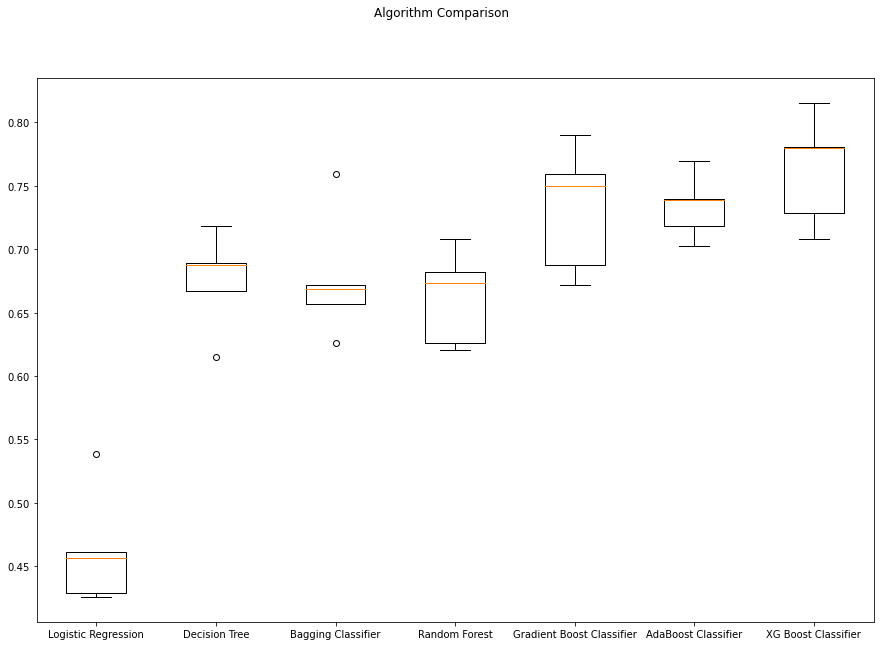

In [101]:
# Plot BoxPlots for all Cross Validation Scores shown above

Fig = plt.figure(figsize=(15, 10)) # Set Plot Size (x,y)

Fig.suptitle("Algorithm Comparison")
ax = Fig.add_subplot(111)

plt.boxplot(Model_Results)
ax.set_xticklabels(Model_Names)

plt.show()

### Observations

- The **XG Boost Classifier** is giving the **highest Cross-Validated Recall score**, closely followed by the **AdaBoost and Gradient Boost Classifiers, which scored almost identically**
- On the BoxPlot, the **XB Boost Classifier** shows a **larger range in CV Results**, ranging from around 0.72 to 0.82
    - The **AdaBoost Classifier**, on the other hand, had a **smaller range of CV Results**, ranging from around 0.71 to 0.78
- The **Logistic Regression** model was included for reference against the various Decision Tree and additional Ensemble Models and **scored substantially lower than all other models**


The **3 Best Models** to be selected and Further Tuned for Improved Performance are:
- The Selected Models had the **best Validation Recall scores (0.776)** out of the above group
- Additionally, these 3 Models (in Descending Order) were selected due to: 
    - XB Boost Classifier: **Best (Mean) CV Score of 0.762** 
    - AdaBoost Classifier: Slightly lower (Mean) CV Score of 0.734 and **smallest range of all CV Scores (no Outliers) and more generalized CV performance**
    - Gradient Booost Classifier: Slightly lower (Mean) CV Score of 0.732, **but with larger range of CV Scores making it less generalized and the 3rd option**
    
Although the **Logistic Regression model scored substantially lower** than the other models built, it is worth recalibrating this model and scoring results once more, after **applyiong OverSampling and UnderSampling** techniques to the model.

## Before Tuning Top Models - Use Over/Under Sampling on Logistic Regression Model

In [106]:
# Create a function to check different Metrics/Scores on Various Classification Models

def Model_Perf_Class_Score(Model, Predictors, Target):
    """
    Function to compute different metrics to check classification model performance

    Model: Classifier
    Predictors: Independent Variables
    Target: Dependent variable
    """

    # predicting using the independent variables
    Pred = Model.predict(Predictors)

    Accuracy = accuracy_score(Target, Pred)  # to compute Accuracy
    Recall = recall_score(Target, Pred)  # to compute Recall
    Precision = precision_score(Target, Pred)  # to compute Precision
    F1 = f1_score(Target, Pred)  # to compute F1-score

    # creating a dataframe of metrics
    DF_Performance = pd.DataFrame(
        {
            "Accuracy": Accuracy,
            "Recall": Recall,
            "Precision": Precision,
            "F1": F1,
        },
        index=[0],
    )

    return DF_Performance

In [113]:
# Create a Confusion Matrix summary for True vs. Predicted Labels: True and False Results

def Make_Confusion_Matrix(Model, Predictors, Target):

    
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_Pred = Model.predict(Predictors)
    cm = confusion_matrix(Target, y_Pred)
    Labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(20,10))
    sns.heatmap(cm, annot=Labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

###  Original Logistic Regression Model

In [114]:
# Build and Fit the Logistic Regression model to Training data

LR = LogisticRegression(random_state=1)
LR.fit(X_train, y_train)

LogisticRegression(random_state=1)

### BoxPlot Summary of Logistic Regression CV Scores (Recall)

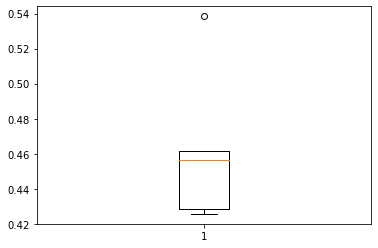

In [115]:
Scoring = "recall" # Set scoring metric to Recall which is primary focus

kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5 and Random State = 1
CV_Results_LR_Orig = cross_val_score(
    estimator=LR, X=X_train, y=y_train, scoring=Scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(CV_Results_LR_Orig)
plt.show()

- Performance on Training data is low but **relatively generalized**, varying between around **0.43 and 0.0.465 on Recall**, exluding an outlier at 0.54

In [116]:
# Calculating Different Scores on Train set

Log_Reg_Orig_Train = Model_Perf_Class_Score(LR, X_train, y_train)

print("Training performance:")
Log_Reg_Orig_Train

Training performance:


Accuracy    Recall  Precision        F1
0  0.887243  0.468238   0.733547  0.571607

In [117]:
# Calculating Different Scores on Validation set

Log_Reg_Orig_Val = Model_Perf_Class_Score(LR, X_val, y_val)

print("Validation performance:")
Log_Reg_Orig_Val

Validation performance:


Accuracy    Recall  Precision        F1
0  0.894373  0.533742   0.737288  0.619217

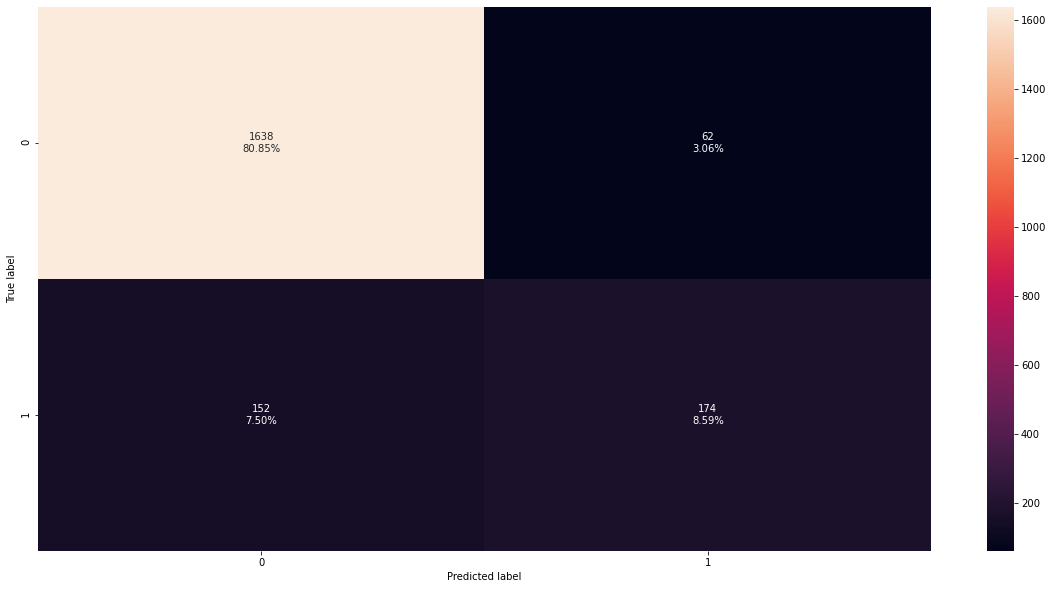

In [118]:
# Run Model results through Confusion Matrix


Make_Confusion_Matrix(LR, X_val, y_val)

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer closed their Credit Card account
- **Model predicted:** Customer will close their Credit Card account
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**8.59%**)

#### True Negatives:
- **Reality:** Customer did not close their Credit Card account
- **Model predicted:** Customer won't close their Credit Card account
- **Outcome:** No additional lost revenue, existing customers still remain active (**80.85%**)

#### False Positives:
- **Reality:** Customer did not close their Credit Card account
- **Model predicted:** Customer will close their Credit Card account
- **Outcome:** The bank allocated resources to these customers who ended up not being at risk of attrition - a slight waste of resource use, however the bank prefers this to lost revenue from missed customers who truly leave (**3.06%**)

#### False Negatives:
- **Reality:** Customer closed their Credit Card account
- **Model predicted:** Customer won't close their Credit Card account
- **Outcome:** The bank loses revenue by not catering to these at-risk customers in time so as to prevent further attrition (**7.50%**)

### Observations

- The Original/Untuned Logistic Regression model scored relatively well in **Accuracy (0.89 & 0.89) and poorly in Recall (0.47 & 0.53)** for both the Training and Validation dataset, showing that it is **relatively well Generalized** but poor Recall performance
- Regarding the **Confusion Matrix** results, the model scored low on **True Positives (8.6%)** and **True Negatives (80.9%)** but quite high on **False Negatives (7.5%)**, which the company wishes to be as close to 0 as possible in order to avoid missing any at-risk customers regarding Attrition

###  OverSampling Logistic Regression Model

In [119]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

Smote_Model = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique - 5 neighbors = default
X_train_over, y_train_over = Smote_Model.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 976
Before UpSampling, counts of label 'No': 5099 

After UpSampling, counts of label 'Yes': 5099
After UpSampling, counts of label 'No': 5099 

After UpSampling, the shape of train_X: (10198, 31)
After UpSampling, the shape of train_y: (10198,) 



In [120]:
# Build and Fit the Oversampled Logistic Regression model to Training data

LR_Over = LogisticRegression(random_state=1)

# Training the basic logistic regression model with training set
LR_Over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

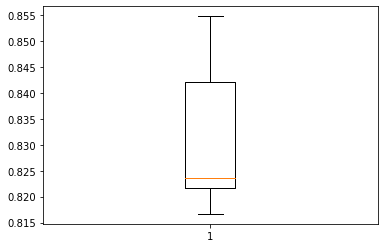

In [121]:
Scoring = "recall" # Set scoring metric to Recall which is primary focus

kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5 and Random State = 1
CV_Results_LR_Over = cross_val_score(
    estimator=LR_Over, X=X_train_over, y=y_train_over, scoring=Scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(CV_Results_LR_Over)
plt.show()

- Performance on Training data is **far better with OverSampled data** and well generalized, with results varying between around **0.818 and 0.0.855 on Recall**

In [122]:
# Calculating Different Scores on Train set

Log_Reg_Over_Train = Model_Perf_Class_Score(LR_Over, X_train_over, y_train_over)

print("Training performance:")
Log_Reg_Over_Train

Training performance:


Accuracy    Recall  Precision        F1
0  0.829869  0.831928   0.828516  0.830218

In [123]:
Log_Reg_Over_Val = Model_Perf_Class_Score(LR_Over, X_val, y_val)

print("Validation performance:")
Log_Reg_Over_Val

Validation performance:


Accuracy    Recall  Precision        F1
0   0.82231  0.809816   0.469751  0.594595

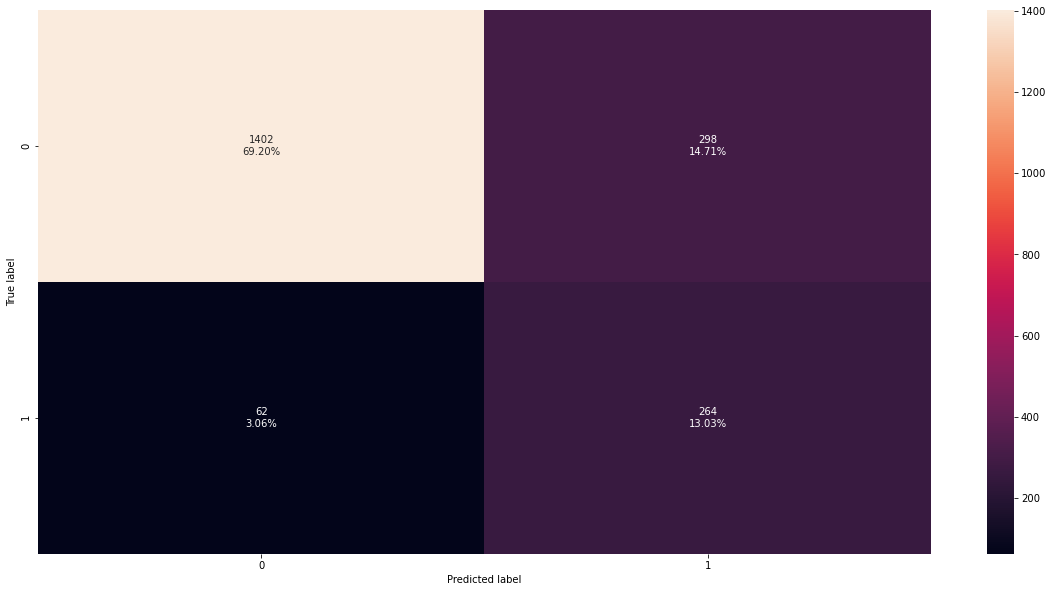

In [124]:
# Run Model results through Confusion Matrix


Make_Confusion_Matrix(LR_Over, X_val, y_val)

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer closed their Credit Card account
- **Model predicted:** Customer will close their Credit Card account
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**13.03%**)

#### True Negatives:
- **Reality:** Customer did not close their Credit Card account
- **Model predicted:** Customer won't close their Credit Card account
- **Outcome:** No additional lost revenue, existing customers still remain active (**69.20%**)

#### False Positives:
- **Reality:** Customer did not close their Credit Card account
- **Model predicted:** Customer will close their Credit Card account
- **Outcome:** The bank allocated resources to these customers who ended up not being at risk of attrition - a slight waste of resource use, however the bank prefers this to lost revenue from missed customers who truly leave (**14.71%**)

#### False Negatives:
- **Reality:** Customer closed their Credit Card account
- **Model predicted:** Customer won't close their Credit Card account
- **Outcome:** The bank loses revenue by not catering to these at-risk customers in time so as to prevent further attrition (**3.06%**)

### Observations

- The UpSampled Logistic Regression model scored well in **Accuracy (0.83 & 0.82) and Recall (0.83 & 0.81)** for both the Training and Validation dataset, showing that it is **relatively well Generalized**
- Regarding the **Confusion Matrix** results, the model scored well on **True Positives (13.0%)** and lower on **True Negatives (69.20%)** and better/lower on **False Negatives (3.0)**, which the company wishes to be as close to 0 as possible in order to avoid missing any at-risk customers regarding Attrition

The Oversampled Logistic Regression model is well Generalized for both Accuracy and Recall - there is therefore **no need to run the model through Regularization (Lasso/Ridge) to reduce underfitting, etc.**

###  UnderSampling Logistic Regression Model

In [125]:
Ran_UndSamp = RandomUnderSampler(random_state=1) # Run the Random Under Sampler with Random State still set to 1
X_train_under, y_train_under = Ran_UndSamp.fit_resample(X_train, y_train) # Create X/y Train Under sets from resampled RUS model

In [126]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_under == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_under == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_under.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_under.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 31)
After Under Sampling, the shape of train_y: (1952,) 



In [127]:
# Build and Fit the Undersampled Logistic Regression model to Training data

LR_Under = LogisticRegression(random_state=1)

# Training the basic logistic regression model with training set
LR_Under.fit(X_train_under, y_train_under)

LogisticRegression(random_state=1)

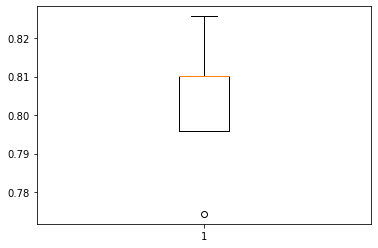

In [128]:
Scoring = "recall" # Set scoring metric to Recall which is primary focus

kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5 and Random State = 1
CV_Results_LR_Under = cross_val_score(
    estimator=LR_Under, X=X_train_under, y=y_train_under, scoring=Scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(CV_Results_LR_Under)
plt.show()

- Performance on Training data is **far better with UnderSampled data** and well generalized, with results varying between around **0.795 and 0.0.83 on Recall**, excluding outliers

In [129]:
# Calculating Different Scores on Train set

Log_Reg_Under_Train = Model_Perf_Class_Score(LR_Under, X_train_under, y_train_under)

print("Training performance:")
Log_Reg_Under_Train

Training performance:


Accuracy  Recall  Precision        F1
0  0.814549  0.8125   0.815844  0.814168

In [130]:
# Calculating Different Scores on Train set

Log_Reg_Under_Val = Model_Perf_Class_Score(LR_Under, X_val, y_val)

print("Training performance:")
Log_Reg_Under_Val

Training performance:


Accuracy    Recall  Precision        F1
0  0.812932  0.822086   0.455008  0.585792

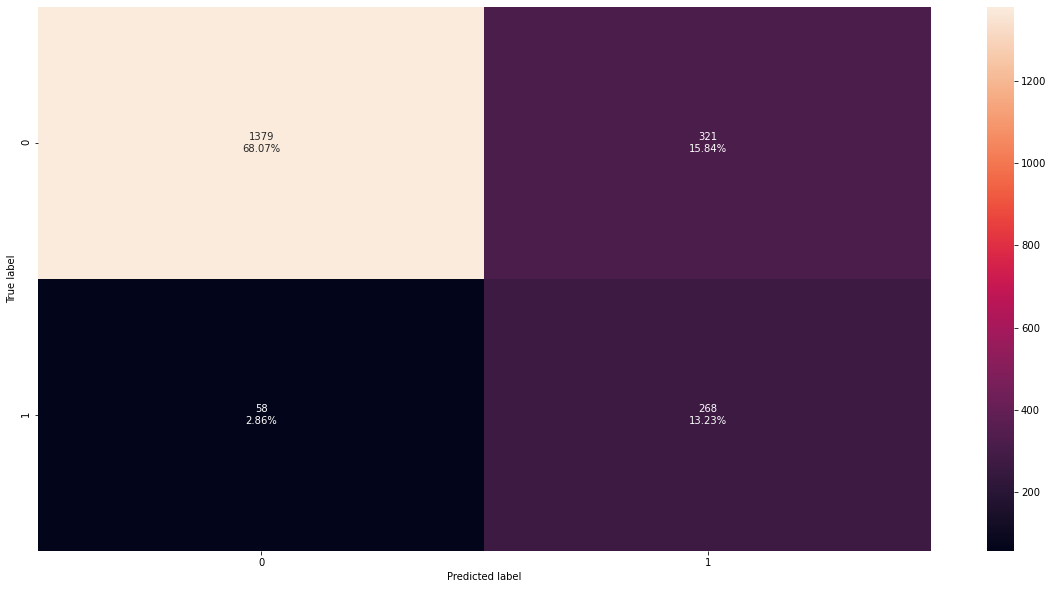

In [131]:
# Run Model results through Confusion Matrix


Make_Confusion_Matrix(LR_Under, X_val, y_val)

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer closed their Credit Card account
- **Model predicted:** Customer will close their Credit Card account
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**13.23%**)

#### True Negatives:
- **Reality:** Customer did not close their Credit Card account
- **Model predicted:** Customer won't close their Credit Card account
- **Outcome:** No additional lost revenue, existing customers still remain active (**68.07%**)

#### False Positives:
- **Reality:** Customer did not close their Credit Card account
- **Model predicted:** Customer will close their Credit Card account
- **Outcome:** The bank allocated resources to these customers who ended up not being at risk of attrition - a slight waste of resource use, however the bank prefers this to lost revenue from missed customers who truly leave (**15.84%**)

#### False Negatives:
- **Reality:** Customer closed their Credit Card account
- **Model predicted:** Customer won't close their Credit Card account
- **Outcome:** The bank loses revenue by not catering to these at-risk customers in time so as to prevent further attrition (**2.86%**)

### Observations

- The UnderSampled Logistic Regression model scored well in **Accuracy (0.81 & 0.81) and Recall (0.81 & 0.82)** for both the Training and Validation dataset, showing that it is **relatively well Generalized**
- Regarding the **Confusion Matrix** results, the model scored well on **True Positives (13.2%)** and lower on **True Negatives (68.07%)** and better/lower on **False Negatives (2.86)**, which the company wishes to be as close to 0 as possible in order to avoid missing any at-risk customers regarding Attrition

## HyperParameter Tuning 3 Best Models - Randomized Grid Search

##### Goal = Recall > 0.95, Accuracy/Precision > 0.70

### Gradient Boost Classifier

#### Original (UnTuned Model Scores)

In [132]:
# Refit the untuned Gradient Boost Classifier on Train set

Grad_Boost_Orig = GradientBoostingClassifier(random_state=1)

Grad_Boost_Orig.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [133]:
# Calculating Different Scores on Validation set

Grad_Boost_Train = Model_Perf_Class_Score(Grad_Boost_Orig, X_train, y_train)

print("Validation performance:")
Grad_Boost_Train

Validation performance:


Accuracy    Recall  Precision        F1
0  0.949465  0.776639   0.894923  0.831596

In [134]:
# Calculating Different Scores on Validation set

Grad_Boost_Val = Model_Perf_Class_Score(Grad_Boost_Orig, X_val, y_val)

print("Validation performance:")
Grad_Boost_Val

Validation performance:


Accuracy    Recall  Precision        F1
0  0.946693  0.776074   0.878472  0.824104

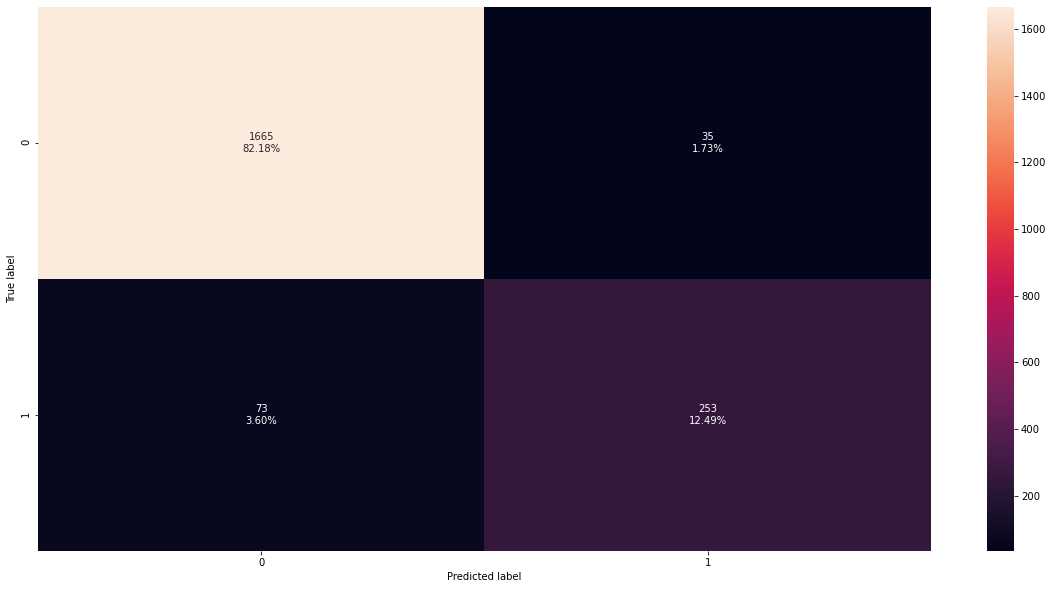

In [135]:
# Run Model results through Confusion Matrix


Make_Confusion_Matrix(Grad_Boost_Orig, X_val, y_val)

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer closed their Credit Card account
- **Model predicted:** Customer will close their Credit Card account
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**12.49%**)

#### True Negatives:
- **Reality:** Customer did not close their Credit Card account
- **Model predicted:** Customer won't close their Credit Card account
- **Outcome:** No additional lost revenue, existing customers still remain active (**82.18%**)

#### False Positives:
- **Reality:** Customer did not close their Credit Card account
- **Model predicted:** Customer will close their Credit Card account
- **Outcome:** The bank allocated resources to these customers who ended up not being at risk of attrition - a slight waste of resource use, however the bank prefers this to lost revenue from missed customers who truly leave (**1.73%**)

#### False Negatives:
- **Reality:** Customer closed their Credit Card account
- **Model predicted:** Customer won't close their Credit Card account
- **Outcome:** The bank loses revenue by not catering to these at-risk customers in time so as to prevent further attrition (**3.60%**)

### Observations

- The (Original) Gradient Boost Classifier scored very in **Accuracy (0.95 & 0.95) and Decent of Recall (0.78 & 0.78)** for both the Training and Validation dataset, showing that it is **relatively well Generalized**
- Regarding the **Confusion Matrix** results, the model scored well on **True Positives (12.5%)** and **True Negatives (82.2%)** and quite low on **False Negatives (3.6%)**, which the company wishes to be as close to 0 as possible in order to avoid missing any at-risk customers regarding Attrition

#### HyperTuned Model Scores

In [136]:
%%time 

# (Calculate total time to run)

# Define Model to Run

Grad_Boost_Estimator = GradientBoostingClassifier(random_state=1)

# Define Grid Parameters for Gradient Boost Classifier
Grid_Params1 = {"n_estimators": [100,200,20], # Number of trees to run, ranging from 100 to 200, increments of 20
                "subsample":[0.7,0.8,0.9,1], # Fraction of samples to use, ranging from 70% to 100%
                "max_features":[0.7,0.8,0.9,1], # Percentage of features to use, ranging from 70% to 100%
                "max_depth":[3,5,7,10] # Max depth of trees, ranging from 3 to 10
                }

# Set Scorer (Recall) to Compare Parameter Combos selected Above
Scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV: 50 iterations and 5 Cross Validations (50 total scores), keeping Random State at 1
Randomized_CV = RandomizedSearchCV(estimator=Grad_Boost_Estimator, param_distributions=Grid_Params1, n_jobs = -1, 
                                   n_iter=50, scoring=Scorer, cv=5, random_state=1)

# Fit RandomizedSearchCV into Training Data
Randomized_CV.fit(X_train,y_train)

# Identify Best Parameters to use for Model/s, and Best Scores calculated
print("Best parameters {} with CV score={}:" .format(Randomized_CV.best_params_,Randomized_CV.best_score_))

Best parameters {'subsample': 0.8, 'n_estimators': 200, 'max_features': 0.7, 'max_depth': 5} with CV score=0.7612925170068027:
Wall time: 5min 13s


#### Input Best HyperParameters into Model

In [137]:
# Build the Model with the Best Parameters from above and Fit to the training Data

GradBoost_Tuned = GradientBoostingClassifier(
    n_estimators=200,
    subsample=0.8,
    max_features=0.7,
    random_state=1,
)

# Fit the model on training data
GradBoost_Tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.7, n_estimators=200, random_state=1,
                           subsample=0.8)

In [138]:
# Calculating Different Scores on Train set

Grad_Boost_RandSearch_Train = Model_Perf_Class_Score(GradBoost_Tuned, X_train, y_train)

print("Training performance:")
Grad_Boost_RandSearch_Train

Training performance:


Accuracy    Recall  Precision       F1
0  0.962469  0.831967   0.926941  0.87689

In [139]:
# Calculating Different Scores on Validation set

Grad_Boost_RandSearch_Val = Model_Perf_Class_Score(GradBoost_Tuned, X_val, y_val)

print("Validation performance:")
Grad_Boost_RandSearch_Val

Validation performance:


Accuracy    Recall  Precision        F1
0   0.94768  0.791411   0.871622  0.829582

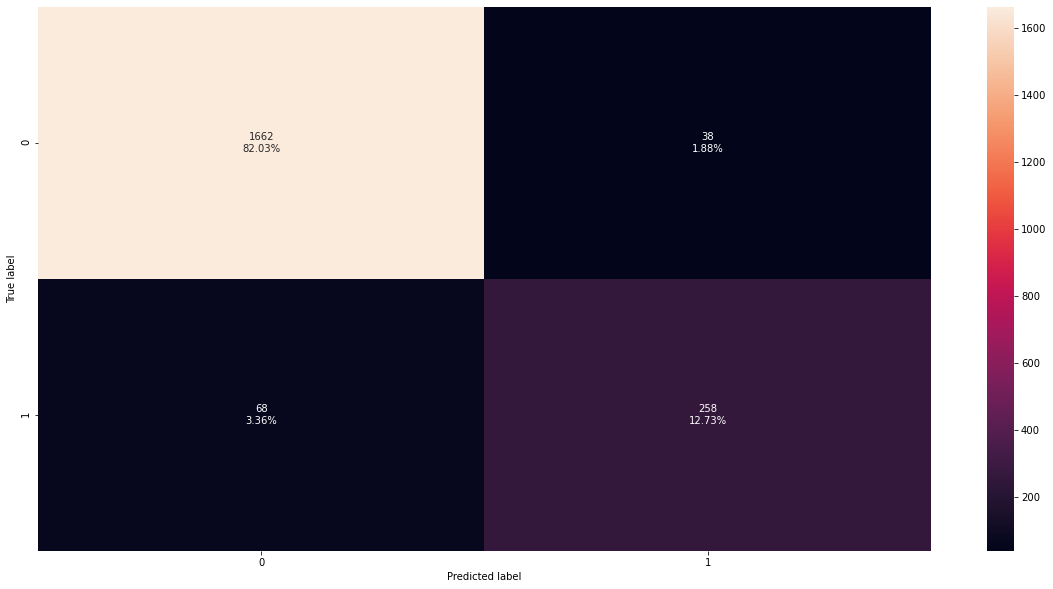

In [140]:
# Run Model results through Confusion Matrix


Make_Confusion_Matrix(GradBoost_Tuned, X_val, y_val)

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer closed their Credit Card account
- **Model predicted:** Customer will close their Credit Card account
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**12.73%**)

#### True Negatives:
- **Reality:** Customer did not close their Credit Card account
- **Model predicted:** Customer won't close their Credit Card account
- **Outcome:** No additional lost revenue, existing customers still remain active (**82.03%**)

#### False Positives:
- **Reality:** Customer did not close their Credit Card account
- **Model predicted:** Customer will close their Credit Card account
- **Outcome:** The bank allocated resources to these customers who ended up not being at risk of attrition - a slight waste of resource use, however the bank prefers this to lost revenue from missed customers who truly leave (**1.88%**)

#### False Negatives:
- **Reality:** Customer closed their Credit Card account
- **Model predicted:** Customer won't close their Credit Card account
- **Outcome:** The bank loses revenue by not catering to these at-risk customers in time so as to prevent further attrition (**3.36%**)

### Observations

- The (RandomSearch CV) Tuned Gradient Boost Classifier scored very in **Accuracy (0.96 & 0.95) and Recall (0.83 & 0.79)** for both the Training and Validation dataset, showing that it is **relatively well Generalized**
    - This is a substantial improvement on the Training Data Recall score of 0.776
- Regarding the **Confusion Matrix** results, the model scored well on **True Positives (12.7%)** and **True Negatives (82.0%)** and quite low on **False Negatives (3.4%)**, which the company wishes to be as close to 0 as possible in order to avoid missing any at-risk customers regarding Attrition

### Adaptive Boost Classifier

In [141]:
# Refit the untuned Gradient Boost Classifier on Train set

AdaBoost_Orig = AdaBoostClassifier(random_state=1)

AdaBoost_Orig.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [142]:
# Calculating Different Scores on Validation set

AdaBoost_Train = Model_Perf_Class_Score(AdaBoost_Orig, X_train, y_train)

print("Validation performance:")
AdaBoost_Train

Validation performance:


Accuracy    Recall  Precision        F1
0  0.938601  0.766393   0.837626  0.800428

In [143]:
# Calculating Different Scores on Validation set

AdaBoost_Val = Model_Perf_Class_Score(AdaBoost_Orig, X_val, y_val)

print("Validation performance:")
AdaBoost_Val

Validation performance:


Accuracy    Recall  Precision        F1
0  0.937315  0.776074   0.824104  0.799368

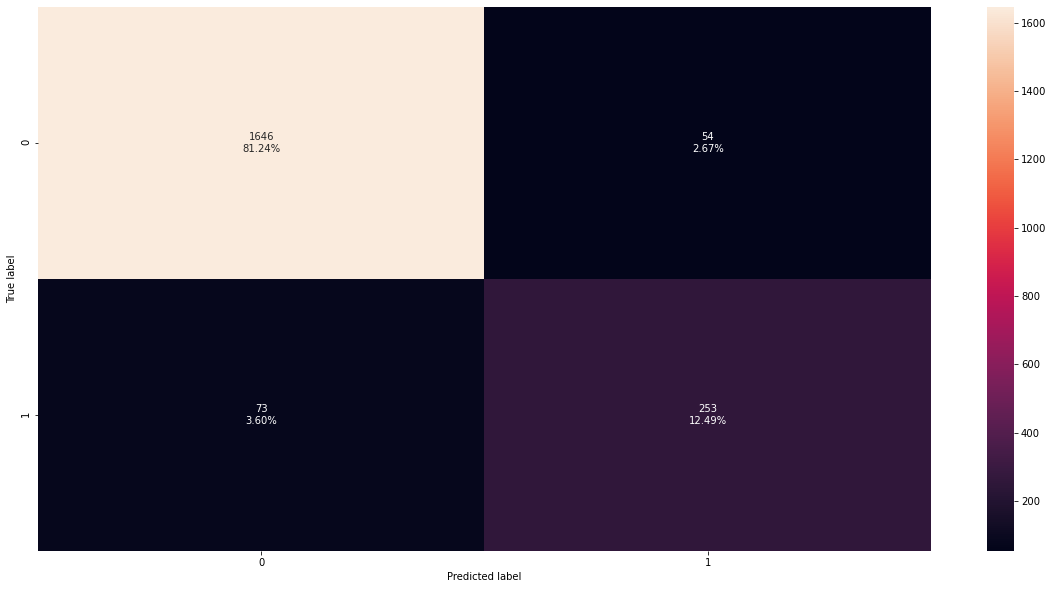

In [728]:
# Run Model results through Confusion Matrix


Make_Confusion_Matrix(AdaBoost_Orig, X_val, y_val)

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer closed their Credit Card account
- **Model predicted:** Customer will close their Credit Card account
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**12.49%**)

#### True Negatives:
- **Reality:** Customer did not close their Credit Card account
- **Model predicted:** Customer won't close their Credit Card account
- **Outcome:** No additional lost revenue, existing customers still remain active (**81.24%**)

#### False Positives:
- **Reality:** Customer did not close their Credit Card account
- **Model predicted:** Customer will close their Credit Card account
- **Outcome:** The bank allocated resources to these customers who ended up not being at risk of attrition - a slight waste of resource use, however the bank prefers this to lost revenue from missed customers who truly leave (**2.67%**)

#### False Negatives:
- **Reality:** Customer closed their Credit Card account
- **Model predicted:** Customer won't close their Credit Card account
- **Outcome:** The bank loses revenue by not catering to these at-risk customers in time so as to prevent further attrition (**3.60%**)

### Observations

- The (Original) Adaptive Boost Classifier scored very in **Accuracy (0.94 & 0.94) and Decent of Recall (0.77 & 0.78)** for both the Training and Validation dataset, showing that it is **relatively well Generalized**
- Regarding the **Confusion Matrix** results, the model scored well on **True Positives (12.5%)** and **True Negatives (81.2%)** and quite low on **False Negatives (3.6%)**, which the company wishes to be as close to 0 as possible in order to avoid missing any at-risk customers regarding Attrition

#### HyperTuned Model Scores

In [145]:
%%time 

# (Calculate total time to run)

# Define Model to Run
AdaBoost_Estimator = AdaBoostClassifier(random_state=1)

# Define the Parameters to pass through Randomized GridSearchCV

Grid_Params2 = {
    "n_estimators": np.arange(10, 110, 10), # Number of trees ranging from 10 to 110 in increments of 10
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1], # Slow the learning rate from .01x through to 1x
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1), # Based Estimators are Decision Trees ranging from 1-3 levels deep
    ],
}

# Set Scorer (Recall) to Compare Parameter Combos selected Above
Scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV: 50 iterations and 5 Cross Validations (50 total scores), keeping Random State at 1
Randomized_CV = RandomizedSearchCV(estimator=AdaBoost_Estimator, param_distributions=Grid_Params2, n_jobs = -1, n_iter=50, scoring=Scorer, cv=5, random_state=1)

# Fit RandomizedSearchCV into Training Data
Randomized_CV.fit(X_train,y_train)

# Identify Best Parameters to use for Model/s, and Best Scores calculated
print("Best parameters {} with CV score={}:" .format(Randomized_CV.best_params_,Randomized_CV.best_score_))

Best parameters {'n_estimators': 50, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.7469440083725798:
Wall time: 1min 46s


#### Input Best HyperParameters into Model 

In [146]:
# Build the Model with the Best Parameters from above and Fit to the training Data

AdaBoost_Tuned = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)

# Fit the model on training data
AdaBoost_Tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=1, random_state=1)

In [147]:
# Calculating Different Scores on Train set

Ada_Boost_RandSearch_Train = Model_Perf_Class_Score(
    AdaBoost_Tuned, X_train, y_train)

print("Training performance:")
Ada_Boost_RandSearch_Train

Training performance:


Accuracy    Recall  Precision        F1
0  0.938601  0.766393   0.837626  0.800428

In [148]:
# Calculating Different Scores on Validation set

Ada_Boost_RandSearch_Val = Model_Perf_Class_Score(GradBoost_Tuned, X_val, y_val)

print("Validation performance:")
Ada_Boost_RandSearch_Val

Validation performance:


Accuracy    Recall  Precision        F1
0   0.94768  0.791411   0.871622  0.829582

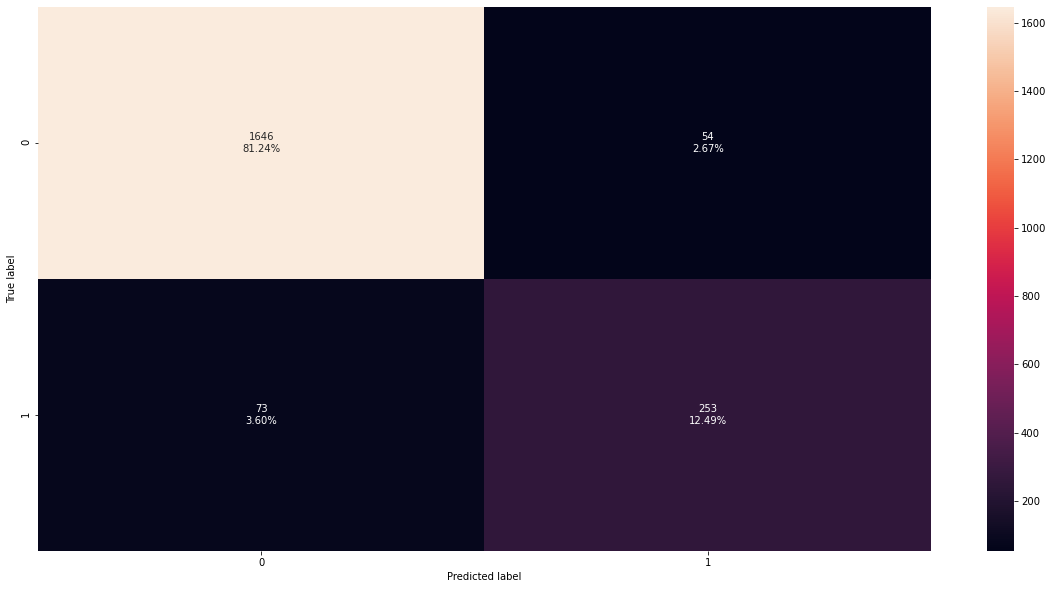

In [729]:
# Run Model results through Confusion Matrix


Make_Confusion_Matrix(AdaBoost_Tuned, X_val, y_val)

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer closed their Credit Card account
- **Model predicted:** Customer will close their Credit Card account
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**12.49%**)

#### True Negatives:
- **Reality:** Customer did not close their Credit Card account
- **Model predicted:** Customer won't close their Credit Card account
- **Outcome:** No additional lost revenue, existing customers still remain active (**81.24%**)

#### False Positives:
- **Reality:** Customer did not close their Credit Card account
- **Model predicted:** Customer will close their Credit Card account
- **Outcome:** The bank allocated resources to these customers who ended up not being at risk of attrition - a slight waste of resource use, however the bank prefers this to lost revenue from missed customers who truly leave (**2.67%**)

#### False Negatives:
- **Reality:** Customer closed their Credit Card account
- **Model predicted:** Customer won't close their Credit Card account
- **Outcome:** The bank loses revenue by not catering to these at-risk customers in time so as to prevent further attrition (**3.60%**)

### Observations

- The (RandomSearch CV) Tuned Adaptive Boost Classifier scored very well in **Accuracy (0.94 & 0.95) and decent in Recall (0.77 & 0.79)** for both the Training and Validation dataset, showing that it is **well Generalized**
    - This is a substantial improvement on the Training Data Recall score of 0.776
- Regarding the **Confusion Matrix** results, the model scored well on **True Positives (12.5%)** and **True Negatives (81.2%)** and quite low on **False Negatives (3.6%)**, which the company wishes to be as close to 0 as possible in order to avoid missing any at-risk customers regarding Attrition

### XG Boost Classifier

#### Original (UnTuned Model Scores)

In [150]:
# Refit the untuned XG Boost Classifier on Train set

XGBoost_Orig = XGBClassifier(random_state=1, eval_metric="logloss") # Log Loss Eval Metric used to remove warnings/errors
XGBoost_Orig.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [151]:
# Calculating Different Scores on Validation set

XGBoost_Train = Model_Perf_Class_Score(XGBoost_Orig, X_train, y_train)

print("Validation performance:")
XGBoost_Train

Validation performance:


Accuracy    Recall  Precision        F1
0  0.999671  0.998975   0.998975  0.998975

In [152]:
# Calculating Different Scores on Validation set

XGBoost_Val = Model_Perf_Class_Score(XGBoost_Orig, X_val, y_val)

print("Validation performance:")
XGBoost_Val

Validation performance:


Accuracy    Recall  Precision        F1
0  0.944225  0.776074   0.863481  0.817447

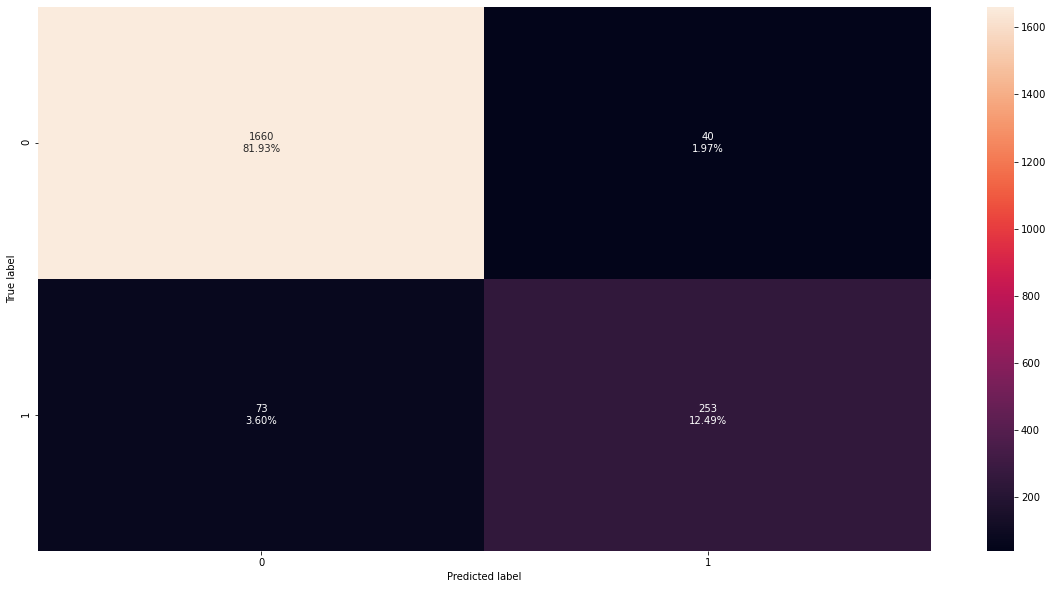

In [153]:
# Run Model results through Confusion Matrix


Make_Confusion_Matrix(XGBoost_Orig, X_val, y_val)

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer closed their Credit Card account
- **Model predicted:** Customer will close their Credit Card account
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**12.49%**)

#### True Negatives:
- **Reality:** Customer did not close their Credit Card account
- **Model predicted:** Customer won't close their Credit Card account
- **Outcome:** No additional lost revenue, existing customers still remain active (**81.93%**)

#### False Positives:
- **Reality:** Customer did not close their Credit Card account
- **Model predicted:** Customer will close their Credit Card account
- **Outcome:** The bank allocated resources to these customers who ended up not being at risk of attrition - a slight waste of resource use, however the bank prefers this to lost revenue from missed customers who truly leave (**1.97%**)

#### False Negatives:
- **Reality:** Customer closed their Credit Card account
- **Model predicted:** Customer won't close their Credit Card account
- **Outcome:** The bank loses revenue by not catering to these at-risk customers in time so as to prevent further attrition (**3.60%**)

### Observations

- The (RandomSearch CV) Tuned Adaptive Boost Classifier scored very well in **Accuracy (1.0 & 0.94) but  in Recall (1.0 & 0.78)** for both the Training and Validation dataset, showing that it is **Overfit and not Generalized**
- Regarding the **Confusion Matrix** results, the model scored well on **True Positives (12.5%)** and **True Negatives (81.9%)** and quite low on **False Negatives (3.6%)**, which the company wishes to be as close to 0 as possible in order to avoid missing any at-risk customers regarding Attrition

#### HyperTuned Model Scores

In [362]:
%%time

# Define the Model
XGBoost_Estimator = XGBClassifier(random_state=1,eval_metric='logloss') # Set eval_metric to LogLoss to remove eval_error

# Parameter grid to pass in RandomizedSearchCV
Grid_Params3={'n_estimators':np.arange(50,150,10), # Number of trees to run, ranging from 50 to 150, increments of 10
            'scale_pos_weight':[2,5,10], # This is the ratio of # Negative Class to Positive Class (84/16 = 5.25), try 2-5
            'learning_rate':[0.01,0.1,0.2,0.05], # Learning rate slows down tree building process
            'gamma':[0,1,3,5], # Include Gamma amounts to limit tree growth if minimum loss reduction below Gamma amount
            'subsample':[0.8,0.9,1], # Fraction of samples to use, ranging from 80% to 100%
            'max_depth':np.arange(1,5,1), # May Tree Depths, ranging from 1 to 5
            'reg_lambda':[5,10]} # Applies regularization weighting amounts to avoid overfitting data

# Set Scorer (Recall) to Compare Parameter Combos selected Above
Scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV: 50 iterations and 5 Cross Validations (50 total scores), keeping Random State at 1
Randomized_CV = RandomizedSearchCV(estimator=XGBoost_Estimator, param_distributions=Grid_Params3, n_jobs = -1, n_iter=50, scoring=Scorer, cv=5, random_state=1)

# Fit RandomizedSearchCV into Training Data
Randomized_CV.fit(X_train,y_train)

# Identify Best Parameters to use for Model/s, and Best Scores calculated
print("Best parameters {} with CV score={}:" .format(Randomized_CV.best_params_,Randomized_CV.best_score_))

Best parameters {'subsample': 0.9, 'scale_pos_weight': 10, 'reg_lambda': 5, 'n_estimators': 140, 'max_depth': 1, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9436473050758766:
Wall time: 1min 9s


#### Input Best HyperParameters into Model

In [1472]:
# Build the Model trying different parameters to hit above Goal and Fit to the training Data

XGBoost_Tuned = XGBClassifier(
    random_state=1,
    n_estimators=200,
    scale_pos_weight=8,
    gamma=1,
    subsample=0.6,
    learning_rate=0.05,
    eval_metric="logloss",
    max_depth=5,
    reg_lambda=1,
)

# Fit the model on training data
XGBoost_Tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=2,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=8, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [1478]:
# Calculating Different Scores on Train set

XG_Boost_RandSearch_Train = Model_Perf_Class_Score(
    XGBoost_Tuned, X_train, y_train)

print("Training performance:")
XG_Boost_RandSearch_Train

Training performance:


Accuracy    Recall  Precision        F1
0  0.954074  0.989754   0.782186  0.873813

In [1477]:
# Calculating Different Scores on Validation set

XG_Boost_RandSearch_Val = Model_Perf_Class_Score(XGBoost_Tuned, X_val, y_val)

print("Validation performance:")
XG_Boost_RandSearch_Val

Validation performance:


Accuracy   Recall  Precision        F1
0   0.92843  0.90184   0.722359  0.802183

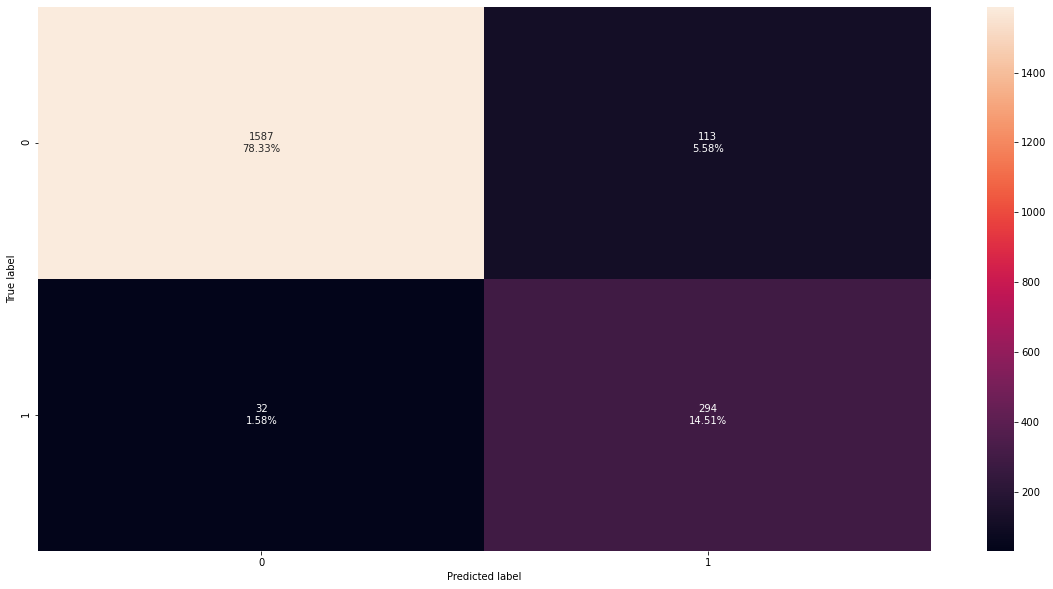

In [1476]:
# Run Model results through Confusion Matrix


Make_Confusion_Matrix(XGBoost_Tuned, X_val, y_val)

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer closed their Credit Card account
- **Model predicted:** Customer will close their Credit Card account
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**14.51%**)

#### True Negatives:
- **Reality:** Customer did not close their Credit Card account
- **Model predicted:** Customer won't close their Credit Card account
- **Outcome:** No additional lost revenue, existing customers still remain active (**78.33%**)

#### False Positives:
- **Reality:** Customer did not close their Credit Card account
- **Model predicted:** Customer will close their Credit Card account
- **Outcome:** The bank allocated resources to these customers who ended up not being at risk of attrition - a slight waste of resource use, however the bank prefers this to lost revenue from missed customers who truly leave (**5.58%**)

#### False Negatives:
- **Reality:** Customer closed their Credit Card account
- **Model predicted:** Customer won't close their Credit Card account
- **Outcome:** The bank loses revenue by not catering to these at-risk customers in time so as to prevent further attrition (**1.58%**)

### Observations

- The (RandomSearch CV) Tuned XG Boost Classifier scored very well in **Accuracy (0.95 & 0.93) and Recall (0.95 & 0.89)** for both the Training and Validation dataset, showing that it is **relatively well Generalized**
    - This is a substantial improvement on the Training Data Recall score of 0.776
- Regarding the **Confusion Matrix** results, the model scored well on **True Positives (14.3%)** and a lot lower on **True Negatives (78.8%)** and substantially lower on **False Negatives (1.8%)**, which the company wishes to be as close to 0 as possible in order to avoid missing any at-risk customers regarding Attrition

## OverSampled Data: Fitting 3 Best Models

To save time and show a more easily comparable sample - we will **Rerun the Initial Model Build query but with Oversampled Training Data**.

In [1479]:
# Create various Classification Models and Print the Recall Results and Performance of the Validation Sets

Models = []  # Create Empty list for all Models

# All Models will be Appended to the Empty List above, using the Classifier Libraries/Functions called below

Models.append(("Logistic Regression", LogisticRegression(random_state=1)))
Models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
Models.append(("Bagging Classifier", BaggingClassifier(random_state=1)))
Models.append(("Random Forest", RandomForestClassifier(random_state=1)))
Models.append(("Gradient Boost Classifier", GradientBoostingClassifier(random_state=1)))
Models.append(("AdaBoost Classifier", AdaBoostClassifier(random_state=1)))


# Run XG Boost as additional (possible) performance model - especially after Tuning
Models.append(("XG Boost Classifier", XGBClassifier(random_state=1, eval_metric="logloss")))


Model_Results = []  # Empty list to Store all Model Cross Validation Scores
Model_Names = []  # Empty list to Store all Model Names from above


# loop through all Models above, calculating the Mean CV Score

print("\n" "Cross-Validation Performance:" "\n")

for Name, Model in Models:
    Scoring = "recall"
    K_Fold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1) # Folds set to 5 as default, Random State will be kept at 1 throughout


    CV_Result = cross_val_score(
        estimator=Model, X=X_train_over, y=y_train_over, scoring=Scoring, cv=K_Fold) # Create and Score the Recall for each Model above
    
    Model_Results.append(CV_Result)
    Model_Names.append(Name)
    print("{}: {}".format(Name, CV_Result.mean() * 100)) # Summarize by Model and Mean Cross Validation scores

print("\n" "Validation Performance:" "\n")

for Name, Model in Models:
    Model.fit(X_train_over, y_train_over) # Fit the x_train_over data first then test on predicted Validation data
    Scores = recall_score(y_val, Model.predict(X_val))
    print("{}: {}".format(Name, Scores))


Cross-Validation Performance:

Logistic Regression: 83.17362273663144
Decision Tree: 92.90074852315804
Bagging Classifier: 94.35209451788566
Random Forest: 96.50926513883276
Gradient Boost Classifier: 95.05803459754854
AdaBoost Classifier: 94.48931093536531
XG Boost Classifier: 96.50922665435162

Validation Performance:

Logistic Regression: 0.8098159509202454
Decision Tree: 0.7484662576687117
Bagging Classifier: 0.7730061349693251
Random Forest: 0.7883435582822086
Gradient Boost Classifier: 0.8251533742331288
AdaBoost Classifier: 0.8098159509202454
XG Boost Classifier: 0.8067484662576687


The results of the **Original (Untuned) models being run through using OverSampled Training data** are better than the Original results on regular Training data - particularly for Logistric Regression, as already seen above.

#### Re-Input Best HyperParameters into Model but Fit to OverSampled Training Data

#### Gradient Boost Classifier

In [693]:
# Build the Model with the Best Parameters from above and Fit to the training Data

GradBoost_Tuned_Over = GradientBoostingClassifier(
    n_estimators=200,
    subsample=0.8,
    max_features=0.7,
    random_state=1,
)

# Fit the model on training data
GradBoost_Tuned_Over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(max_features=0.7, n_estimators=200, random_state=1,
                           subsample=0.8)

In [694]:
# Calculating Different Scores on Train set

Grad_Boost_RandSearch_Train_Over = Model_Perf_Class_Score(
    GradBoost_Tuned_Over, X_train_over, y_train_over)

print("Training performance:")
Grad_Boost_RandSearch_Train_Over

Training performance:


Accuracy    Recall  Precision        F1
0  0.971955  0.969014   0.974748  0.971873

In [695]:
# Calculating Different Scores on Validation set

Grad_Boost_RandSearch_Val_Over = Model_Perf_Class_Score(GradBoost_Tuned_Over, X_val, y_val)

print("Validation performance:")
Grad_Boost_RandSearch_Val_Over

Validation performance:


Accuracy    Recall  Precision        F1
0  0.942251  0.831288   0.813814  0.822458

#### Adaptive Boost Classifier

In [696]:
# Build the Model with the Best Parameters from above and Fit to the training Data

AdaBoost_Tuned_Over = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)

# Fit the model on training data
AdaBoost_Tuned_Over.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=1, random_state=1)

In [697]:
# Calculating Different Scores on Train set

AdaBoost_RandSearch_Train_Over = Model_Perf_Class_Score(
    AdaBoost_Tuned_Over, X_train_over, y_train_over)

print("Training performance:")
AdaBoost_RandSearch_Train_Over

Training performance:


Accuracy    Recall  Precision        F1
0  0.946068  0.950186   0.942424  0.946289

In [698]:
# Calculating Different Scores on Validation set

AdaBoost_RandSearch_Val_Over = Model_Perf_Class_Score(AdaBoost_Tuned_Over, X_val, y_val)

print("Validation performance:")
AdaBoost_RandSearch_Val_Over

Validation performance:


Accuracy    Recall  Precision        F1
0  0.922014  0.809816   0.733333  0.769679

#### XG Boost Classifier

In [699]:
%%time

# Bring in Earlier Best Parameters and Scores For Randomized CV Search, now Fitted to OverSampled Data

# Define the Model
XGBoost_Estimator = XGBClassifier(random_state=1,eval_metric='logloss') # Set eval_metric to LogLoss to remove eval_error

# Parameter grid to pass in RandomizedSearchCV
Grid_Params3={'n_estimators':np.arange(50,150,50), # Number of trees to run, ranging from 50 to 150, increments of 50
            'scale_pos_weight':[2,3,5,7,10], # This is the ratio of # Negative Class to Positive Class (84/16 = 5.25), try 2-5
            'learning_rate':[0.01,0.1,0.2,0.05], # Learning rate slows down tree building process
            'gamma':[0,1,3,5,7], # Include Gamma amounts to limit tree growth if minimum loss reduction below Gamma amount
            'subsample':[0.7,0.8,0.9,1], # Fraction of samples to use, ranging from 70% to 100%
            'max_depth':np.arange(1,5,1), # May Tree Depths, ranging from 1 to 5
            'reg_lambda':[3,5,10]} # Applies regularization weighting amounts to avoid overfitting data

# Set Scorer (Recall) to Compare Parameter Combos selected Above
Scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV: 50 iterations and 5 Cross Validations (50 total scores), keeping Random State at 1
Randomized_CV = RandomizedSearchCV(estimator=XGBoost_Estimator, param_distributions=Grid_Params3, n_jobs = -1, n_iter=50, scoring=Scorer, cv=5, random_state=1)

# Fit RandomizedSearchCV into Training Data
Randomized_CV.fit(X_train_over,y_train_over)

# Identify Best Parameters to use for Model/s, and Best Scores calculated
print("Best parameters {} with CV score={}:" .format(Randomized_CV.best_params_,Randomized_CV.best_score_))

Best parameters {'subsample': 0.9, 'scale_pos_weight': 10, 'reg_lambda': 5, 'n_estimators': 50, 'max_depth': 1, 'learning_rate': 0.05, 'gamma': 0} with CV score=0.9974507879697512:
Wall time: 1min 46s


In [1489]:
# Build the Model trying different parameters to hit above Goal and Fit to the training Data

XGBoost_Tuned_Over = XGBClassifier(
    random_state=1,
    n_estimators=125,
    scale_pos_weight=2,
    gamma=10,
    subsample=1,
    learning_rate=0.5,
    eval_metric="logloss",
    max_depth=2,
    reg_lambda=10,
)

# Fit the model on training data
XGBoost_Tuned_Over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=10, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=125, n_jobs=2,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=10,
              scale_pos_weight=2, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [1490]:
# Calculating Different Scores on Train set

XG_Boost_RandSearch_Train_Over = Model_Perf_Class_Score(
    XGBoost_Tuned_Over, X_train_over, y_train_over)

print("Training performance:")
XG_Boost_RandSearch_Train_Over

Training performance:


Accuracy    Recall  Precision        F1
0  0.947245  0.972348   0.925864  0.948536

In [1491]:
# Calculating Different Scores on Validation set

XG_Boost_RandSearch_Val_Over = Model_Perf_Class_Score(XGBoost_Tuned_Over, X_val, y_val)

print("Validation performance:")
XG_Boost_RandSearch_Val_Over

Validation performance:


Accuracy    Recall  Precision        F1
0  0.919546  0.871166   0.701235  0.777018

### Best OverSampled Model

#### Confusion Matrix & Commentary

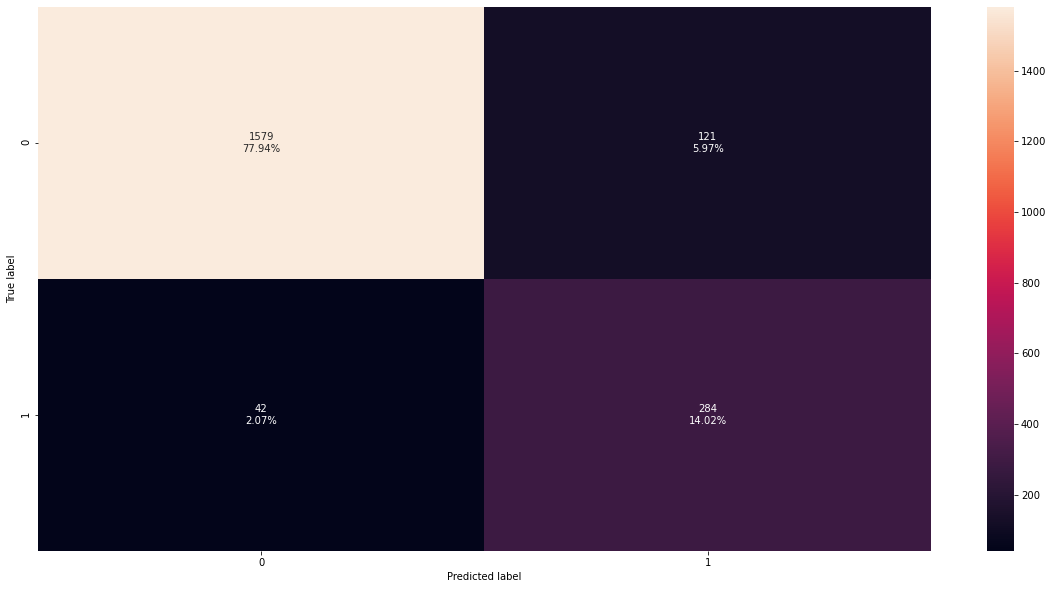

In [1492]:
# Run Model results through Confusion Matrix


Make_Confusion_Matrix(XGBoost_Tuned_Over, X_val, y_val)

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer closed their Credit Card account
- **Model predicted:** Customer will close their Credit Card account
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**14.02%**)

#### True Negatives:
- **Reality:** Customer did not close their Credit Card account
- **Model predicted:** Customer won't close their Credit Card account
- **Outcome:** No additional lost revenue, existing customers still remain active (**77.94%**)

#### False Positives:
- **Reality:** Customer did not close their Credit Card account
- **Model predicted:** Customer will close their Credit Card account
- **Outcome:** The bank allocated resources to these customers who ended up not being at risk of attrition - a slight waste of resource use, however the bank prefers this to lost revenue from missed customers who truly leave (**5.97%**)

#### False Negatives:
- **Reality:** Customer closed their Credit Card account
- **Model predicted:** Customer won't close their Credit Card account
- **Outcome:** The bank loses revenue by not catering to these at-risk customers in time so as to prevent further attrition (**2.07%**)

### Observations

- The (OverSampled) Tuned XG Boost scored very well in **Accuracy (0.95 & 0.92) and Decent in Recall (0.97 & 0.87)** for both the Training and Validation dataset, showing that it is **relatively well Generalized**
    - This is a substantial improvement on the Training Data Recall score of 0.776
- Regarding the **Confusion Matrix** results, the model scored well on **True Positives (14.0%)** and a lot lower on **True Negatives (77.9%)** and substantially lower on **False Negatives (2.1%)**, which the company wishes to be as close to 0 as possible in order to avoid missing any at-risk customers regarding Attrition

## UnderSampled Data: Fitting 3 Best Models

Similarly to the Oversampled results, let's **Rerun the Initial Model Build query but with UnderSampled Training Data**

In [703]:
# Create various Classification Models and Print the Recall Results and Performance of the Validation Sets

Models = []  # Create Empty list for all Models

# All Models will be Appended to the Empty List above, using the Classifier Libraries/Functions called below

Models.append(("Logistic Regression", LogisticRegression(random_state=1)))
Models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
Models.append(("Bagging Classifier", BaggingClassifier(random_state=1)))
Models.append(("Random Forest", RandomForestClassifier(random_state=1)))
Models.append(("Gradient Boost Classifier", GradientBoostingClassifier(random_state=1)))
Models.append(("AdaBoost Classifier", AdaBoostClassifier(random_state=1)))


# Run XG Boost as additional (possible) performance model - especially after Tuning
Models.append(("XG Boost Classifier", XGBClassifier(random_state=1, eval_metric="logloss")))


Model_Results = []  # Empty list to Store all Model Cross Validation Scores
Model_Names = []  # Empty list to Store all Model Names from above


# loop through all Models above, calculating the Mean CV Score

print("\n" "Cross-Validation Performance:" "\n")

for Name, Model in Models:
    Scoring = "recall"
    K_Fold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1) # Folds set to 5 as default, Random State will be kept at 1 throughout


    CV_Result = cross_val_score(
        estimator=Model, X=X_train_under, y=y_train_under, scoring=Scoring, cv=K_Fold) # Create and Score the Recall for each Model above
    
    Model_Results.append(CV_Result)
    Model_Names.append(Name)
    print("{}: {}".format(Name, CV_Result.mean() * 100)) # Summarize by Model and Mean Cross Validation scores

print("\n" "Validation Performance:" "\n")

for Name, Model in Models:
    Model.fit(X_train_under, y_train_under) # Fit the x_train_under data first then test on predicted Validation data
    Scores = recall_score(y_val, Model.predict(X_val))
    print("{}: {}".format(Name, Scores))


Cross-Validation Performance:

Logistic Regression: 80.32862375719517
Decision Tree: 82.68602825745684
Bagging Classifier: 84.22135007849295
Random Forest: 88.21873364730507
Gradient Boost Classifier: 89.55102040816327
AdaBoost Classifier: 89.34850863422291
XG Boost Classifier: 88.83150183150184

Validation Performance:

Logistic Regression: 0.8220858895705522
Decision Tree: 0.8220858895705522
Bagging Classifier: 0.8619631901840491
Random Forest: 0.8926380368098159
Gradient Boost Classifier: 0.9171779141104295
AdaBoost Classifier: 0.8957055214723927
XG Boost Classifier: 0.9049079754601227


The results of the **Original (Untuned) models being run through using UnderSampled Training data** are better than the Original results on regular Training data - particularly for Logistric Regression, as already seen above.

- These results are better than the models run on OverSampled Training data, especially for the **XG Boost Classifier**

#### Re-Input Best HyperParameters into Model but Fit to OverSampled Training Data

In [704]:
# Build the Model with the Best Parameters from above and Fit to the training Data

GradBoost_Tuned_Under = GradientBoostingClassifier(
    n_estimators=200,
    subsample=0.8,
    max_features=0.7,
    random_state=1,
)

# Fit the model on training data
GradBoost_Tuned_Under.fit(X_train_under, y_train_under)

GradientBoostingClassifier(max_features=0.7, n_estimators=200, random_state=1,
                           subsample=0.8)

In [705]:
# Calculating Different Scores on Train set

Grad_Boost_RandSearch_Train_Under = Model_Perf_Class_Score(
    GradBoost_Tuned_Under, X_train_under, y_train_under)

print("Training performance:")
Grad_Boost_RandSearch_Train_Under

Training performance:


Accuracy    Recall  Precision        F1
0  0.970799  0.969262   0.972251  0.970754

In [706]:
# Calculating Different Scores on Validation set

Grad_Boost_RandSearch_Val_Under = Model_Perf_Class_Score(GradBoost_Tuned_Under, X_val, y_val)

print("Validation performance:")
Grad_Boost_RandSearch_Val_Under

Validation performance:


Accuracy    Recall  Precision        F1
0  0.916584  0.907975    0.68046  0.777924

In [840]:
# Build the Model with the Best Parameters from above and Fit to the training Data

AdaBoost_Tuned_Under = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=0.05,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)

# Fit the model on training data
AdaBoost_Tuned_Under.fit(X_train_under, y_train_under)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.05, random_state=1)

In [841]:
# Calculating Different Scores on Train set

AdaBoost_RandSearch_Train_Under = Model_Perf_Class_Score(AdaBoost_Tuned_Under, X_train_under, y_train_under)

print("Training performance:")
AdaBoost_RandSearch_Train_Under

Training performance:


Accuracy    Recall  Precision        F1
0   0.91957  0.929303   0.911558  0.920345

In [842]:
# Calculating Different Scores on Validation set

AdaBoost_RandSearch_Val_Under = Model_Perf_Class_Score(AdaBoost_Tuned_Under, X_val, y_val)

print("Validation performance:")
AdaBoost_RandSearch_Val_Under

Validation performance:


Accuracy    Recall  Precision        F1
0  0.890918  0.920245   0.606061  0.730816

In [710]:
%%time

# Bring in Earlier Best Parameters and Scores For Randomized CV Search, now Fitted to OverSampled Data

# Define the Model
XGBoost_Estimator = XGBClassifier(random_state=1,eval_metric='logloss') # Set eval_metric to LogLoss to remove eval_error

# Parameter grid to pass in RandomizedSearchCV
Grid_Params3={'n_estimators':np.arange(50,150,50), # Number of trees to run, ranging from 50 to 150, increments of 50
            'scale_pos_weight':[2,3,5,7,10], # This is the ratio of # Negative Class to Positive Class (84/16 = 5.25), try 2-5
            'learning_rate':[0.01,0.1,0.2,0.05], # Learning rate slows down tree building process
            'gamma':[0,1,3,5,7], # Include Gamma amounts to limit tree growth if minimum loss reduction below Gamma amount
            'subsample':[0.7,0.8,0.9,1], # Fraction of samples to use, ranging from 70% to 100%
            'max_depth':np.arange(1,5,1), # May Tree Depths, ranging from 1 to 5
            'reg_lambda':[3,5,10]} # Applies regularization weighting amounts to avoid overfitting data

# Set Scorer (Recall) to Compare Parameter Combos selected Above
Scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV: 50 iterations and 5 Cross Validations (50 total scores), keeping Random State at 1
Randomized_CV = RandomizedSearchCV(estimator=XGBoost_Estimator, param_distributions=Grid_Params3, n_jobs = -1, n_iter=50, scoring=Scorer, cv=5, random_state=1)

# Fit RandomizedSearchCV into Training Data
Randomized_CV.fit(X_train_under,y_train_under)

# Identify Best Parameters to use for Model/s, and Best Scores calculated
print("Best parameters {} with CV score={}:" .format(Randomized_CV.best_params_,Randomized_CV.best_score_))

Best parameters {'subsample': 0.9, 'scale_pos_weight': 10, 'reg_lambda': 5, 'n_estimators': 50, 'max_depth': 1, 'learning_rate': 0.05, 'gamma': 0} with CV score=0.9969283097854527:
Wall time: 25.2 s


In [1482]:
# Build the Model trying different parameters to hit above Goal and Fit to the training Data

XGBoost_Tuned_Under = XGBClassifier(
    random_state=1,
    n_estimators=100,
    scale_pos_weight=1,
    gamma=5,
    subsample=1,
    learning_rate=0.7,
    eval_metric="logloss",
    max_depth=3,
    reg_lambda=5,
)

# Fit the model on training data
XGBoost_Tuned_Under.fit(X_train_under, y_train_under)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.7, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=5,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [1483]:
# Calculating Different Scores on Train set

XG_Boost_RandSearch_Train_Under = Model_Perf_Class_Score(XGBoost_Tuned_Under, X_train_under, y_train_under)

print("Training performance:")
XG_Boost_RandSearch_Train_Under

Training performance:


Accuracy    Recall  Precision        F1
0  0.914447  0.918033   0.911495  0.914752

In [1484]:
# Calculating Different Scores on Validation set

XG_Boost_RandSearch_Val_Under = Model_Perf_Class_Score(XGBoost_Tuned_Under, X_val, y_val)

print("Validation performance:")
XG_Boost_RandSearch_Val_Under

Validation performance:


Accuracy    Recall  Precision        F1
0   0.89388  0.898773   0.616842  0.731586

### Best UnderSampled Model

#### Confusion Matrix & Commentary

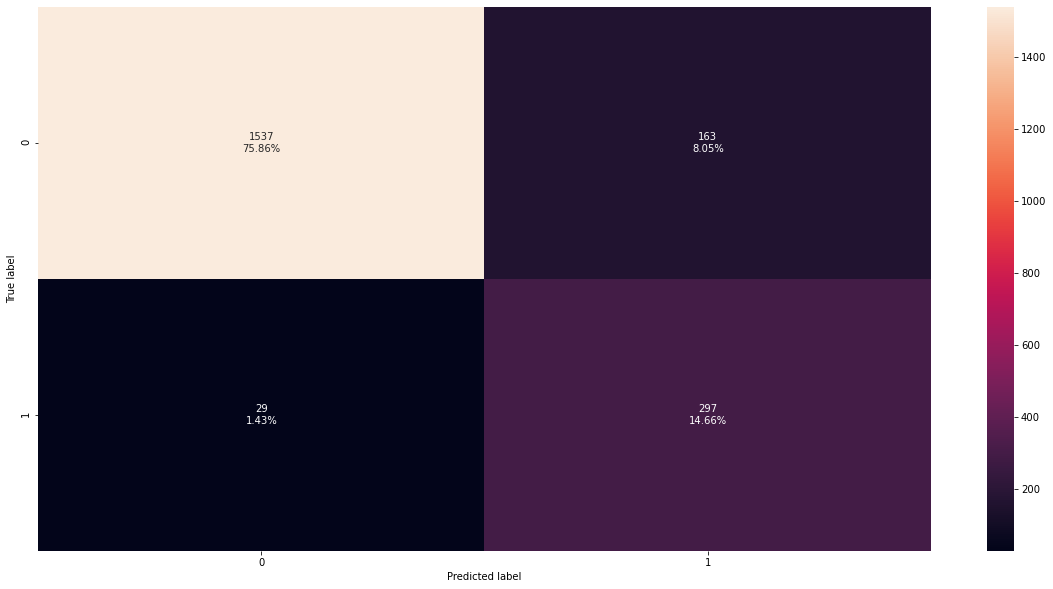

In [1481]:
# Run Model results through Confusion Matrix


Make_Confusion_Matrix(XGBoost_Tuned_Under, X_val, y_val)

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer closed their Credit Card account
- **Model predicted:** Customer will close their Credit Card account
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**14.66%**)

#### True Negatives:
- **Reality:** Customer did not close their Credit Card account
- **Model predicted:** Customer won't close their Credit Card account
- **Outcome:** No additional lost revenue, existing customers still remain active (**75.86%**)

#### False Positives:
- **Reality:** Customer did not close their Credit Card account
- **Model predicted:** Customer will close their Credit Card account
- **Outcome:** The bank allocated resources to these customers who ended up not being at risk of attrition - a slight waste of resource use, however the bank prefers this to lost revenue from missed customers who truly leave (**8.05%**)

#### False Negatives:
- **Reality:** Customer closed their Credit Card account
- **Model predicted:** Customer won't close their Credit Card account
- **Outcome:** The bank loses revenue by not catering to these at-risk customers in time so as to prevent further attrition (**1.43%**)

### Observations

- The (OverSampled) Tuned XG Boost scored very well in **Accuracy (0.91 & 0.91) and Recall (0.91 & 0.81)** for both the Training and Validation dataset, showing that it is **relatively well Generalized**
    - This is a substantial improvement on the Training Data Recall score of 0.776
- Regarding the **Confusion Matrix** results, the model scored well on **True Positives (14.7%)** and a lot lower on **True Negatives (75.9%)** and substantially lower on **False Negatives (1.4%)**, which the company wishes to be as close to 0 as possible in order to avoid missing any at-risk customers regarding Attrition

## Summary: 3 Best Models & All Logistic Regression Models 

### Training Performance

In [1468]:
# Create a DataFrame to summarize Training Data Results for all Models in 3 sets

Models_DF_Training1 = pd.concat(
    [
        # List Logistic Regression Models
        round(Log_Reg_Orig_Train,3).T, 
        round(Log_Reg_Over_Train,3).T,
        round(Log_Reg_Under_Train,3).T
        
    ],
    axis=1,
)

Models_DF_Training1.columns = [
    'Logistic Regression',
    'Logistic Regression with OverSampling',
    'Logistic Regression with UnderSampling',
    ]

    
    
    
Models_DF_Training2 = pd.concat(
    [

        # List Top 3 Models Selected Above - Both Original and Tuned
        round(Grad_Boost_Train,3).T,
        round(AdaBoost_Train,3).T,
        round(XGBoost_Train,3).T,
        round(Grad_Boost_RandSearch_Train,3).T,
        round(Ada_Boost_RandSearch_Train,3).T,
        round(XG_Boost_RandSearch_Train,3).T
        
     ],
    axis=1,
)


Models_DF_Training2.columns = [
    'Untuned Gradient Boost Classifier',
    'Untuned Adaptive Boost Classifier',
    'Untuned XG Boost Classifier',    
    'Gradient Boost Tuned with Random Search',
    'Adaptive Boost Tuned with Random Search',
    'XG Boost Tuned with Random Search'
    ]


Models_DF_Training3 = pd.concat(
    [   
        # List Top 3 Models Selected Above - For OverSampling & UnderSampling
        round(Grad_Boost_RandSearch_Train_Over,3).T,
        round(AdaBoost_RandSearch_Train_Over,3).T,        
        round(XG_Boost_RandSearch_Train_Over,3).T,
        round(Grad_Boost_RandSearch_Train_Under,3).T,
        round(AdaBoost_RandSearch_Train_Under,3).T,        
        round(XG_Boost_RandSearch_Train_Under,3).T        
        
    ],
    axis=1,
)

Models_DF_Training3.columns = [
    'Gradient Boost Tuned - OverSampled',
    'Adaptive Boost Tuned - OverSampled',
    'XG Boost Tuned - OverSampled',    
    'Gradient Boost Tuned - UnderSampled',
    'Adaptive Boost Tuned - UnderSampled',
    'XG Boost Tuned - UnderSampled'
    ]

In [1469]:
print('Training Performance Results - Logistic Regression:')
Models_DF_Training1

Training Performance Results - Logistic Regression:


Logistic Regression  Logistic Regression with OverSampling  \
Accuracy                 0.887                                  0.830   
Recall                   0.468                                  0.832   
Precision                0.734                                  0.829   
F1                       0.572                                  0.830   

           Logistic Regression with UnderSampling  
Accuracy                                    0.815  
Recall                                      0.812  
Precision                                   0.816  
F1                                          0.814

In [1470]:
print('Training Performance Results - Top 3 Original & Tuned:')
Models_DF_Training2

Training Performance Results - Top 3 Original & Tuned:


Untuned Gradient Boost Classifier  \
Accuracy                               0.949   
Recall                                 0.777   
Precision                              0.895   
F1                                     0.832   

           Untuned Adaptive Boost Classifier  Untuned XG Boost Classifier  \
Accuracy                               0.939                        1.000   
Recall                                 0.766                        0.999   
Precision                              0.838                        0.999   
F1                                     0.800                        0.999   

           Gradient Boost Tuned with Random Search  \
Accuracy                                     0.962   
Recall                                       0.832   
Precision                                    0.927   
F1                                           0.877   

           Adaptive Boost Tuned with Random Search  \
Accuracy                                     0.939   
Recall                                       0.766   
Precision                                    0.838   
F1                                           0.800   

           XG Boost Tuned with Random Search  
Accuracy                               0.954  
Recall                                 0.990  
Precision                              0.782  
F1                                     0.874

In [1471]:
print('Training Performance Results - Top 3 OverSampled & UnderSampled:')
Models_DF_Training3

Training Performance Results - Top 3 OverSampled & UnderSampled:


Gradient Boost Tuned - OverSampled  \
Accuracy                                0.972   
Recall                                  0.969   
Precision                               0.975   
F1                                      0.972   

           Adaptive Boost Tuned - OverSampled  XG Boost Tuned - OverSampled  \
Accuracy                                0.946                         0.947   
Recall                                  0.950                         0.972   
Precision                               0.942                         0.926   
F1                                      0.946                         0.949   

           Gradient Boost Tuned - UnderSampled  \
Accuracy                                 0.971   
Recall                                   0.969   
Precision                                0.972   
F1                                       0.971   

           Adaptive Boost Tuned - UnderSampled  XG Boost Tuned - UnderSampled  
Accuracy                                 0.920                          0.907  
Recall                                   0.929                          0.908  
Precision                                0.912                          0.906  
F1                                       0.920                          0.907

In [1464]:
# Create a DataFrame to summarize Validation Data Results for all Models in 3 sets

Models_DF_Validation1 = pd.concat(
    [
        # List Logistic Regression Models
        round(Log_Reg_Orig_Val,3).T, 
        round(Log_Reg_Over_Val,3).T,
        round(Log_Reg_Under_Val,3).T
        
    ],
    axis=1,
)

Models_DF_Validation1.columns = [
    'Logistic Regression',
    'Logistic Regression with OverSampling',
    'Logistic Regression with UnderSampling',
    ]

    
    
    
Models_DF_Validation2 = pd.concat(
    [

        # List Top 3 Models Selected Above - Both Original and Tuned
        round(Grad_Boost_Val,3).T,
        round(AdaBoost_Val,3).T,
        round(XGBoost_Val,3).T,
        round(Grad_Boost_RandSearch_Val,3).T,
        round(Ada_Boost_RandSearch_Val,3).T,
        round(XG_Boost_RandSearch_Val,3).T
        
     ],
    axis=1,
)


Models_DF_Validation2.columns = [
    'Untuned Gradient Boost Classifier',
    'Untuned Adaptive Boost Classifier',
    'Untuned XG Boost Classifier',    
    'Gradient Boost Tuned with Random Search',
    'Adaptive Boost Tuned with Random Search',
    'XG Boost Tuned with Random Search'
    ]


Models_DF_Validation3 = pd.concat(
    [   
        # List Top 3 Models Selected Above - For OverSampling & UnderSampling
        round(Grad_Boost_RandSearch_Val_Over,3).T,
        round(AdaBoost_RandSearch_Val_Over,3).T,        
        round(XG_Boost_RandSearch_Val_Over,3).T,
        round(Grad_Boost_RandSearch_Val_Under,3).T,
        round(AdaBoost_RandSearch_Val_Under,3).T,        
        round(XG_Boost_RandSearch_Val_Under,3).T        
        
    ],
    axis=1,
)

Models_DF_Validation3.columns = [
    'Gradient Boost Tuned - OverSampled',
    'Adaptive Boost Tuned - OverSampled',
    'XG Boost Tuned - OverSampled',    
    'Gradient Boost Tuned - UnderSampled',
    'Adaptive Boost Tuned - UnderSampled',
    'XG Boost Tuned - UnderSampled'
    ]

In [1465]:
print('Validation Performance Results - Logistic Regression:')
Models_DF_Validation1

Validation Performance Results - Logistic Regression:


Logistic Regression  Logistic Regression with OverSampling  \
Accuracy                 0.894                                  0.822   
Recall                   0.534                                  0.810   
Precision                0.737                                  0.470   
F1                       0.619                                  0.595   

           Logistic Regression with UnderSampling  
Accuracy                                    0.813  
Recall                                      0.822  
Precision                                   0.455  
F1                                          0.586

In [1466]:
print('Validation Performance Results - Top 3 Original & Tuned:')
Models_DF_Validation2

Validation Performance Results - Top 3 Original & Tuned:


Untuned Gradient Boost Classifier  \
Accuracy                               0.947   
Recall                                 0.776   
Precision                              0.878   
F1                                     0.824   

           Untuned Adaptive Boost Classifier  Untuned XG Boost Classifier  \
Accuracy                               0.937                        0.944   
Recall                                 0.776                        0.776   
Precision                              0.824                        0.863   
F1                                     0.799                        0.817   

           Gradient Boost Tuned with Random Search  \
Accuracy                                     0.948   
Recall                                       0.791   
Precision                                    0.872   
F1                                           0.830   

           Adaptive Boost Tuned with Random Search  \
Accuracy                                     0.948   
Recall                                       0.791   
Precision                                    0.872   
F1                                           0.830   

           XG Boost Tuned with Random Search  
Accuracy                               0.928  
Recall                                 0.902  
Precision                              0.722  
F1                                     0.802

In [1467]:
print('Validation Performance Results - Top 3 OverSampled & UnderSampled:')
Models_DF_Validation3

Validation Performance Results - Top 3 OverSampled & UnderSampled:


Gradient Boost Tuned - OverSampled  \
Accuracy                                0.942   
Recall                                  0.831   
Precision                               0.814   
F1                                      0.822   

           Adaptive Boost Tuned - OverSampled  XG Boost Tuned - OverSampled  \
Accuracy                                0.922                         0.920   
Recall                                  0.810                         0.871   
Precision                               0.733                         0.701   
F1                                      0.770                         0.777   

           Gradient Boost Tuned - UnderSampled  \
Accuracy                                 0.917   
Recall                                   0.908   
Precision                                0.680   
F1                                       0.778   

           Adaptive Boost Tuned - UnderSampled  XG Boost Tuned - UnderSampled  
Accuracy                                 0.891                          0.905  
Recall                                   0.920                          0.911  
Precision                                0.606                          0.646  
F1                                       0.731                          0.756

- The **XG Boost Model, tuned with Random Search**, is giving the best Training and Validation Recall (0.96/0.95 respectively), but at the cost of lower (but Generalized) Accuracy and Precision scores (0.78/0.77 and 0.42/0.41 respectively)
    - The Recall scores are the main priority for the Bank, however, so this may not be an issue regarding Accuracy/Precision
- It is worth examining this model's **Performance on Testing Data** and then identify the **Top Variables in Level of Feature Importance**



### Performance on Test Set: XG Boost (Tuned)

In [1493]:
# Calculating Different Scores on Test set

XG_Boost_RandSearch_Test = Model_Perf_Class_Score(XGBoost_Tuned, X_test, y_test)

print("Test Performance:")
XG_Boost_RandSearch_Test

Test Performance:


Accuracy    Recall  Precision        F1
0  0.936821  0.950769   0.733967  0.828418

- The Model's **results are well Generalized across all tests**, and scored very high in **Recall (0.95)**

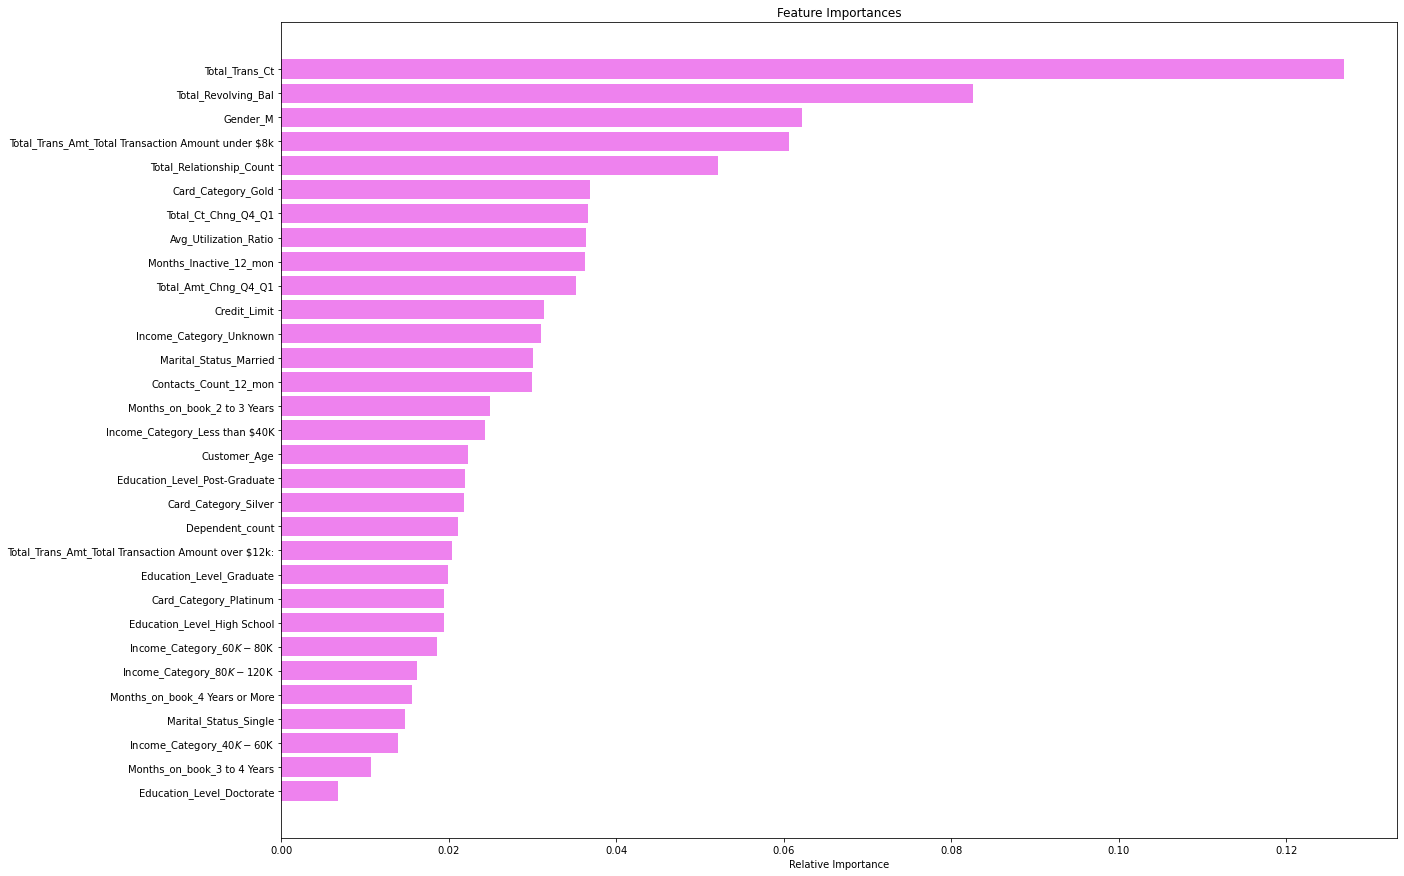

In [1494]:
# Create a visual summary (bar chart) of the above list, in descending order

Features = X_train.columns # List all independent variable columns in the Training set

Importances = XGBoost_Tuned.feature_importances_ # List all Feature Importances of XG Boost (Tuned) model
Indices = np.argsort(Importances) # Argsort function sorts all variables in list by ascending order and identifies index position

plt.figure(figsize=(20,15)) # Set graph size
plt.title('Feature Importances')

# Horizontal bar chart including all Indices shown above, with width equal to the Importance values calculated above 
plt.barh(range(len(Indices)), Importances[Indices], color='violet', align='center') 
plt.yticks(range(len(Indices)), [Features[i] for i in Indices])
plt.xlabel('Relative Importance')
plt.show()

- **Total Transaction Count** is by far the most important indicator in determining likelihood of Customer Attrition regarding their Credit Cards
    - This is indicative of customer activity - **the higher the transaction counts, the more often Customers are continuing to use their Credit Cards**
- This is followed by **Total Revolving Balance which shows that customers with higher balances are more committed to the bank** and to paying back the debts owed, while likely also spending more on their Credit Cards
- There are a **few remaining variables, of similar importance**, adding further effect on the outcome, namely:
    - Gender (Male)
    - Total Transaction Amount Under \\$8k (Newly created Grouping for bulk of Customers)
    - Total Relationships (Products) with the Bank - the higher the amount the more likely to close out their Credit Cards
    - Card Category - Gold
    - Total Count Change (Ratio) of Q4 vs. Q1 spending
        - Spending over 1x times indicates higher spending in Q4 (a quarter that has Many Holidays/Seasonality) and a good indicator of Healthy/Continued Credit spending on Consumerism
    - Average Utilization Ratio
    - Months Inactive (1 Year)
    - Credit Limit

## Create Pipeline for Model (Production)

In [924]:
# List Names of all Numerical Variables
Numerical_Features = [
                    'Customer_Age',
                    'Dependent_count',
                    'Total_Relationship_Count',
                    'Months_Inactive_12_mon',    
                    'Contacts_Count_12_mon',     
                    'Credit_Limit',
                    'Total_Revolving_Bal',
                    'Total_Amt_Chng_Q4_Q1',      
                    'Total_Trans_Ct',            
                    'Total_Ct_Chng_Q4_Q1',       
                    'Avg_Utilization_Ratio'    
                    ]

# Create a Transformer for Numeric Variables Listed to apply Simply Imputer (Median) on all Numeric Variables

Numeric_Transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# List Names of all Categorical Variables
Categorical_Features = [
                    'Gender',
                    'Education_Level',
                    'Marital_Status',
                    'Income_Category',
                    'Card_Category',
                    'Months_on_book',
                    'Total_Trans_Amt'
                     ]

# Create a Transformer for Categorical Variables Listed to apply Simply Imputer (Mode) on all Categorical Variables
# The Transformer will then One Hot Encode the Variables selected so that everything is Numerica

Categorical_Transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")), # "ignore" will pass through any Unknown Category in Test data
    ]
)


# The Numeric and Categorical Transformers above can then be conbimed into one using the Column Transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", Numeric_Transformer, Numerical_Features),
        ("cat", Categorical_Transformer, Categorical_Features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes

In [925]:
# Separating Target and Independent Variables

X = ccdata1.drop(columns='Attrition_Flag')
y = ccdata1['Attrition_Flag']

Since the Best Model has already been chosen and all testing already been performed in separate Training/Validation buckets, we **no longer need to divide data into 3 parts and can go directly with a Train/Test split**.

In [926]:
# Split the data into Train and Test sets with 30% Test Split and keeping Random State to 1, with Statified proportions to y

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)
print(X_train_final.shape, X_test_final.shape)

(7088, 18) (3039, 18)


In [927]:
# Creating new pipeline with Best Parameters calculated above

Fin_Model = Pipeline(
    steps=[
        ("pre", preprocessor), # Preprocess the model with Best Parameters calculated
        (
            "XGB",
            XGBClassifier(
            random_state=1,
            n_estimators=125,
            scale_pos_weight=2,
            gamma=10,
            subsample=1,
            learning_rate=0.5,
            eval_metric="logloss",
            max_depth=2,
            reg_lambda=10,
            ),
        ),
    ]
)
# Fit the model on training data
Fin_Model.fit(X_train_final, y_train_final)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Ct',
                       

The best model, based on Validation and Test results, is the **XG Boost (Tuned) model**.  It has now been **run through the Pipeline** and fitted to the Training data - **ready for Production as new data becomes available**.

## Insights
- The lower one's Credit Limit, etc., the higher the Credit Utilization Ratio could reach each month, in general
- Both the Total Amount and Counts ratios transactions between Q4 and Q1 indicate a strong chance of Customers with Higher Q4 spending (between 1 and 3 times Q1 levels) maintaining their Credit Cards due to **higher seasonal spending**
- Similarly, customers with **Total Transaction Counts greater than around 95 a Year are far more likely to stay active** with their Credit Card service
- Customers with 2 or more dependents have a greater chance of attrition vs. customers with 1 or fewer dependents
- Those customers with **higher months of inactive usage over a 1 year period (2 or more months) have a much higher chance of cancelling their Credit Card** services with the bank
- Customers with higher contacts within a 1 year period are more likely to close their Credit Card with the bank
- The **higher the Revolving Credit Balance, the more likely the customer will maintain their Credit Card service** with the bank
- Customers with **higher Credit Limits are more likely to stay active**
- **The higher the average Credit Utilization Ratio (greater than 20%)**, the more likely customers are to keep their Credit Cards


## Recommendations

In order to target customers most at risk of attrition, the bank should focus on targeting the following individuals:

- Customers who have been **Inactive** for the last couple months or more
- Customers with little to no **Revolving Balance** and a large (in relation to Credit Limit) **Average Open to Buy** balance that is largely unused
- Customers with lower **Transaction Counts under 50 a year and lower Average Utilization Ratios under 25%** since they are choosing to not utilize their current credit offerings for some reason or another
- Customers with **multiple Relationships (Products)** with the bank as those with more Credit options available could easily switch or close their Credit Cards for another option or competitor
- **Customers Spending under \\$8k a Year on Average** as they show less likelihood of continuing to use their Credit Cards and remain committed to the bank than those customers spending higher amounts in excess of \\$12k
- Customers with **lower Q4 vs. Q1 Spending Ratios** as this indicates that during the holiday season (Q4) when spending increases on average, these customers are choosing other Credit options than what we’ve provided them
